In [1]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.raw.nodes as raw
import data_bbog_integration_fabrica_personas.pipelines.primary.nodes as primary
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.model_input.nodes as mi
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms
import data_bbog_integration_fabrica_personas.pipelines.model_output.nodes as mo
import pandas as pd
import polars as pl
import numpy as np
import logging
import matplotlib.pyplot as plt

In [2]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [3]:
%load_ext kedro.ipython

[03/18/25 17:47:34] INFO     Resolved project path as:                                              ]8;id=104864;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=339125;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/18/25 17:47:35] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=370649;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=495770;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=149935;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=424723;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=135822;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=544197;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=818370;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=82538;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [4]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=807382;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=156612;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

## empezamos model_select:

info_save.keys()

import pickle
import boto3
from io import BytesIO

# Configuración de S3
s3_client = boto3.client('s3')
bucket_name = 'data-bbog-dev-sandbox-entity'
#file_key = 'casos-uso/fabrica-personas/06-models/tdc/masivo/best_model_grid_search_MLP.pickle'
file_key = 'casos-uso/fabrica-personas/AH/07-model_selection/info_save_all_1_1709.pickle'
# Descargar el archivo pickle desde S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)
pickle_file = BytesIO(response['Body'].read())

# Cargar el objeto pickle
f = pickle.load(pickle_file)

print('Objeto cargado con éxito')
f ##3 modelo actual en s3

info_save_all2 # modelo con el que voy a sustituir el anterior

# Guardar el objeto modificado en un BytesIO para subirlo a S3
with BytesIO() as updated_pickle_file:
    #pickle.dump(grid_search, updated_pickle_file)
    pickle.dump(info_save_all2, updated_pickle_file)

    updated_pickle_file.seek(0)  # Volver al inicio del archivo en memoria

    # Subir el archivo actualizado a S3
    s3_client.put_object(Bucket=bucket_name, Key=file_key, Body=updated_pickle_file.read())

print('Objeto actualizado y guardado en S3 con éxito')


In [5]:
info_save = catalog.load("info_save_all")

[03/18/25 17:47:38] INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=531436;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=486540;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [6]:
combine_models = params["Ensamble"]["want"]
combine_models

True

In [7]:
info_save[0].keys()

dict_keys(['Muestreo_tipo', 'X_balance', 'y_balance', 'X_train', 'y_train', 'X_test', 'y_test', 'Scaler', 'name_model', 'model_name', 'best_model', 'grid_search'])

In [8]:
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
from data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes import *

In [9]:
for i in info_save.keys():
    if isinstance(i, int):
        print(info_save[i]['name_model'])

Run1
Run2
Run3
Run4
Run5
Run6
Run7
Run8
Run9
Run10
Run11
Run12


In [25]:
params["Ensamble"]["want"] = True
combine_models = params["Ensamble"]["want"]
params["Ensamble"]['Algoritmos'] = ["Run1", "Run2"]#, "Run3", "Run4", "Run5", "Run6", "Run7", "Run8","Run9","Run10","Run11","Run12"]
params["Ensamble"]['weights'] = [2, 1]#, 2, 1, 1, 2, 1, 1, 0]
combine_models

True

In [26]:
params["Ensamble"]['weights']

[2, 1]

In [27]:
params['n_obs_filter']

0.3

In [28]:
params['n_obs_filter_select']

0.3

[03/18/25 18:47:48] INFO     Iniciando el Ensamblado de modelos...                                     ]8;id=561655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=627070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#632\632]8;;\

                    INFO     Preprocesamiento de datos equivalente en todos los modelos                ]8;id=279291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=937972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#601\601]8;;\

                    INFO     Finalizacion de estructura del ensamblado                                 ]8;id=377593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=712311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#604\604]8;;\

                    INFO     Incorporando el KS en el modelo de produccion                             ]8;id=749730;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=555560;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#112\112]8;;\

                    INFO     TOP N: 2449579.                                                           ]8;id=263974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=439798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#123\123]8;;\

                    INFO     Nodo : 0. Data: train                                                     ]8;id=14223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=989299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/18/25 18:47:52] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=338570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=619603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#878\878]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=855215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=601373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#916\916]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=332149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=469625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#940\940]8;;\
                             84, 83]                                                                               

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=109675;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=45699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=775198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=358674;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 1. Data: train                                                     ]8;id=905218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=577166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/18/25 18:47:58] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=622909;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=575098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#878\878]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=669205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=491223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#916\916]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89]                    ]8;id=150514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=213647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#940\940]8;;\

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=911603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=906113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=25720;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=543258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=958792;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=913240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#413\413]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=685766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=628259;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 2                                             ]8;id=534405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=831065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/18/25 18:48:02] INFO     Update probs: Selected: 0, Target Select: 2449579, Diff %: -1.0           ]8;id=30708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=192874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/18/25 18:48:04] INFO     Update probs: Selected: 85919, Target Select: 2449579, Diff %:            ]8;id=617008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=139205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9649249932335312                                                                   

[03/18/25 18:48:05] INFO     Update probs: Selected: 171940, Target Select: 2449579, Diff %:           ]8;id=767983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=543032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9298083466587523                                                                   

[03/18/25 18:48:06] INFO     Update probs: Selected: 258029, Target Select: 2449579, Diff %:           ]8;id=454602;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=888185;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.894663940211767                                                                    

[03/18/25 18:48:08] INFO     Update probs: Selected: 343696, Target Select: 2449579, Diff %:           ]8;id=183890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=299812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596918082658286                                                                   

[03/18/25 18:48:09] INFO     Update probs: Selected: 429687, Target Select: 2449579, Diff %:           ]8;id=39275;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=231534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245874086934939                                                                   

[03/18/25 18:48:11] INFO     Update probs: Selected: 515564, Target Select: 2449579, Diff %:           ]8;id=873480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=573102;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7895295477304467                                                                   

[03/18/25 18:48:12] INFO     Update probs: Selected: 601591, Target Select: 2449579, Diff %:           ]8;id=938193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=283873;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7544104517551792                                                                   

[03/18/25 18:48:14] INFO     Update probs: Selected: 687498, Target Select: 2449579, Diff %:           ]8;id=152934;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=509431;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7193403437896879                                                                   

[03/18/25 18:48:15] INFO     Update probs: Selected: 773544, Target Select: 2449579, Diff %:           ]8;id=655469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=337947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842134913795391                                                                   

[03/18/25 18:48:17] INFO     Update probs: Selected: 859585, Target Select: 2449579, Diff %:           ]8;id=238949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=836353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6490886801364643                                                                   

[03/18/25 18:48:18] INFO     Update probs: Selected: 945491, Target Select: 2449579, Diff %:           ]8;id=479603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=332889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140189804043878                                                                   

[03/18/25 18:48:20] INFO     Update probs: Selected: 1031399, Target Select: 2449579, Diff %:          ]8;id=117055;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=418850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789484642054818                                                                   

[03/18/25 18:48:21] INFO     Update probs: Selected: 1117249, Target Select: 2449579, Diff %:          ]8;id=485931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=425593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5439016255446344                                                                   

[03/18/25 18:48:23] INFO     Update probs: Selected: 1203223, Target Select: 2449579, Diff %:          ]8;id=250066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=342321;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5088041659403514                                                                   

[03/18/25 18:48:24] INFO     Update probs: Selected: 1289501, Target Select: 2449579, Diff %:          ]8;id=532175;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=181846;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4735826033779682                                                                   

[03/18/25 18:48:26] INFO     Update probs: Selected: 1375342, Target Select: 2449579, Diff %:          ]8;id=378311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=770036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.438539438817854                                                                    

[03/18/25 18:48:27] INFO     Update probs: Selected: 1461345, Target Select: 2449579, Diff %:          ]8;id=931824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4034301404445417                                                                   

[03/18/25 18:48:29] INFO     Update probs: Selected: 1547066, Target Select: 2449579, Diff %:          ]8;id=336478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=473085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.36843596389420386                                                                  

[03/18/25 18:48:30] INFO     Update probs: Selected: 1632304, Target Select: 2449579, Diff %:          ]8;id=310897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=208397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3336389640832159                                                                   

[03/18/25 18:48:31] INFO     Update probs: Selected: 1718972, Target Select: 2449579, Diff %:          ]8;id=747419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=361462;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.29825819048905955                                                                  

[03/18/25 18:48:33] INFO     Update probs: Selected: 1804839, Target Select: 2449579, Diff %:          ]8;id=812239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=404969;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.26320441186016047                                                                  

[03/18/25 18:48:34] INFO     Update probs: Selected: 1890861, Target Select: 2449579, Diff %:          ]8;id=159007;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=934858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.2280873570519669                                                                   

[03/18/25 18:48:36] INFO     Update probs: Selected: 2062575, Target Select: 2449579, Diff %:          ]8;id=929739;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=534179;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.15798796446246477                                                                  

[03/18/25 18:48:37] INFO     Update probs: Selected: 2234689, Target Select: 2449579, Diff %:          ]8;id=198701;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=784540;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08772527850704141                                                                  

[03/18/25 18:48:39] INFO     Update probs: Selected: 2408081, Target Select: 2449579, Diff %:          ]8;id=439984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=285319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.016940870247499674                                                                 

[03/18/25 18:48:40] INFO     Update probs: Selected: 2449579, Target Select: 2449579, Diff %: 0.0      ]8;id=610779;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=906271;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=345926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=203959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=708677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=735836;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=373497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=114135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/18/25 18:48:45] INFO     Update probs: Selected: 0, Target Select: 2449579, Diff %: -1.0           ]8;id=34446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=295269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/18/25 18:48:47] INFO     Update probs: Selected: 86869, Target Select: 2449579, Diff %:            ]8;id=820779;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=91241;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9645371714894682                                                                   

[03/18/25 18:48:48] INFO     Update probs: Selected: 171571, Target Select: 2449579, Diff %:           ]8;id=569972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=828711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9299589847888148                                                                   

[03/18/25 18:48:50] INFO     Update probs: Selected: 257624, Target Select: 2449579, Diff %:           ]8;id=858242;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=165125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8948292747447623                                                                   

[03/18/25 18:48:51] INFO     Update probs: Selected: 343866, Target Select: 2449579, Diff %:           ]8;id=833653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=234267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.859622408585312                                                                    

[03/18/25 18:48:52] INFO     Update probs: Selected: 429805, Target Select: 2449579, Diff %:           ]8;id=662366;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=120875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245392371505471                                                                   

[03/18/25 18:48:54] INFO     Update probs: Selected: 515558, Target Select: 2449579, Diff %:           ]8;id=206601;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=444541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7895319971309356                                                                   

[03/18/25 18:48:55] INFO     Update probs: Selected: 601606, Target Select: 2449579, Diff %:           ]8;id=513688;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=335433;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7544043282539571                                                                   

[03/18/25 18:48:57] INFO     Update probs: Selected: 687583, Target Select: 2449579, Diff %:           ]8;id=640386;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=970600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7193056439494296                                                                   

[03/18/25 18:48:58] INFO     Update probs: Selected: 773501, Target Select: 2449579, Diff %:           ]8;id=535482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=70829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842310454163756                                                                   

[03/18/25 18:49:00] INFO     Update probs: Selected: 945425, Target Select: 2449579, Diff %:           ]8;id=451423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=287758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140459238097649                                                                   

[03/18/25 18:49:01] INFO     Update probs: Selected: 1031236, Target Select: 2449579, Diff %:          ]8;id=424000;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=633839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5790150062520948                                                                   

[03/18/25 18:49:02] INFO     Update probs: Selected: 1031236, Target Select: 2449579, Diff %:          ]8;id=550971;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=703462;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5790150062520948                                                                   

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=28377;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=335793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#449\449]8;;\

[03/18/25 18:49:04] INFO     Ok Sistema de votaciones                                                  ]8;id=505852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=919746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#468\468]8;;\

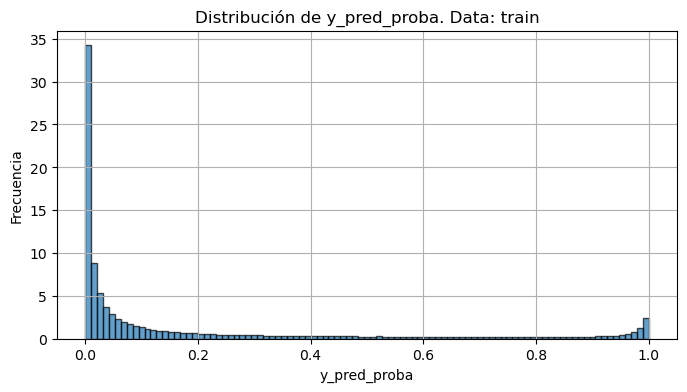

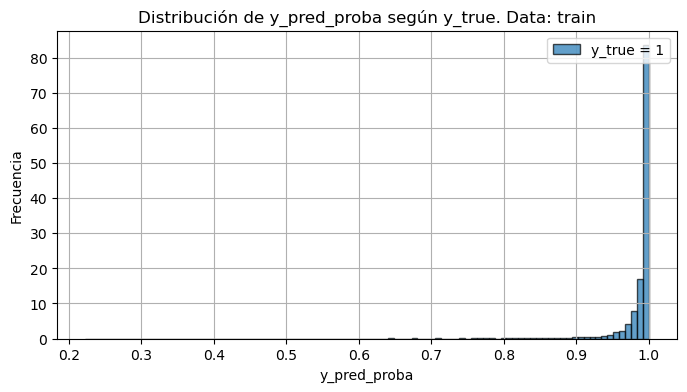

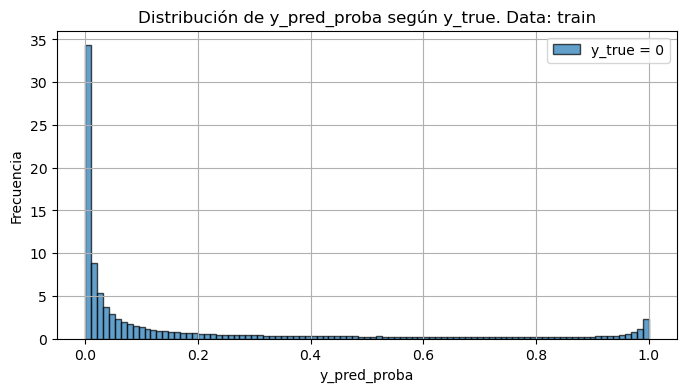

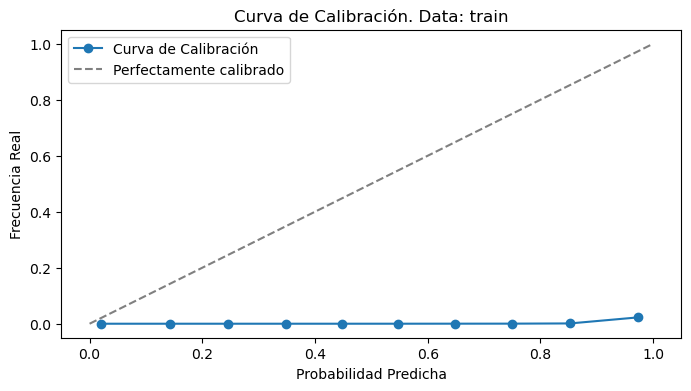

[03/18/25 18:49:09] INFO     TOP N: 612394.                                                            ]8;id=442344;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=773158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#123\123]8;;\

                    INFO     Nodo : 0. Data: test                                                      ]8;id=289810;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=46027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/18/25 18:49:11] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=256585;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=294572;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#878\878]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=250030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=324569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#916\916]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=519897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=220302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#940\940]8;;\
                             84]                                                                                   

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=732439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=329080;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=777225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=920315;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Nodo : 1. Data: test                                                      ]8;id=867125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=910576;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#130\130]8;;\

[03/18/25 18:49:12] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=349951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=106192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#878\878]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=346890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=314987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#916\916]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86]        ]8;id=276366;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=235371;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#940\940]8;;\

                    INFO     Iniciando el procesamiento del ks                                         ]8;id=687050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=182488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#169\169]8;;\

                    INFO     Finalizando el procesamiento del ks                                       ]8;id=888451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=557075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#177\177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=563534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=609904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#413\413]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=253007;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=224078;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 2                                             ]8;id=756354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=41363;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/18/25 18:49:13] INFO     Update probs: Selected: 0, Target Select: 612394, Diff %: -1.0            ]8;id=210960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=190932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

[03/18/25 18:49:14] INFO     Update probs: Selected: 21499, Target Select: 612394, Diff %:             ]8;id=549095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=677737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9648935162656721                                                                   

                    INFO     Update probs: Selected: 42998, Target Select: 612394, Diff %:             ]8;id=120588;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=812165;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9297870325313442                                                                   

                    INFO     Update probs: Selected: 64457, Target Select: 612394, Diff %:             ]8;id=530007;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=376033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.894745866223379                                                                    

                    INFO     Update probs: Selected: 85943, Target Select: 612394, Diff %:             ]8;id=267887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=187852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8596606106526191                                                                   

[03/18/25 18:49:15] INFO     Update probs: Selected: 107434, Target Select: 612394, Diff %:            ]8;id=297733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=74239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245671904035637                                                                   

                    INFO     Update probs: Selected: 128946, Target Select: 612394, Diff %:            ]8;id=837112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=619921;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894394785056679                                                                   

                    INFO     Update probs: Selected: 150401, Target Select: 612394, Diff %:            ]8;id=568252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=794168;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.754404843940339                                                                    

                    INFO     Update probs: Selected: 171899, Target Select: 612394, Diff %:            ]8;id=273454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=985003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7192999931416703                                                                   

[03/18/25 18:49:16] INFO     Update probs: Selected: 193380, Target Select: 612394, Diff %:            ]8;id=117132;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=768025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842229022492056                                                                   

                    INFO     Update probs: Selected: 214868, Target Select: 612394, Diff %:            ]8;id=979026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=693859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6491343808071275                                                                   

                    INFO     Update probs: Selected: 236368, Target Select: 612394, Diff %:            ]8;id=969511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=713928;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140262641371405                                                                   

                    INFO     Update probs: Selected: 257857, Target Select: 612394, Diff %:            ]8;id=83629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=377615;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789361097594032                                                                   

[03/18/25 18:49:17] INFO     Update probs: Selected: 279354, Target Select: 612394, Diff %:            ]8;id=175382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=327958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5438328918963935                                                                   

                    INFO     Update probs: Selected: 300808, Target Select: 612394, Diff %:            ]8;id=774536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=327145;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5087998902667237                                                                   

                    INFO     Update probs: Selected: 322301, Target Select: 612394, Diff %:            ]8;id=856253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=331491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4737032041463502                                                                   

                    INFO     Update probs: Selected: 343825, Target Select: 612394, Diff %:            ]8;id=843204;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=451213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4385558970205456                                                                   

[03/18/25 18:49:18] INFO     Update probs: Selected: 365281, Target Select: 612394, Diff %:            ]8;id=175807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=334170;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.40351962951955767                                                                  

                    INFO     Update probs: Selected: 386727, Target Select: 612394, Diff %:            ]8;id=82159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=691449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.3684996913751604                                                                   

                    INFO     Update probs: Selected: 429576, Target Select: 612394, Diff %:            ]8;id=623796;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=979434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.29853003131970596                                                                  

                    INFO     Update probs: Selected: 451020, Target Select: 612394, Diff %:            ]8;id=684550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=747347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.26351335904662687                                                                  

[03/18/25 18:49:19] INFO     Update probs: Selected: 472494, Target Select: 612394, Diff %:            ]8;id=149525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=661549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.22844769870377568                                                                  

                    INFO     Update probs: Selected: 494069, Target Select: 612394, Diff %:            ]8;id=514217;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=295372;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.19321711185935853                                                                  

                    INFO     Update probs: Selected: 515558, Target Select: 612394, Diff %:            ]8;id=920261;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=356700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.1581269574816213                                                                   

                    INFO     Update probs: Selected: 537025, Target Select: 612394, Diff %:            ]8;id=871238;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=848820;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.12307272768838362                                                                  

[03/18/25 18:49:20] INFO     Update probs: Selected: 558578, Target Select: 612394, Diff %:            ]8;id=616862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=170144;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.08787806542846599                                                                  

                    INFO     Update probs: Selected: 579896, Target Select: 612394, Diff %:            ]8;id=407186;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=734924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.053067143048429605                                                                 

                    INFO     Update probs: Selected: 601570, Target Select: 612394, Diff %:            ]8;id=12102;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=892907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.0176748955737646                                                                   

                    INFO     Update probs: Selected: 612394, Target Select: 612394, Diff %: 0.0        ]8;id=546570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=560152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=963259;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=632088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=815097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=906491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#431\431]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=28777;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=681501;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#432\432]8;;\

[03/18/25 18:49:22] INFO     Update probs: Selected: 0, Target Select: 612394, Diff %: -1.0            ]8;id=846360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=731158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Update probs: Selected: 21605, Target Select: 612394, Diff %:             ]8;id=324394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=538575;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9647204250858108                                                                   

                    INFO     Update probs: Selected: 43170, Target Select: 612394, Diff %:             ]8;id=289395;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=281508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.9295061675979843                                                                   

[03/18/25 18:49:23] INFO     Update probs: Selected: 64475, Target Select: 612394, Diff %:             ]8;id=585746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=853310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8947164733815158                                                                   

                    INFO     Update probs: Selected: 86000, Target Select: 612394, Diff %:             ]8;id=423052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=193654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8595675333200521                                                                   

                    INFO     Update probs: Selected: 107435, Target Select: 612394, Diff %:            ]8;id=634487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=303609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.8245655574679046                                                                   

                    INFO     Update probs: Selected: 128921, Target Select: 612394, Diff %:            ]8;id=60501;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=261347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7894803018971447                                                                   

[03/18/25 18:49:24] INFO     Update probs: Selected: 150413, Target Select: 612394, Diff %:            ]8;id=280918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=563630;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7543852487124302                                                                   

                    INFO     Update probs: Selected: 171895, Target Select: 612394, Diff %:            ]8;id=521259;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=351369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.7193065248843065                                                                   

                    INFO     Update probs: Selected: 193385, Target Select: 612394, Diff %:            ]8;id=601345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=497640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6842147375709102                                                                   

                    INFO     Update probs: Selected: 214867, Target Select: 612394, Diff %:            ]8;id=396166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=576840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6491360137427865                                                                   

[03/18/25 18:49:25] INFO     Update probs: Selected: 236369, Target Select: 612394, Diff %:            ]8;id=669577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=143951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.6140246312014814                                                                   

                    INFO     Update probs: Selected: 257850, Target Select: 612394, Diff %:            ]8;id=908635;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=887289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5789475403090167                                                                   

                    INFO     Update probs: Selected: 279348, Target Select: 612394, Diff %:            ]8;id=385465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=754610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.5438426895103479                                                                   

                    INFO     Update probs: Selected: 322264, Target Select: 612394, Diff %:            ]8;id=427313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=297303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4737636227657358                                                                   

[03/18/25 18:49:26] INFO     Update probs: Selected: 343779, Target Select: 612394, Diff %:            ]8;id=119035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=970605;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.4386310120608628                                                                   

                    INFO     Update probs: Selected: 365254, Target Select: 612394, Diff %:            ]8;id=369027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=736025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.40356371878235253                                                                  

                    INFO     Update probs: Selected: 386750, Target Select: 612394, Diff %:            ]8;id=38608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=370463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.36846213385500187                                                                  

                    INFO     Update probs: Selected: 408148, Target Select: 612394, Diff %:            ]8;id=459754;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=888754;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.33352057662223994                                                                  

[03/18/25 18:49:27] INFO     Update probs: Selected: 451185, Target Select: 612394, Diff %:            ]8;id=911298;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=86393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.26324392466288044                                                                  

                    INFO     Update probs: Selected: 472691, Target Select: 612394, Diff %:            ]8;id=642760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=959252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.22812601037893904                                                                  

                    INFO     Update probs: Selected: 494131, Target Select: 612394, Diff %:            ]8;id=955594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=26304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.19311586984849624                                                                  

                    INFO     Update probs: Selected: 537157, Target Select: 612394, Diff %:            ]8;id=413749;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=747353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.1228571801813865                                                                   

[03/18/25 18:49:28] INFO     Update probs: Selected: 580034, Target Select: 612394, Diff %:            ]8;id=286956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=895624;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.05284179792747806                                                                  

                    INFO     Update probs: Selected: 601584, Target Select: 612394, Diff %:            ]8;id=436771;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\
                             -0.017652034474537635                                                                 

                    INFO     Update probs: Selected: 612394, Target Select: 612394, Diff %: 0.0        ]8;id=641844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=23959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#341\341]8;;\

                    INFO     Finish                                                                    ]8;id=634282;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=541412;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#367\367]8;;\

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=83294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=430433;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#449\449]8;;\

                    INFO     Ok Sistema de votaciones                                                  ]8;id=710280;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=327410;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#468\468]8;;\

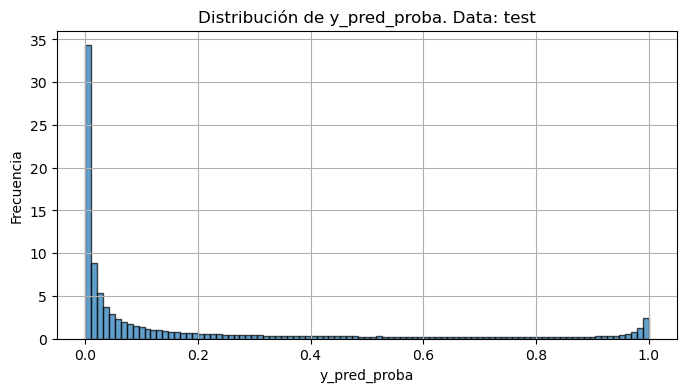

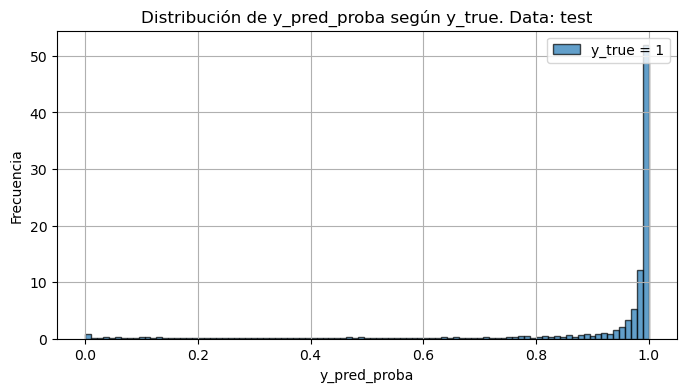

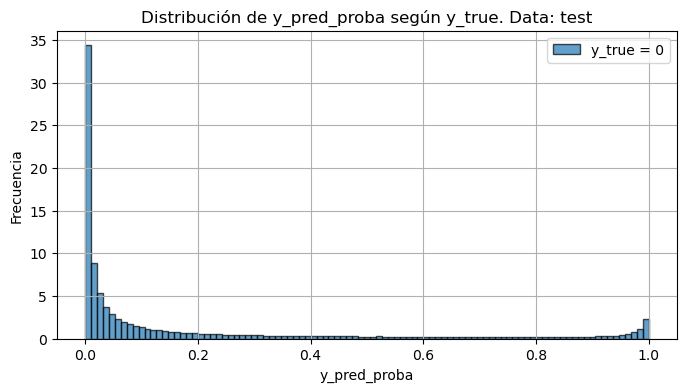

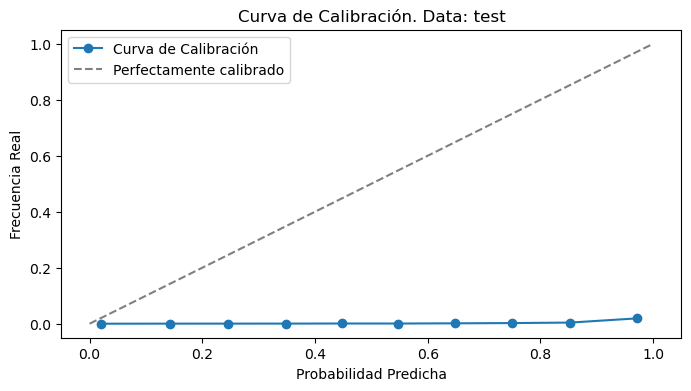

In [29]:
info_save_temp = ms.generate_modelo_produccion(info_save, params)

In [30]:
info_save_select = ms.calc_metrics_before_backtesting(info_save, info_save_temp, params)

[03/18/25 18:49:30] INFO     Iniciando el calculo de las metricas...                                   ]8;id=8776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=20795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#920\920]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=674268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=923069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#926\926]8;;\

                    INFO     Models: best_model_name                                                   ]8;id=960132;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=729362;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#949\949]8;;\

                    INFO     Estrategy: best_model_name                                                ]8;id=616504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=423216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#954\954]8;;\

                    INFO     TOP N: 2449579. DATASET: train                                            ]8;id=707786;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=756115;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    2.5s remaining:    0.9s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    3.2s finished


[03/18/25 18:49:38] INFO     TOP N: 612394. DATASET: test                                              ]8;id=808316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=973135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.7s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          0.9944       Run3  random_forest_2   
           true_sum n_top test            3060       Run3  random_forest_2   
           backtest       test          0.4997       Run3  random_forest_2   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[03/18/25 18:49:40] INFO     Models: best_unbiased_model                                               ]8;id=130870;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=917650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#949\949]8;;\

                    INFO     Estrategy: best_unbiased_model                                            ]8;id=270057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=442948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#954\954]8;;\

                    INFO     TOP N: 2449579. DATASET: train                                            ]8;id=545794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=830471;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    2.5s remaining:    0.9s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    3.1s finished


[03/18/25 18:49:47] INFO     TOP N: 612394. DATASET: test                                              ]8;id=790144;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=173631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  74 out of 100 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=64)]: Done 100 out of 100 | elapsed:    0.7s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          0.9944       Run3  random_forest_2   
           true_sum n_top test            3060       Run3  random_forest_2   
           backtest       test          0.4997       Run3  random_forest_2   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[03/18/25 18:49:49] INFO     Models: best_fitting_model                                                ]8;id=438685;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=788269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#949\949]8;;\

                    INFO     Estrategy: best_fitting_model                                             ]8;id=464402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=848113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#954\954]8;;\

                    INFO     TOP N: 2449579. DATASET: train                                            ]8;id=668580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=772558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[03/18/25 18:49:55] INFO     TOP N: 612394. DATASET: test                                              ]8;id=279314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=454656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          1.0012       Run1      MLP_0   
           true_sum n_top test            3081       Run1      MLP_0   
           backtest       test          0.5031       Run1      MLP_0   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[03/18/25 18:49:56] INFO     Estrategy: modelo_produccion                                              ]8;id=822153;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=175851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#954\954]8;;\

                    INFO     TOP N: 2449579. DATASET: train                                            ]8;id=806507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=493244;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

[03/18/25 18:50:00] INFO     TOP N: 612394. DATASET: test                                              ]8;id=817496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=924345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#966\966]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          1.0183     [0, 1]   Ensamble   
           true_sum n_top test            3134     [0, 1]   Ensamble   
           backtest       test          0.5118     [0, 1]   Ensamble   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

In [31]:
print(info_save_select["modelo_produccion"]["model_name"])
print(info_save_select["modelo_produccion"]["name_model"])
print(info_save_select["modelo_produccion"]["nodos_select"])
print(info_save_select["modelo_produccion"]["weights"])

Ensamble

[0, 1]
[2, 1]


In [37]:
info_save_select.keys()

dict_keys(['modelo_produccion', 0, 1, 'Votaciones', 'select_model2', 'all_results_select_model'])

In [38]:
info_save_select['modelo_produccion'].keys()

dict_keys(['type', 'best_model', 'model_name', 'name_model', 'name_model_combined', 'nodos_select', 'weights', 'Scaler'])

In [39]:
info_save_select['Votaciones'].keys()

dict_keys([])

In [35]:
try:
    display(info_save_select[info_save_select['modelo_produccion']['nodos_select'][1]]["ks_test"])
except:
    display(info_save_select['modelo_produccion']["ks_test"])

,prob_min,prob_max,tasa_aperturas
0,99.67,100.00,5.18
1,99.17,99.67,2.42
2,98.45,99.17,1.84
3,97.31,98.45,1.27
4,95.43,97.31,1.00
5,92.29,95.43,0.59
6,87.73,92.29,0.51
7,81.86,87.73,0.38
8,75.53,81.86,0.32
9,69.26,75.53,0.17


In [36]:
info_save_select.keys()

dict_keys(['modelo_produccion', 0, 1, 'Votaciones', 'select_model2', 'all_results_select_model'])

In [18]:
info_save_select['votaciones']

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 info_save_select['votaciones']                                                               │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'votaciones'

### Optimizar el sistema de votaciones

In [22]:
info_save_select['Votaciones'].keys()

dict_keys(['train', 'test'])

In [23]:
info_save_select['modelo_produccion']['weights']

[2, 1, 2, 1, 1, 2, 1, 1, 0]

In [25]:
info_save_select['select_model2'][info_save_select['select_model2']['select_model'] == 'modelo_produccion'].sort_index()

value  \
class_name metric_name     dataset_name            
0          Precision n_top test              0.0   
                           train             0.0   
           f1-score n_top  test              0.0   
                           train             0.0   
           recall n_top    test              0.0   
                           train             0.0   
           true_sum n_top  test            16659   
                           train           66271   
1          Precision n_top test          16.4879   
                           train         16.9484   
           f1-score n_top  test          28.3083   
                           train         28.9845   
           recall n_top    test            100.0   
                           train           100.0   
           true_sum n_top  test             3289   
                           train           13524   
           backtest        test          16.4879   
                           train         16.9484   

                                                            name_model  \
class_name metric_name     dataset_name                                  
0          Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
1          Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           backtest        test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   

                                        model_name       select_model  
class_name metric_name     dataset_name                                
0          Precision n_top test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
1          Precision n_top test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           backtest        test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion

In [73]:
info_save_select['select_model2'][info_save_select['select_model2']['select_model'] == 'modelo_produccion'].sort_index()

value  \
class_name metric_name     dataset_name            
0          Precision n_top test              0.0   
                           train             0.0   
           f1-score n_top  test              0.0   
                           train             0.0   
           recall n_top    test              0.0   
                           train             0.0   
           true_sum n_top  test            16690   
                           train           66632   
1          Precision n_top test          16.3325   
                           train          16.496   
           f1-score n_top  test          28.0789   
                           train         28.3203   
           recall n_top    test            100.0   
                           train           100.0   
           true_sum n_top  test             3258   
                           train           13163   
           backtest        test          16.3325   
                           train          16.496   

                                                            name_model  \
class_name metric_name     dataset_name                                  
0          Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
1          Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           backtest        test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   

                                        model_name       select_model  
class_name metric_name     dataset_name                                
0          Precision n_top test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
1          Precision n_top test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           backtest        test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion

In [74]:
info_save_select['select_model2'][info_save_select['select_model2']['select_model'] == 'best_model_name'].sort_index()

value name_model model_name  \
class_name metric_name     dataset_name                                  
0          Precision n_top test              0.0       Run1      MLP_0   
                           train             0.0       Run1      MLP_0   
           f1-score n_top  test              0.0       Run1      MLP_0   
                           train             0.0       Run1      MLP_0   
           recall n_top    test              0.0       Run1      MLP_0   
                           train             0.0       Run1      MLP_0   
           true_sum n_top  test            16649       Run1      MLP_0   
                           train           66414       Run1      MLP_0   
1          Precision n_top test           16.538       Run1      MLP_0   
                           train         16.7692       Run1      MLP_0   
           f1-score n_top  test          28.3822       Run1      MLP_0   
                           train          28.722       Run1      MLP_0   
           recall n_top    test            100.0       Run1      MLP_0   
                           train           100.0       Run1      MLP_0   
           true_sum n_top  test             3299       Run1      MLP_0   
                           train           13381       Run1      MLP_0   
           backtest        test           16.538       Run1      MLP_0   
                           train         16.7692       Run1      MLP_0   

                                            select_model  
class_name metric_name     dataset_name                   
0          Precision n_top test          best_model_name  
                           train         best_model_name  
           f1-score n_top  test          best_model_name  
                           train         best_model_name  
           recall n_top    test          best_model_name  
                           train         best_model_name  
           true_sum n_top  test          best_model_name  
                           train         best_model_name  
1          Precision n_top test          best_model_name  
                           train         best_model_name  
           f1-score n_top  test          best_model_name  
                           train         best_model_name  
           recall n_top    test          best_model_name  
                           train         best_model_name  
           true_sum n_top  test          best_model_name  
                           train         best_model_name  
           backtest        test          best_model_name  
                           train         best_model_name

In [ ]:
info_save_select = catalog.load("info_save_select")

[10/02/24 13:14:35] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=549195;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=5276;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [11]:
info_save_select['select_model2'][info_save_select['select_model2']['select_model'] == 'modelo_produccion']

value  \
class_name metric_name     dataset_name            
0          Precision n_top train             0.0   
           recall n_top    train             0.0   
           f1-score n_top  train             0.0   
           true_sum n_top  train           66302   
           Precision n_top test              0.0   
           recall n_top    test              0.0   
           f1-score n_top  test              0.0   
           true_sum n_top  test            16669   
1          Precision n_top test          16.4377   
           recall n_top    test            100.0   
           f1-score n_top  test          28.2344   
           true_sum n_top  test             3279   
           recall n_top    train           100.0   
           f1-score n_top  train         28.9276   
           true_sum n_top  train           13493   
           backtest        test          16.4377   
                           train         16.9096   
           Precision n_top train         16.9096   

                                                            name_model  \
class_name metric_name     dataset_name                                  
0          Precision n_top train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
1          Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           backtest        test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           Precision n_top train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   

                                        model_name       select_model  
class_name metric_name     dataset_name                                
0          Precision n_top train          Ensamble  modelo_produccion  
           recall n_top    train          Ensamble  modelo_produccion  
           f1-score n_top  train          Ensamble  modelo_produccion  
           true_sum n_top  train          Ensamble  modelo_produccion  
           Precision n_top test           Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
1          Precision n_top test           Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
           recall n_top    train          Ensamble  modelo_produccion  
           f1-score n_top  train          Ensamble  modelo_produccion  
           true_sum n_top  train          Ensamble  modelo_produccion  
           backtest        test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           Precision n_top train          Ensamble  modelo_produccion

In [27]:
train = info_save_select['Votaciones']['train']
train2 = train.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_train = ~train.index.isin(train2.index.tolist())
drops = train.index[index_train]
#train.index = list(range(train.shape[0]))
train.shape

(6307957, 10)

In [ ]:
test = info_save_select['Votaciones']['test']
test2 = test.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_test = ~test.index.isin(test2.index.tolist())
drops2 = test.index[index_test]
#test.index = list(range(test.shape[0]))
test.shape

In [23]:
import itertools
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

In [24]:
from scipy.sparse import csr_matrix

In [25]:
import gc
# Ejecutar la recolección de basura
gc.collect()

61107

In [29]:
best_probs = 0.01265
best_probs = 0.013
def calcular_metricas(itter,best_probs = best_probs):
    res = results[itter]
    total_count = res.shape[0]
    selected = res.nlargest(int(total_count * best_probs)).index
    return itter, y_true['y'][selected].sum()  # o la métrica que necesites

In [ ]:
# Obtener el número de núcleos disponibles
timing = time.time()
num_nucleos = cpu_count()-2 # Puedes ajustar este número según sea necesario
msj = ['Train Data','Test Data']
df_model_unic = pd.DataFrame()
nulls = [drops,drops2]
for t,df_select in enumerate([train,test]):
    y_true = df_select[['y']]
    dropping = nulls[t]
    df_select = df_select.drop('y', axis = 1).drop(dropping, axis = 0)

    if t == 0:
        n = df_select.shape[1]
        # Lista de elementos
        modelos = list(range(0,min(n,3),1)) # el algoritmo se ponderara son con 3 discriminaciones
        # Obtener todas las combinaciones de 2 elementos
        combinaciones = list(itertools.product(modelos, repeat = n))
        combinaciones = pd.DataFrame(combinaciones, columns = df_select.columns.tolist())
        weights = combinaciones.div(combinaciones.sum(axis=1), axis=0).dropna(how = 'all')
        modelos_unicos = []
        for i in range(n):
            filt = combinaciones[combinaciones[combinaciones.columns[i]] == 1]
            filt = filt.drop(combinaciones.columns[i], axis = 1)
            filt = filt.loc[(filt == 0).all(axis=1)]
            modelos_unicos.append(filt.index[0])
        weights_unicos = weights.loc[modelos_unicos]
        weights = weights.drop_duplicates()
    else:
        weights = weights.loc[best_iter_w.index.tolist()+modelos_unicos]
        #results_train = results.copy()
    logger.info(f"Numero de iteraciones: {weights.shape[0]}. {msj[t]}")
    #results = df_select @ weights.T # observaciones x iteraciones
    results = df_select.astype(np.float32).values @ weights.astype(np.float32).T.values
    results = pd.DataFrame(results, index = df_select.index, columns = weights.T.columns)
    nulos_temp =pd.DataFrame(np.zeros((dropping.shape[0],weights.shape[0])),index = dropping, columns = results.columns)
    results = pd.concat([results,nulos_temp], axis = 0)
    results = results.loc[y_true.index]
    # Usar Pool para paralelizar
    if __name__ == '__main__':
        with Pool(processes=num_nucleos) as pool:  # Especificar el número de núcleos
            resultados = pool.map(calcular_metricas, results.columns)
    
        # Convertir los resultados a un DataFrame
        epochs = pd.DataFrame(resultados, columns=['Iteracion', 'Valor'])
        epochs.set_index('Iteracion', inplace=True)

    maxi_true = epochs['Valor'].max()
    best_iter_w = epochs[epochs['Valor'] == maxi_true]
    trues = y_true['y'].sum()
    tot = int(y_true.shape[0]*best_probs)
    logger.info(f"TP: {maxi_true}. True: {trues}. Tasa de Exito: {np.round(maxi_true/tot*100,2)}%. Usando {best_probs} deciles para {msj[t]}")
    if best_iter_w.shape[0] == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}")
        break
    if t == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}")
minutess = (time.time() - timing) /60
hrs = math.floor(minutess / 60)
minutes = minutess - hrs * 60
logger.info(f"Hrs: {hrs}. Min {minutes}")

[10/02/24 13:37:34] INFO     Numero de iteraciones: 19171. Train Data                              ]8;id=143158;file:///tmp/ipykernel_17147/1256598365.py\1256598365.py]8;;\:]8;id=337859;file:///tmp/ipykernel_17147/1256598365.py#31\31]8;;\

In [ ]:
calcular_metricas(modelos_unicos[0],0.01265)

In [32]:
epochs.loc[modelos_unicos]

,Valor
Iteracion,
6561,86.0
2187,86.0
729,81.0
243,87.0
81,87.0
27,90.0
9,72.0
3,84.0
1,72.0


<Axes: ylabel='Iteracion'>

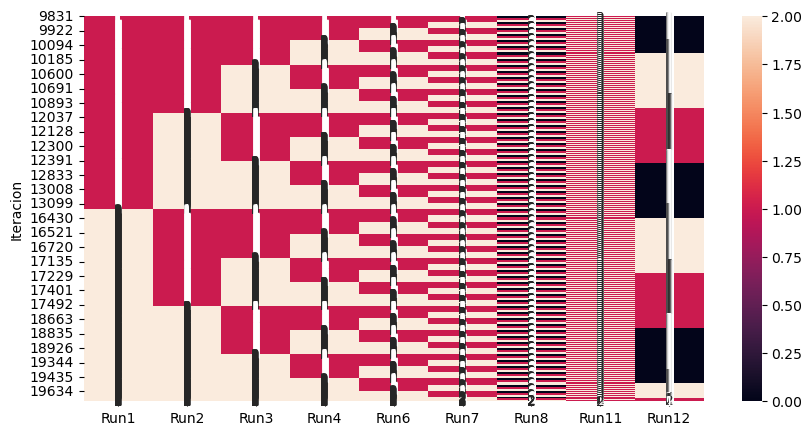

In [33]:
plt.figure(figsize = (10,5))
sns.heatmap(combinaciones.loc[best_iter_w.index],annot=True)

In [ ]:
best_deciles = 0.4
for itter in results.columns:
    res = results[itter]
    # Obtener el número total de elementos
    total_count = res.shape[0]
    # Seleccionar el 40% superior
    selected = res.nlargest(int(total_count * best_deciles)).index
    # Calcular el producto punto directamente
    epochs.loc[itter, 'Iteracion'] = y_true['y'][selected].sum()

In [18]:
epochs

,Iteracion
0,13138.0
1,13138.0
2,13138.0
3,13138.0
4,13138.0
...,...
11434,NaN
11435,NaN
11436,NaN
11437,NaN


In [11]:
info_save2.keys()

dict_keys(['modelo_produccion', 0, 1, 2, 3, 5, 6, 7, 10, 11])

In [12]:
info_save2[0].keys()

dict_keys(['Muestreo_tipo', 'X_train', 'y_train', 'Scaler', 'name_model', 'model_name', 'best_model', 'grid_search'])

In [13]:
info_save2["modelo_produccion"].keys()

dict_keys(['nodos_select', 'X_train', 'X_test', 'y_train', 'y_test', 'type'])

### SHAP VALUES

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

In [15]:
from sklearn.metrics import f1_score,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics._classification import _prf_divide,_nanaverage,multilabel_confusion_matrix
from sklearn.metrics._classification import _check_zero_division,_check_set_wise_labels

In [9]:
info_save2 = ms.generate_modelo_produccion(info_save,params);

[09/30/24 18:50:50] INFO     Modelo optimo segun la estrategia: ['best_model_name']                    ]8;id=263040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=486643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#368\368]8;;\

                    INFO     Llave del modelo: Run1,MLP_0                                              ]8;id=260357;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=729314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#377\377]8;;\

                    INFO     Modelo Identificado....                                                   ]8;id=235223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=109695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#380\380]8;;\

                    INFO     Nodo: 0. Llave Run1,MLP_0                                                 ]8;id=869828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774720;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#381\381]8;;\

                    INFO     Seleccionamos el modelo proveniente de models...                          ]8;id=458413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=164707;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#415\415]8;;\

[09/30/24 18:52:31] INFO     Iniciando el calculo de las metricas...                                   ]8;id=844166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=71826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#588\588]8;;\

                    INFO     Models: best_model_name                                                   ]8;id=455530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=62771;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#607\607]8;;\

                    INFO     Estrategy: best_model_name                                                ]8;id=822883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=772811;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#613\613]8;;\

[09/30/24 18:52:33] INFO     TOP N: 79795                                                              ]8;id=557359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=989673;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

[09/30/24 18:52:35] INFO     TOP N: 19948                                                              ]8;id=345991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=900262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                  
1          f1-score n_top test          28.3822       Run1      MLP_0   
           true_sum n_top test             3299       Run1      MLP_0   
           backtest       test           16.538       Run1      MLP_0   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

                    INFO     Models: best_unbiased_model                                               ]8;id=86649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=18405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#607\607]8;;\

                    INFO     Estrategy: best_unbiased_model                                            ]8;id=166872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=758043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#613\613]8;;\

[09/30/24 18:52:37] INFO     TOP N: 79795                                                              ]8;id=342726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=355597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

[09/30/24 18:52:39] INFO     TOP N: 19948                                                              ]8;id=344613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=2043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                  
1          f1-score n_top test          28.3822       Run1      MLP_0   
           true_sum n_top test             3299       Run1      MLP_0   
           backtest       test           16.538       Run1      MLP_0   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

                    INFO     Models: best_fitting_model                                                ]8;id=484628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=39675;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#607\607]8;;\

                    INFO     Estrategy: best_fitting_model                                             ]8;id=628694;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=11505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#613\613]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    3.1s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    7.9s
[Parallel(n_jobs=32)]: Done 450 out of 450 | elapsed:    9.0s finished


[09/30/24 18:52:48] INFO     TOP N: 79795                                                              ]8;id=594526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=64581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 450 out of 450 | elapsed:    2.0s finished


[09/30/24 18:52:51] INFO     TOP N: 19948                                                              ]8;id=949966;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=203716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

value name_model       model_name  \
class_name metric_name    dataset_name                                        
1          f1-score n_top test          26.7651       Run5  random_forest_4   
           true_sum n_top test             3082       Run5  random_forest_4   
           backtest       test          15.4502       Run5  random_forest_4   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[09/30/24 18:52:52] INFO     Estrategy: modelo_produccion                                              ]8;id=124061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=20156;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#613\613]8;;\

[09/30/24 18:52:54] INFO     TOP N: 79795                                                              ]8;id=763033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=239100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

[09/30/24 18:52:56] INFO     TOP N: 19948                                                              ]8;id=518550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=906341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                  
1          f1-score n_top test          28.3822       Run1      MLP_0   
           true_sum n_top test             3299       Run1      MLP_0   
           backtest       test           16.538       Run1      MLP_0   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

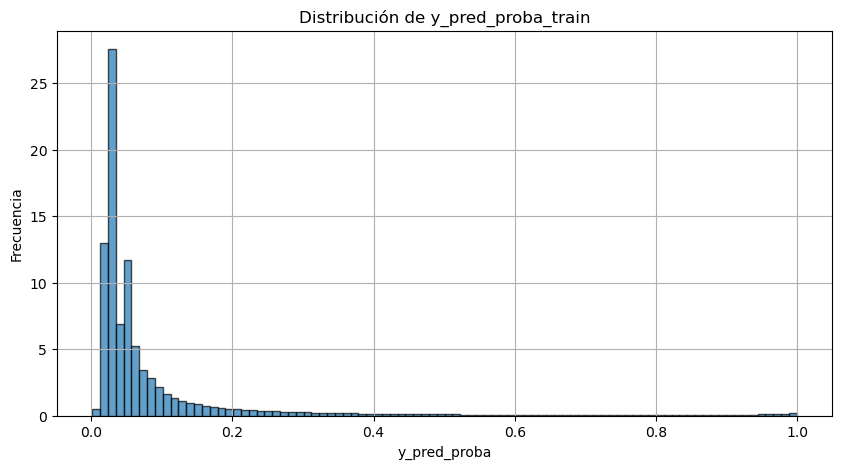

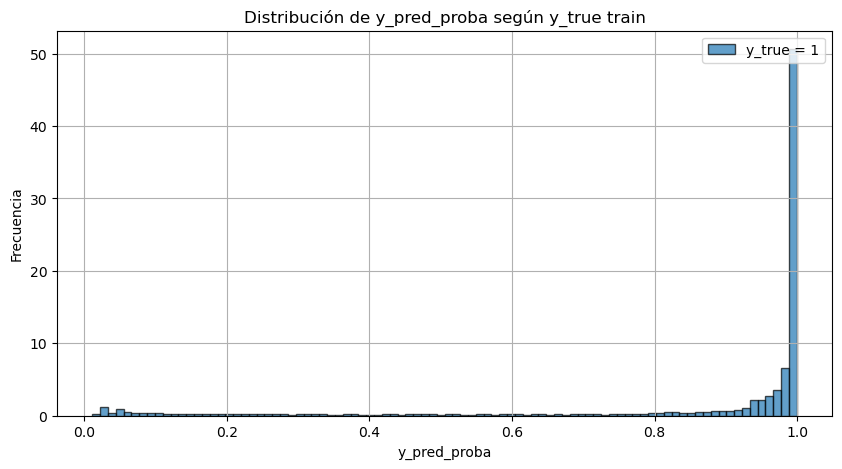

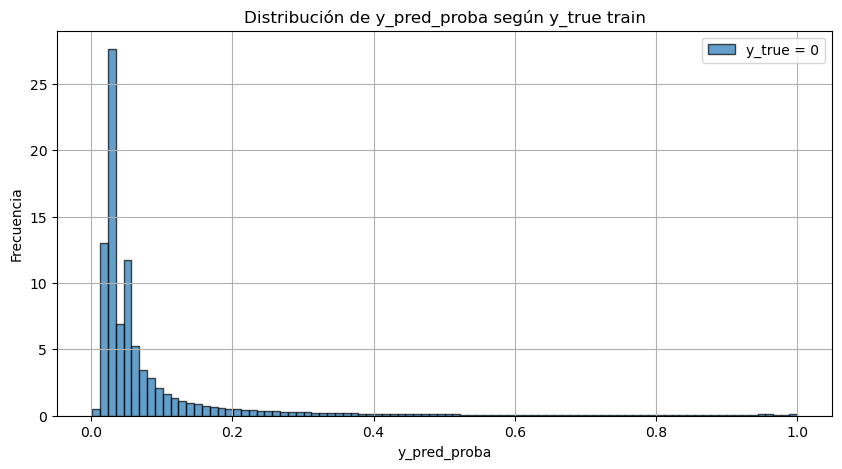

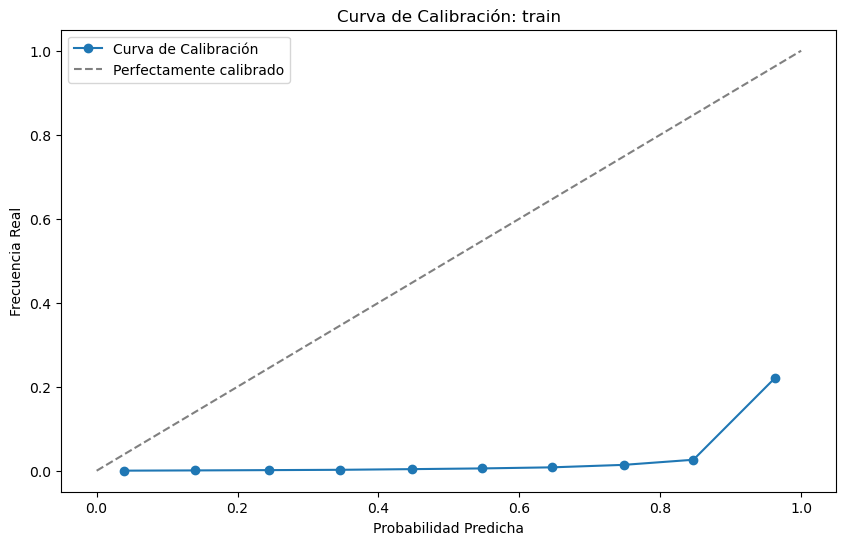

[09/30/24 18:53:04] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=835503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=21787;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#461\461]8;;\

                    INFO     Agrupando datos por decil de apertura para calcular estadísticas          ]8;id=907776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=375406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#465\465]8;;\
                             básicas...                                                                            

                    INFO     Calculando el total de aperturas reales por decil...                      ]8;id=542983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=561412;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#472\472]8;;\

                    INFO     Calculando el total de aperturas predichas por decil...                   ]8;id=636287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=334390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#477\477]8;;\

                    INFO     Fusionando las estadísticas de aperturas reales con las estadísticas      ]8;id=188821;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=934843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#480\480]8;;\
                             generales por decil...                                                                

                    INFO     Calculando la tasa de aperturas por decil...                              ]8;id=716103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=70977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#484\484]8;;\

                    INFO     Ordenando los datos por decil en orden descendente...                     ]8;id=613314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=796227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#487\487]8;;\

                    INFO     Calculando la distribución acumulada de aperturas observadas...           ]8;id=56109;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=1391;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#491\491]8;;\

                    INFO     Calculando la distribución acumulada de probabilidades esperadas...       ]8;id=949448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=312506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#495\495]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=561320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=63988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#499\499]8;;\

                    INFO     Restableciendo el índice del DataFrame...                                 ]8;id=745569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=27184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#502\502]8;;\

                    INFO     Calculando el total de aperturas reales por decil...                      ]8;id=428889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=847141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#505\505]8;;\

[09/30/24 18:53:05] INFO     Calculando el total de aperturas predichas por decil...                   ]8;id=730635;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=312261;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#510\510]8;;\

                    INFO     Fusionando las estadísticas de aperturas reales con las estadísticas      ]8;id=958668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=914065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#513\513]8;;\
                             generales por decil...                                                                

                    INFO     Reordenando las columnas del DataFrame...                                 ]8;id=930504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=824541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#520\520]8;;\

                    INFO     Deciles donde el ks aumenta:  [89, 88, 87]                                ]8;id=653888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=501269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#525\525]8;;\

'ks_train'

,prob_min,prob_max,tasa_aperturas
0,85.52,99.93,18.78


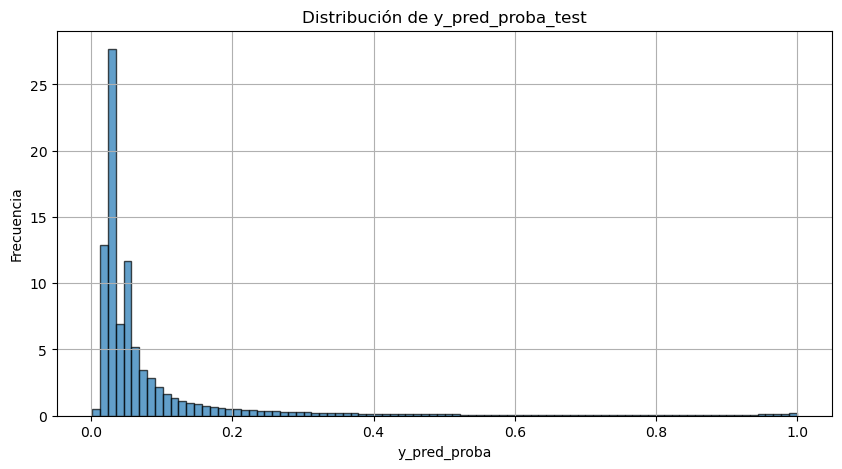

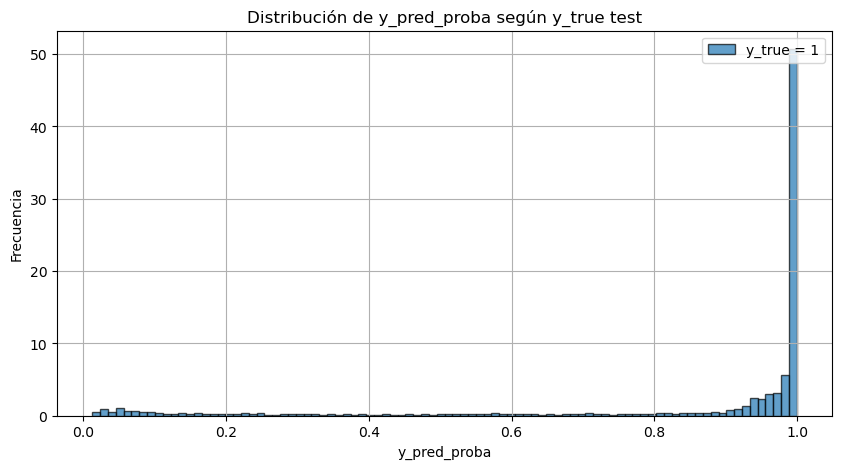

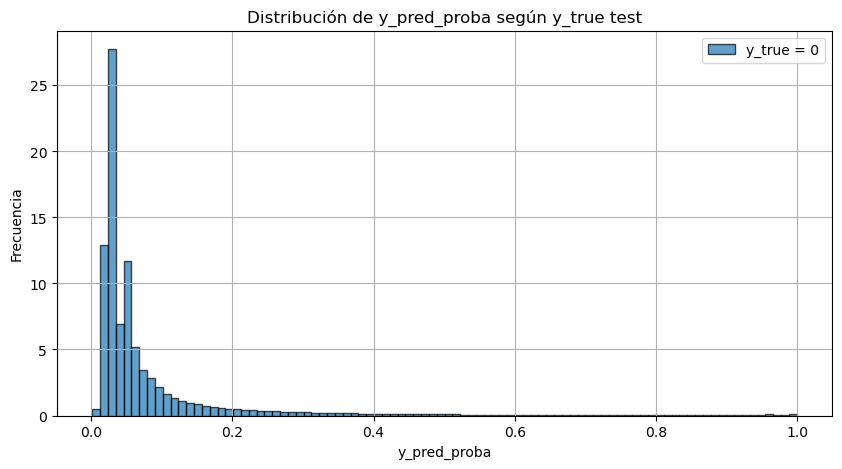

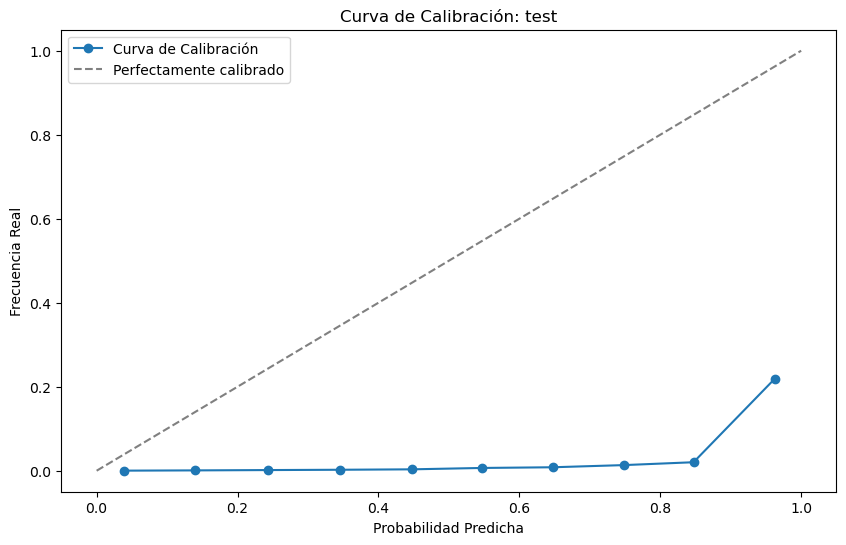

[09/30/24 18:53:07] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=83441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=967375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#461\461]8;;\

                    INFO     Agrupando datos por decil de apertura para calcular estadísticas          ]8;id=50349;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=861298;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#465\465]8;;\
                             básicas...                                                                            

                    INFO     Calculando el total de aperturas reales por decil...                      ]8;id=621333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=700283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#472\472]8;;\

                    INFO     Calculando el total de aperturas predichas por decil...                   ]8;id=347886;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=316305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#477\477]8;;\

                    INFO     Fusionando las estadísticas de aperturas reales con las estadísticas      ]8;id=689463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=186512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#480\480]8;;\
                             generales por decil...                                                                

                    INFO     Calculando la tasa de aperturas por decil...                              ]8;id=335719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=199043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#484\484]8;;\

                    INFO     Ordenando los datos por decil en orden descendente...                     ]8;id=51843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=842260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#487\487]8;;\

                    INFO     Calculando la distribución acumulada de aperturas observadas...           ]8;id=335902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=154593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#491\491]8;;\

                    INFO     Calculando la distribución acumulada de probabilidades esperadas...       ]8;id=238399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=539857;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#495\495]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=60205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=101100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#499\499]8;;\

                    INFO     Restableciendo el índice del DataFrame...                                 ]8;id=220910;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=814861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#502\502]8;;\

                    INFO     Calculando el total de aperturas reales por decil...                      ]8;id=750472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=134945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#505\505]8;;\

                    INFO     Calculando el total de aperturas predichas por decil...                   ]8;id=386991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=66471;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#510\510]8;;\

                    INFO     Fusionando las estadísticas de aperturas reales con las estadísticas      ]8;id=451582;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=109276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#513\513]8;;\
                             generales por decil...                                                                

                    INFO     Reordenando las columnas del DataFrame...                                 ]8;id=735294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=8012;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#520\520]8;;\

                    INFO     Deciles donde el ks aumenta:  [89, 88, 87]                                ]8;id=532579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=323329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#525\525]8;;\

'ks_test'

,prob_min,prob_max,tasa_aperturas
0,85.59,99.93,18.59
1,61.87,85.59,1.26
2,47.90,61.87,0.63
3,38.63,47.90,0.29


In [11]:
info_save_select = ms.calc_metrics_before_backtesting(info_save,info_save2,params)

In [25]:
info_save_select.keys()

dict_keys(['modelo_produccion', 'select_model2', 'all_results_select_model'])

In [9]:
info_save_select['modelo_produccion']


{
    'Muestreo_tipo': {
        'Type': 'Undersampling-Oversampling',
        'sampling_strategy1': 0.45,
        'sampling_strategy2': 0.6,
        'Use_auto': False
    },
    'X_train':           lib_cant  ah_sum_monto_trx_debito_std_3  \
20577615 -0.365360                       0.349629   
8879494  -0.365360                      -0.046434   
3177563  -0.365360                       0.495706   
18141463 -0.365360                       0.122057   
10756167 -0.365360                      -0.227665   
...            ...                            ...   
9049276   2.691698                      -0.227665   
17199317 -0.365360                       0.420792   
20274848 -0.365360                      -0.227665   
10209407  2.691698                      -0.227665   
6852563  -0.365360                      -0.211438   

          ah_sum_monto_trx_debito_std_6  lib_cant_prev  \
20577615                       0.180489      -0.364480   
8879494                       -0.061217      -0.364480  

In [10]:
info_save_select['modelo_produccion']['X_train']

,lib_cant,ah_sum_monto_trx_debito_std_3,ah_sum_monto_trx_debito_std_6,lib_cant_prev,ah_sum_monto_trx_credito_std_3,num_prod_activos,delta_ah_sum_monto_trx_credito,antiguedad_meses,estrato,ah_cant_prev,...,lib_saldo_corte,lib_sum_cuota_pactada,veh_cant,otras_ord_cant_prev,ah_sum_monto_trx_debito_mean_3,ah_sum_monto_trx_credito_std_6,ah_sum_monto_trx_credito_mean_2,num_activos_prev,edad_anios,lib_saldo_promedio
20577615,-0.365360,0.349629,0.180489,-0.364480,0.242607,1.242395,0.037800,0.589726,0.176156,-0.644358,...,-0.276495,-0.180742,-0.126405,-0.911650,0.826261,0.220442,0.781508,-0.632746,0.908308,-0.276163
8879494,-0.365360,-0.046434,-0.061217,-0.364480,-0.056393,1.242395,-0.018031,-1.161936,-1.191150,-0.644358,...,-0.276495,-0.180742,-0.126405,-0.911650,-0.251078,-0.067123,-0.228890,-0.632746,-1.530254,-0.276163
3177563,-0.365360,0.495706,0.357208,-0.364480,0.401702,-0.628025,-0.842133,1.094479,0.176156,1.393462,...,-0.276495,-0.180742,-0.126405,-0.911650,0.420351,0.276714,-0.080519,1.237011,0.176739,-0.276163
18141463,-0.365360,0.122057,0.216809,-0.364480,0.027588,-0.628025,0.292185,-0.468464,0.859809,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,1.126038,0.018217,1.086336,-0.632746,-0.879971,-0.276163
10756167,-0.365360,-0.227665,-0.241641,-0.364480,-0.208899,-0.628025,-0.018031,-1.067230,-1.191150,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,-0.473544,-0.276163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049276,2.691698,-0.227665,-0.241641,2.699342,-0.208899,-0.628025,-0.018031,2.096354,0.176156,-0.644358,...,2.151210,0.886791,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,2.290159,2.164487
17199317,-0.365360,0.420792,0.252245,-0.364480,0.119271,-0.628025,0.397773,-0.096577,-0.507497,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,0.142582,0.034244,0.423559,-0.632746,-0.798685,-0.276163
20274848,-0.365360,-0.227665,-0.241641,-0.364480,-0.208899,-0.628025,-0.018031,-0.198453,0.859809,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,-0.636115,-0.276163
10209407,2.691698,-0.227665,-0.241641,2.699342,-0.208899,-0.628025,-0.018031,1.576452,1.543462,-0.644358,...,2.244751,3.014826,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,0.339310,2.264782


In [11]:
info_save_select['modelo_produccion']['y_train']

,lib_target_ap_group3
20577615,0
8879494,0
3177563,0
18141463,0
10756167,0
...,...
9049276,0
17199317,0
20274848,0
10209407,0


In [ ]:
shap=calcular_shap_values(info_save_select)

El modelo es un XGBoost o RandomForest. Utilizando TreeExplainer.


In [15]:
from sklearn.inspection import permutation_importance
from io import BytesIO

def calcular_importancia(info_save_select):
    """
    Función para calcular la importancia de características por permutación
    y retornar la imagen del gráfico como un objeto BytesIO.
    
    Parámetros:
    -----------
    info_save_select: dict
        Diccionario que contiene la información del modelo, los datos de entrenamiento, 
        y otros datos relevantes. Debe incluir las claves 'X_train', 'y_train' y 'best_model'.
    
    Retorna:
    --------
    img_bytes: BytesIO
        Objeto BytesIO que contiene la imagen del gráfico.
    """
    
    # Extraer X_train, y_train y el modelo desde el diccionario info_save_select
    X_train = info_save_select['modelo_produccion']['X_train']
    y_train = info_save_select['modelo_produccion']['y_train']
    best_model = info_save_select['modelo_produccion']['best_model']
    
    # Calcular la importancia de las características por permutación
    result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)

    # Extraer las importancias
    feature_importances = result.importances_mean

    # Extraer los nombres de las características desde X_train
    feature_names = X_train.columns

    # Crear un DataFrame con las importancias
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # Ordenar por importancia
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Crear la imagen del gráfico en memoria
    img_bytes = BytesIO()
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.title('Importancia de las 10 principales características - Permutation Importance')
    plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
    
    # Guardar la imagen en el objeto BytesIO
    plt.savefig(img_bytes, format='png')
    plt.close()  # Cerrar la figura para liberar memoria
    img_bytes.seek(0)  # Mover el puntero del objeto BytesIO al inicio
    
    return img_bytes

In [10]:
# Extraer X_train y y_train desde el diccionario info_save_select
X_train = info_save_select['modelo_produccion']['X_train']
y_train = info_save_select['modelo_produccion']['y_train']

# Extraer el modelo desde el diccionario
best_model = info_save_select['modelo_produccion']['best_model']

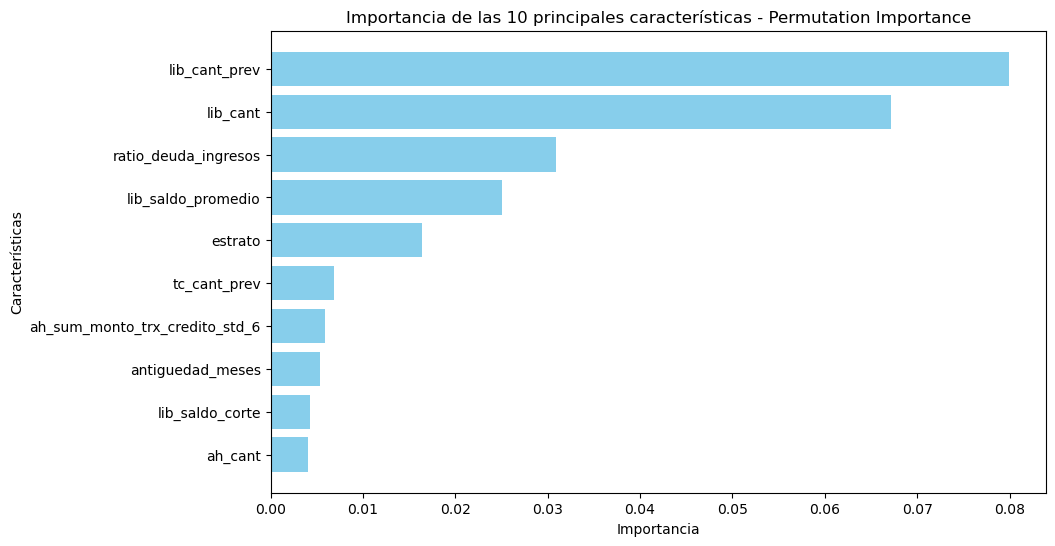

In [14]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extraer X_train y y_train desde el diccionario info_save_select
X_train = info_save_select['modelo_produccion']['X_train']
y_train = info_save_select['modelo_produccion']['y_train']
# Extraer el modelo desde el diccionario
best_model = info_save_select['modelo_produccion']['best_model']

# y_train_pred = best_model.predict(X_train)
# Calcular la importancia de las características por permutación
result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)

# Extraer las importancias
feature_importances = result.importances_mean

# Supongamos que scal_marzo es un DataFrame y contiene los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las 10 principales características - Permutation Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()


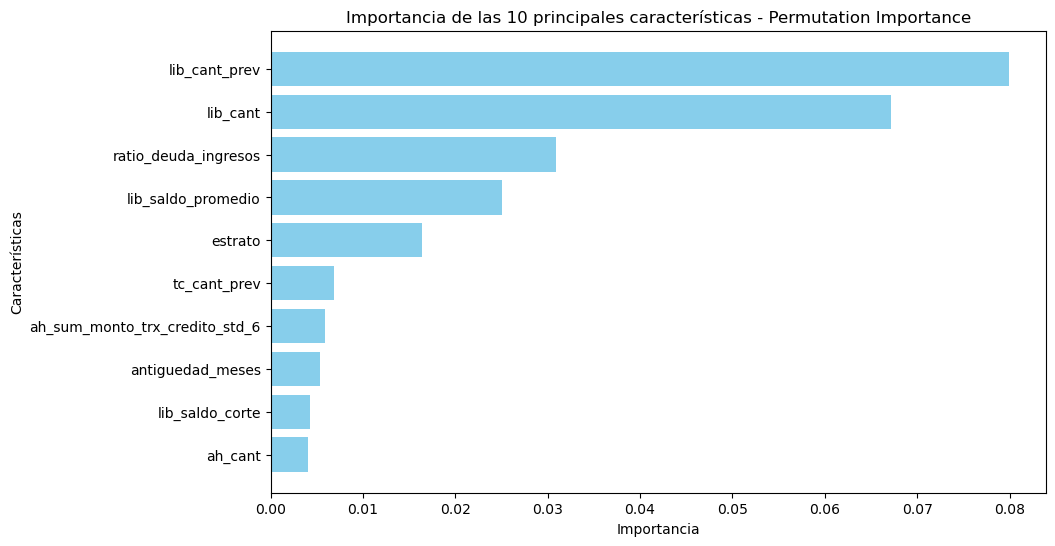

In [13]:
# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las 10 principales características - Permutation Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()

In [15]:
import shap
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

def calcular_shap_values(info_save_select):
    """
    Función para calcular los SHAP values de un modelo basado en el tipo de modelo.
    
    Parámetros:
    -----------
    info_save_select: dict
        Diccionario que contiene la información del modelo, los datos de entrenamiento, y otros datos relevantes.
        Debe tener las claves 'modelo_produccion' -> 'best_model', 'x_train' y 'y_train'.
    
    **params: dict
        Parámetros adicionales opcionales.
        
    Retorna:
    --------
    shap_values: array
        Los valores SHAP calculados.
    """
    
    # Extraer X_train y y_train desde el diccionario info_save_select
    X_train = info_save_select['modelo_produccion']['X_train']
    y_train = info_save_select['modelo_produccion']['y_train']
    
    # Extraer el modelo desde el diccionario
    best_model = info_save_select['modelo_produccion']['best_model']
    
    # Inicialización de variables
    explainer = None
    shap_values = None
    
    # Verificar si el modelo es una red neuronal MLP
    if isinstance(best_model, MLPClassifier):
        print("El modelo es un MLP. Utilizando Kernel SHAP o Deep SHAP.")
        
        # Para redes neuronales, usamos KernelExplainer (más genérico)
        explainer = shap.KernelExplainer(best_model.predict_proba, X_train)
        shap_values = explainer.shap_values(X_train)
    
    # Verificar si el modelo es XGBoost o RandomForest
    elif isinstance(best_model, xgboost.XGBClassifier) or isinstance(best_model, RandomForestClassifier):
        print("El modelo es un XGBoost o RandomForest. Utilizando TreeExplainer.")
        
        # Para modelos basados en árboles, TreeExplainer es la opción más eficiente
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_train)
    
    else:
        raise ValueError("El modelo no es compatible con el cálculo de SHAP values.")

    # Retornar los valores SHAP calculados
    return shap_values


In [21]:
info_save_select = ms.calc_metrics_before_backtesting(info_save,info_save2,params)

[09/25/24 00:11:34] INFO     Iniciando el calculo de las metricas...                                   ]8;id=614220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=30382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#562\562]8;;\

                    INFO     Models: best_model_name                                                   ]8;id=913901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=255639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_model_name                                                ]8;id=794976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=65847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[09/25/24 00:11:45] INFO     Models: best_unbiased_model                                               ]8;id=611746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=531269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_unbiased_model                                            ]8;id=238420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=638984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.5542       Run1      MLP_0   
           true_sum n_top test            3670       Run1      MLP_0   
           backtest       test          2.3302       Run1      MLP_0   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[09/25/24 00:11:50] INFO     Models: best_fitting_model                                                ]8;id=394417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=935040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_fitting_model                                             ]8;id=543060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=236815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test           4.513       Run9  random_forest_8   
           true_sum n_top test            3636       Run9  random_forest_8   
           backtest       test          2.3086       Run9  random_forest_8   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[09/25/24 00:11:55] INFO     Estrategy: modelo_produccion                                              ]8;id=359431;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=660996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

In [22]:
from typing import Dict, Any, Tuple

import pandas as pd
import numpy as np
from IPython.display import display
import logging
import gc
import traceback

# algoritmos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# optimizador
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold

# optimizador
from bayes_opt import BayesianOptimization

# metricas
from sklearn.metrics import f1_score,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics._classification import _prf_divide,_nanaverage,multilabel_confusion_matrix
from sklearn.metrics._classification import _check_zero_division,_check_set_wise_labels




logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# funcion auxiliar para extraer datos por si se requiere fitear:
def extract_data(info_save_temp):
    X_balance = info_save_temp["modelo_produccion"]["X_balance"]
    y_balance = info_save_temp["modelo_produccion"]["y_balance"]
    X_i2 = info_save_temp["modelo_produccion"]["X_train"]
    y_i2 = info_save_temp["modelo_produccion"]["y_train"]

    # Convertir X_train y y_train a arrays de NumPy
    X_train = X_balance.values
    y_train = y_balance.values.ravel()
    
    # Convertir X_train y y_train sin balancear a arrays de NumPy
    X_i = X_i2.values
    y_i = y_i2.values.ravel()
    return X_train,y_train,X_i,y_i

### Aux: optimizaciones con cambio de metricas

# xgboots

def optimize_train_xgboost(info_save_prod, nombre,scorer,params):
    """
    Train an XGBoost classifier using cross-validation and grid search with early stopping.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.

        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """
    logger.info(f"INICIANDO LA OPT. BAYESEIANA CON AJUSTE SOBRE EL MEJOR MODELO: XGBOOTS ...")    
        
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    seed = params["random_state"]
    # Extract cv_params from the params dictionary
    #cv_params = params[nombre]['cv_params']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    #param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    #param_grid = {key: [value] for key, value in param_grid.items()}
    # logger.info(cv_params)
    # logger.info(param_grid)
    
    # Initialize the XGBClassifier with early stopping rounds
    # model = XGBClassifier(
    #     use_label_encoder=False,
    #     eval_metric='logloss',
    #     n_jobs = cv_params['n_jobs'],
    #     random_state = seed,
    #     early_stopping_rounds=cv_params.get('early_stopping_rounds', 10)
    # )

    # Implement stratified k-fold cross-validation
    # skf = StratifiedKFold(n_splits=cv_params['n_splits'], shuffle=True, random_state=seed)
    # grid_search = GridSearchCV(
    #     model, param_grid,
    #     cv=skf,
    #     scoring=scorer,
    #     n_jobs=cv_params['n_jobs']
    # )
    
    # # Fit the model
    # if params["Iterar_con_balance"] == True:
    #     grid_search.fit(X_train, y_train, eval_set=[(X_i, y_i)], verbose=False)
    # else:
    #     grid_search.fit(X_i, y_i, eval_set=[(X_i, y_i)], verbose=False)
    # best_model = grid_search.best_estimator_
    # extrayendo los datos
    X_train,y_train,X_i,y_i = extract_data(info_save_prod) # Entrenamiento: balanceo, sin balanceo

    exploration_space = params["xgboost_classifier"]["exploration_space"]
    n_iter = params["xgboost_classifier"]["number_of_iterations"]
    init_points = params["xgboost_classifier"]["init_points"]
    cv_config = params["cv_config"]

    # evaluador de metricas
    def xgboost_evaluate(max_depth, n_estimators, learning_rate, min_child_weight, subsample, colsample_bytree, gamma):
        model = XGBClassifier(
            max_depth=int(max_depth),
            n_estimators=int(n_estimators),
            learning_rate=learning_rate,
            min_child_weight=int(min_child_weight),
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            random_state=seed
        )
    
        cv = RepeatedStratifiedKFold(**cv_config)
        scores = cross_val_score(model, X_train,y_train, cv=cv, scoring=scorer)
        # notese que es la data balanceada
        return np.mean(scores)
    
    optimizer = BayesianOptimization(
        f=xgboost_evaluate, pbounds=exploration_space, random_state=seed, verbose=2)
    
    optimizer.maximize(n_iter=n_iter, init_points=init_points)
    best_params = optimizer.max["params"]
    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_params
    info_save_prod["modelo_produccion"]["grid_search"] = optimizer
    gc.collect()
    return info_save_prod

###random forest 
def train_random_forest_with_cv(info_save_prod, nombre,scorer,params):
    """
    Train a Random Forest classifier using cross-validation and randomized search with Kedro parameters.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.
        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """

    logger.info(f"INICIANDO AJUSTE DE ENTRENAMIENTO DEL MEJOR MODELO SOBRE RANDOM FOREST ...")    
    seed = params["random_state"]
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    # Extract cv_params from the params dictionary
    cv_params = params[nombre]['cv_params']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    param_grid = {key: [value] for key, value in param_grid.items()}

    # extrayendo los datos
    X_train,y_train,X_i,y_i = extract_data(info_save_prod) # entrenamiento: Balanceo y sin balanceo

    logger.info(cv_params)
    logger.info(param_grid)
    
    # Initialize the RandomForestClassifier
    model = RandomForestClassifier(random_state=seed, n_jobs = cv_params['n_jobs'], verbose = 1)

    # Implement stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=cv_params['n_splits'], shuffle=True, random_state=seed)

    random_search = RandomizedSearchCV(
        model, 
        param_grid,
        n_iter=cv_params.get('n_iter', 100),
        cv=skf,
        scoring=scorer,
        n_jobs=cv_params['n_jobs'])

    if params["Iterar_con_balance"] == True:
        grid_search.fit(X_train,y_train)
    else:
        grid_search.fit(X_i,y_i)
        
    best_model = grid_search.best_estimator_

    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_model
    info_save_prod["modelo_produccion"]["grid_search"] = random_search

    gc.collect()
    return info_save_prod
###red neuronal
def red_neuronal(info_save_prod, nombre,scorer,params):

    """
    Train a MLP classifier using cross-validation and randomized search with Kedro parameters.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.
        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """
    logger.info(f"INICIANDO AJUSTE DE ENTRENAMIENTO DEL MEJOR MODELO SOBRE MLP CLASSIFIER ...")    
    seed = params["random_state"]
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    # Extract cv_params from the params dictionary
    cv_params = params[nombre]['cv_params']
    max_iter = params[nombre]['max_iter']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    param_grid = {key: [value] for key, value in param_grid.items()}

    # extrayendo los datos (balanceados, sin balancear
    X_train,y_train,X_i,y_i = extract_data(info_save_prod)

    logger.info(cv_params)
    logger.info(param_grid)
    
    # Initialize the MLP
    model = MLPClassifier(max_iter=max_iter,random_state = seed)


    # Implement stratified k-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=cv_params["n_splits"], 
                           n_jobs=cv_params["n_jobs"], 
                           verbose=1,
                          scoring = scorer)

    if params["Iterar_con_balance"] == True:
        grid_search.fit(X_train,y_train)
    else:
        grid_search.fit(X_i,y_i)

    best_model = grid_search.best_estimator_

    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_model
    info_save_prod["modelo_produccion"]["grid_search"] = grid_search

    gc.collect()
    return info_save_prod

# 0.0 Funcion auxiliar  para hacer optimizacion bayesiana...

# 0.1 Funcion auxiliar para generar la data para hacer ensambles
def procesamiento_data_ensamble(info_save,params):
    combine_models_select = [i.upper() for i in params["Ensamble"]["Algoritmos"]]
    # orden de las columnas
    nodos_select = [] 
    inputs_ensamble_train = pd.DataFrame()
    inputs_ensamble_test = pd.DataFrame()
    output_ensamble_train = pd.DataFrame()
    output_ensamble_test = pd.DataFrame()
    for nodo in range(info_save["nodo_run"]):
        # buscando los nombres de los nodos como los defini en el catalogo
        if info_save[nodo]['name_model'].upper() in combine_models_select: 
            nodos_select.append(nodo)
            # inputs del modelo en el nodo
            X_train = info_save[nodo]['X_train'].values
            X_test = info_save[nodo]['X_test'].values
            # output deseado de cada nodo
            y_train = info_save[nodo]['y_train'].values
            y_test = info_save[nodo]['y_test'].values
            # inputs del ensamble
            #y_hat_train = info_save[nodo]['best_model'].predict(X_train)
            y_hat_train_probs = info_save[nodo]['best_model'].predict_proba(X_train)[:,1]
            y_hat_train_probs = pd.DataFrame(y_hat_train_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_train = pd.concat([inputs_ensamble_train,y_hat_train_probs],axis = 1)

            #y_hat_test = info_save[nodo]['best_model'].predict(X_test)
            y_hat_test_probs = info_save[nodo]['best_model'].predict_proba(X_test)[:,1]
            y_hat_test_probs = pd.DataFrame(y_hat_test_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_test = pd.concat([inputs_ensamble_test,y_hat_train_probs],axis = 1)

            # output
            output_ensamble_train = pd.concat([output_ensamble_train,y_train], axis = 1)
            output_ensamble_test = pd.concat([output_ensamble_test,y_test], axis = 1)
    info_save['modelo_produccion']["nodos_select"] = nodos_select
    info_save['modelo_produccion']["X_train"] = inputs_ensamble_train
    info_save['modelo_produccion']["X_test"] = inputs_ensamble_test
    # TRAINING
    Y_TRAIN = output_ensamble_train.T.drop_duplicates().T
    Y_TEST = output_ensamble_train.T.drop_duplicates().T
    if (Y_TRAIN.shape[1] == 1) & (Y_TEST.shape[1] == 1):
        if (Y_TRAIN.isnull().sum().iloc[0]+Y_TEST.isnull().sum().iloc[0]) == 0:
            info_save['modelo_produccion']["y_train"] = Y_TRAIN
            info_save['modelo_produccion']["y_test"] = Y_TEST
        else:
            raise ValueError("En el ensamble no se logro concatenar los pronosticos Nulos >0.")
    else:
        raise ValueError("En el ensamble no se logro concatenar los pronosticos.")
    return info_save
# 0.1.1 Funcion auxiliar para entrenar un ensamble

########### 1. Nodo inicial ejecucion del modelo seleccionado o superoptimizacion
def generate_modelo_produccion(info_save,params):
    combine_models = params["Ensamble"]["want"]
    info_save2 = {}
    if combine_models == True:
        logger.info("Iniciando el Ensamblado de modelos...")
        # creadno las variables entrada y salida
        info_save2['modelo_produccion'] = {'nodos_select':None,'X_train':None,'X_test':None}

        info_save2['modelo_produccion']['y_train'] = None
        info_save2['modelo_produccion']['y_test'] = None
        info_save2['modelo_produccion']['type'] = "Ensamble"
        ## actualizo info_save
        info_save2 = procesamiento_data_ensamble(info_save,params)
        # entrenando el modelo
        pass
    else: 
        hiperoptimizacion = params['optimizacion_bayesiana']['want']
        if params['use_key']['want'] == False:
            key_model = params['use_key']['estrategia']
            logger.info(f"Modelo optimo segun la estrategia: {key_model}")
            # identificar el modelo que se selecciono
            llave = info_save['select_model'].loc["model_name",key_model].iloc[0]
            nodo_best = int(llave.split(",")[1].split("_")[-1])
        else:
            llave = params['use_key']['llave'][0]
            logger.info(f"Modelo optimo sin estrategia.")
            nodo_best = int(llave.split(",")[1].split("_")[-1])
        # proceso 
        logger.info(f"Llave del modelo: {llave}")

        if llave == info_save[nodo_best]['name_model']+","+info_save[nodo_best]['model_name']:
            logger.info("Modelo Identificado....")
            logger.info(f"Nodo: {nodo_best}. Llave {llave}")
            
            if hiperoptimizacion == True:
                logger.info("Iniciando la Optimizacion Bayesiana...")
                # optimizar modelo
                info_save2['modelo_produccion'] = info_save[nodo_best]
                info_save2['modelo_produccion']['type'] = "Opt_Bayesiana_adj"
                info_save2['modelo_produccion']["nodos_select"] = nodo_best # No es lista
                # nombre en el catalogo models
                iden_name = "_".join(info_save2['modelo_produccion']['model_name'].split("_")[:-1])
                logger.info(f"Algoritmo: {iden_name}")
                # funcion objetivo
                objetivo_metodo = params['optimizacion_bayesiana']['scorer']
                if  objetivo_metodo== 'backtest_scorer':
                    logger.info(f"Funcion Objetivo: 'backtesting_top_probabilities'")
                    obj_func = make_scorer(backtesting_top_probabilities,greater_is_better=True,needs_proba=True)
                elif objetivo_metodo== 'f1_n_top':
                    logger.info(f"Funcion Objetivo: 'custom_f1_score'")
                    obj_func = make_scorer(custom_f1_score, greater_is_better=True,needs_proba=True)
                else:
                    obj_func = params[iden_name]['cv_params']['scoring']
                    logger.info(f"Funcion Objetivo de los parametros de models:{obj_func}")

                # identificando modelo
                if iden_name == "random_forest":
                    info_save2 = train_random_forest_with_cv(info_save2,iden_name,obj_func,params)#falta
                elif iden_name == "xgboost":
                    info_save2 = optimize_train_xgboost(info_save2,iden_name,obj_func,params)
                elif iden_name == "MLP":
                    info_save2 = red_neuronal(info_save2, iden_name,obj_func,params) # falta
                else:
                    raise ValueError("No identifica la llave...")

            else:
                logger.info("Seleccionamos el modelo proveniente de models...")
                # quedarse con el modelo correcto y parametrizado en el otro artefacto nuevo
                info_save2['modelo_produccion']  = info_save[nodo_best]
                info_save2['modelo_produccion']['type'] = "Models"
                info_save2['modelo_produccion']["nodos_select"] = nodo_best # No es lista
    gc.collect()
    return info_save2

############### Nodo 2: Generar metricas de desempeño de datos similares a los vistos en backtesting

# 2.1 funciones auxiliares para generar dichas metricas

# funcion auxiliar para filtrar los mas probables
def want_res(y_probs, n_top):
    # Obtener las observaciones con las mayores probabilidades combinadas
    # ordenar de menor a mayor
    top_indices = np.argsort(y_probs)
    # quedarme con los de maxima probabilidad
    top_indices = top_indices[-n_top:]  
    return top_indices
    
# funcion auxiliar para calcular las metricas de sklear ajustadas por las mas probables y optimizar en el ensamble
def precision_recall_fscore_support_fabrica(
    y_true,
    y_probs,
    n_top,
    metric_calcs,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=("f-score"),#("precision", "recall", "f-score"),
    sample_weight=None,
    zero_division="warn",
):

    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, n_top)
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices]

    # Filtrar las predicicones seleccionadas
    y_call = np.array([1.0]*len(top_indices))
    #y_call = y_preds[top_indices]
    _check_zero_division(zero_division)
    labels = _check_set_wise_labels(y_top, y_call, average, labels, pos_label)
    
    # Calculate tp_sum, pred_sum, true_sum ###
    samplewise = average == "samples"
    MCM = multilabel_confusion_matrix(
        y_top,
        y_call,
        sample_weight=sample_weight,
        labels=labels,
        samplewise=samplewise,
    )
    #MCM[0,:,:] # MATRIZ DE CONFUSION PARA LABELS[0] --> RESULTADO [(TN,FP) , (FN, TP)]
    tp_sum = MCM[:, 1, 1]
    pred_sum = tp_sum + MCM[:, 0, 1]
    true_sum = tp_sum + MCM[:, 1, 0]

    if average == "micro":
        tp_sum = np.array([tp_sum.sum()])
        pred_sum = np.array([pred_sum.sum()])
        true_sum = np.array([true_sum.sum()])

    # Finally, we have all our sufficient statistics. Divide! #
    beta2 = beta**2
    # Divide, and on zero-division, set scores and/or warn according to
    # zero_division:
    precision = _prf_divide(
        tp_sum, pred_sum, "precision", "predicted", average, warn_for, zero_division
    )
    recall = _prf_divide(
        tp_sum, true_sum, "recall", "true", average, warn_for, zero_division
    )

    if np.isposinf(beta):
        f_score = recall
    elif beta == 0:
        f_score = precision
    else:
        # The score is defined as:
        # score = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
        # Therefore, we can express the score in terms of confusion matrix entries as:
        # score = (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)
        denom = beta2 * true_sum + pred_sum
        f_score = _prf_divide(
            (1 + beta2) * tp_sum,
            denom,
            "f-score",
            "true nor predicted",
            average,
            warn_for,
            zero_division,
        )

    # Average the results
    if average == "weighted":
        weights = true_sum
    elif average == "samples":
        weights = sample_weight
    else:
        weights = None

    if average is not None:
        assert average != "binary" or len(precision) == 1
        precision = _nanaverage(precision, weights=weights)
        recall = _nanaverage(recall, weights=weights)
        f_score = _nanaverage(f_score, weights=weights)
        true_sum = None  # return no support
    if metric_calcs == "precision":
        return precision
    elif metric_calcs == "recall":
        return recall
    elif metric_calcs == "f_score":
        return f_score
    elif metric_calcs == "true_sum":
        return true_sum
    else:
        return [precision, recall, f_score, true_sum]

### funciones auxiliar del ensamble para optimizar/validar metricas:
def custom_f1_score(y_true, y_probs,top_n = 40000, labels = [1] ,metric_calcs= "f_score"):
    
    array_value = precision_recall_fscore_support_fabrica(
                        y_true,
                        y_probs,
                        n_top = top_n,
                        labels = labels, #[0,1]
                        metric_calcs = metric_calcs #f_score,recall,precision
               ) 
    return array_value[0] # metrica unia deseada

def backtesting_top_probabilities(y_true,y_probs, top_n = 40000):
    def want_res(y_probs, n_top):
        # Obtener las observaciones con las mayores probabilidades combinadas
        # ordenar de menor a mayor
        top_indices = np.argsort(y_probs)
        # quedarme con los de maxima probabilidad
        top_indices = top_indices[-n_top:]  
        return top_indices
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, top_n)
    #top_indices_str = [str(int(index)) for index in top_indices]
    
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices] # tomo las etiquetas reales que seleccione de las predicciones
    #y_top = (y_top == 1).flatten() # dejo en True las TruePositive
    y_top = np.array(list((y_top == 1).flatten()))
    true_positive_indices = np.where(y_top)[0] # extraigo la posicion de los TruePositive

    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(true_positive_indices)
    # Step 3: Get the hashvalues in the top_n sorted df
    #top_hashvalues = set(top_indices)
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    #common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    #percentage_in_top = (len(common_hashvalues) / len(test_hashvalues))
    percentage_in_top = len(test_hashvalues)/np.min([top_n,y_top.shape[0]])
    return percentage_in_top

## Nodo 2: Calculo de las metricas de desempeño comparables al backtesting:

# def calc_metrics_before_backtesting(info_save,info_save2, params):
#     logger.info(f"Iniciando el calculo de las metricas...")
#     top_n = params['n_obs_filter']
#     metrics_backtest = pd.DataFrame()
#     for col in info_save["select_model"].columns.tolist()+["modelo_produccion"]:
#         if col == "modelo_produccion":
#             # debe buscar en el proyecto generado de select_model
#             nodo_col = info_save2[col]["nodos_select"]
#             if isinstance(nodo_col, (int, float)) and info_save2[col]['type'] == "Models":
#                 # es un modelo preseleccionado en modelos
#                 llave = info_save2[col]['name_model']+","+info_save2[col]['model_name']
#             elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Ensamble":
#                 pass
#             elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Opt_Bayesiana":
#                 pass
#             else:
#                 raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´´")
#             info_save_loop = info_save2['modelo_produccion'].copy()
#         else:
#             # debe buscar en el proyecto generado de models
#             logger.info(f"Models: {col}")
#             llave = info_save["select_model"].loc["model_name", col]
#             nodo_col = int(llave.split(",")[1].split("_")[-1])
#             info_save_loop = info_save[nodo_col].copy()

#         if llave == info_save_loop['name_model']+","+info_save_loop['model_name']:
#             logger.info(f"Estrategy: {col}")
#             for dataset_x,dataset_y in [["X_train","y_train"],["X_test","y_test"]]:
#                 probs=info_save_loop['best_model'].predict_proba(info_save_loop[dataset_x].values)
#                 probs = probs[:,1]
#                 y_true = info_save_loop[dataset_y].values
#                 backtest_metric = np.round(backtesting_top_probabilities(y_true,probs, top_n)*100,4)
#                 labels = [1,0]
#                 precision, recall, f_score, true_sum = precision_recall_fscore_support_fabrica(
#                                                       y_true,
#                                                       probs,
#                                                       n_top = top_n,
#                                                       labels = labels, #[0,1]
#                                                       metric_calcs =  'all'#f_score,recall,precision
#                                                            )
#                 index_name = ['Precision n_top','recall n_top','f1-score n_top','true_sum n_top']
#                 temp2 = pd.DataFrame(['backtest',backtest_metric,'1',dataset_y[2:]])
#                 temp2.index = ['metric_name','value','class_name','dataset_name']
#                 temp2 = temp2.T
#                 for t,index in enumerate([precision,recall,f_score,true_sum]):
#                     if t == 3:
#                         temp = pd.DataFrame(index, index = [index_name[t]]*len(labels), columns = ["value"])
#                     else:
#                         temp = pd.DataFrame(np.round(index*100,4), index = [index_name[t]]*len(labels), columns = ["value"])
#                     temp.index.name = 'metric_name'
#                     temp.reset_index(inplace = True)
#                     temp['class_name'] = labels
#                     temp["dataset_name"] = dataset_y[2:]
#                     temp2 = pd.concat([temp2,temp], axis = 0)
#                 temp2["name_model"] = info_save[nodo_col]['name_model']
#                 temp2["model_name"] = info_save[nodo_col]['model_name']
#                 temp2["select_model"] = col
#                 metrics_backtest = pd.concat([metrics_backtest,temp2], axis = 0)

#             metrics_backtest.sort_index(ascending=False, inplace = True)
#             check_df = temp2.set_index(['class_name','metric_name','dataset_name'])
#             printed = check_df[np.in1d(check_df.index.get_level_values(0), [1])]
#             printed2= printed[np.in1d(printed.index.get_level_values(1),['f1-score n_top','true_sum n_top'])]

#             printed1= check_df[np.in1d(check_df.index.get_level_values(1),['backtest'])]            
#             printed = pd.concat([printed2,printed1],axis = 0)
#             display(printed)
#         else:
#             raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´")
#     metrics_backtest.set_index(['class_name','metric_name','dataset_name'], inplace = True)
#     info_save2["select_model2"] = metrics_backtest
#     ### aqui va la imaagen de Serg:
#     # img =
#     if info_save2[col]['type'] == "Models":
#         del info_save2['modelo_produccion']['X_balance']
#         del info_save2['modelo_produccion']['y_balance']
#         del info_save2['modelo_produccion']['X_train']
#         del info_save2['modelo_produccion']['y_train']
#         del info_save2['modelo_produccion']['X_test']
#         del info_save2['modelo_produccion']['y_test']
#     llave = info_save2['modelo_produccion']['name_model']+","+info_save2['modelo_produccion']['model_name']
#     info_save2['all_results_select_model'] = info_save['all_results'][info_save['all_results']['model_name'] == llave]
#     return info_save2 #, img

# nodo de sergio
## def
### blac bla bla
## return imagen y retornar el info_save2

In [18]:
def want_res(y_probs, n_top):
    # Obtener las observaciones con las mayores probabilidades combinadas
    # ordenar de menor a mayor
    top_indices = np.argsort(y_probs)
    # quedarme con los de maxima probabilidad
    top_indices = top_indices[-n_top:]  
    return top_indices

In [16]:
def precision_recall_fscore_support_fabrica(
    y_true,
    y_probs,
    n_top,
    metric_calcs,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=("f-score"),#("precision", "recall", "f-score"),
    sample_weight=None,
    zero_division="warn",
):

    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, n_top)
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices]

    # Filtrar las predicicones seleccionadas
    y_call = np.array([1.0]*len(top_indices))
    #y_call = y_preds[top_indices]
    _check_zero_division(zero_division)
    labels = _check_set_wise_labels(y_top, y_call, average, labels, pos_label)
    
    # Calculate tp_sum, pred_sum, true_sum ###
    samplewise = average == "samples"
    MCM = multilabel_confusion_matrix(
        y_top,
        y_call,
        sample_weight=sample_weight,
        labels=labels,
        samplewise=samplewise,
    )
    #MCM[0,:,:] # MATRIZ DE CONFUSION PARA LABELS[0] --> RESULTADO [(TN,FP) , (FN, TP)]
    tp_sum = MCM[:, 1, 1]
    pred_sum = tp_sum + MCM[:, 0, 1]
    true_sum = tp_sum + MCM[:, 1, 0]

    if average == "micro":
        tp_sum = np.array([tp_sum.sum()])
        pred_sum = np.array([pred_sum.sum()])
        true_sum = np.array([true_sum.sum()])

    # Finally, we have all our sufficient statistics. Divide! #
    beta2 = beta**2
    # Divide, and on zero-division, set scores and/or warn according to
    # zero_division:
    precision = _prf_divide(
        tp_sum, pred_sum, "precision", "predicted", average, warn_for, zero_division
    )
    recall = _prf_divide(
        tp_sum, true_sum, "recall", "true", average, warn_for, zero_division
    )

    if np.isposinf(beta):
        f_score = recall
    elif beta == 0:
        f_score = precision
    else:
        # The score is defined as:
        # score = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
        # Therefore, we can express the score in terms of confusion matrix entries as:
        # score = (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)
        denom = beta2 * true_sum + pred_sum
        f_score = _prf_divide(
            (1 + beta2) * tp_sum,
            denom,
            "f-score",
            "true nor predicted",
            average,
            warn_for,
            zero_division,
        )

    # Average the results
    if average == "weighted":
        weights = true_sum
    elif average == "samples":
        weights = sample_weight
    else:
        weights = None

    if average is not None:
        assert average != "binary" or len(precision) == 1
        precision = _nanaverage(precision, weights=weights)
        recall = _nanaverage(recall, weights=weights)
        f_score = _nanaverage(f_score, weights=weights)
        true_sum = None  # return no support
    if metric_calcs == "precision":
        return precision
    elif metric_calcs == "recall":
        return recall
    elif metric_calcs == "f_score":
        return f_score
    elif metric_calcs == "true_sum":
        return true_sum
    else:
        return [precision, recall, f_score, true_sum]


In [14]:
def backtesting_top_probabilities(y_true,y_probs, top_n = 40000):
    def want_res(y_probs, n_top):
        # Obtener las observaciones con las mayores probabilidades combinadas
        # ordenar de menor a mayor
        top_indices = np.argsort(y_probs)
        # quedarme con los de maxima probabilidad
        top_indices = top_indices[-n_top:]  
        return top_indices
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, top_n)
    #top_indices_str = [str(int(index)) for index in top_indices]
    
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices] # tomo las etiquetas reales que seleccione de las predicciones
    #y_top = (y_top == 1).flatten() # dejo en True las TruePositive
    y_top = np.array(list((y_top == 1).flatten()))
    true_positive_indices = np.where(y_top)[0] # extraigo la posicion de los TruePositive

    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(true_positive_indices)
    # Step 3: Get the hashvalues in the top_n sorted df
    #top_hashvalues = set(top_indices)
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    #common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    #percentage_in_top = (len(common_hashvalues) / len(test_hashvalues))
    percentage_in_top = len(test_hashvalues)/np.min([top_n,y_top.shape[0]])
    return percentage_in_top

In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
from typing import Tuple,Dict,Any
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar el IterativeImputer
from sklearn.impute import IterativeImputer

In [2]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [3]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.raw.nodes as raw
import data_bbog_integration_fabrica_personas.pipelines.primary.nodes as primary
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.model_input.nodes as mi
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms
import data_bbog_integration_fabrica_personas.pipelines.model_output.nodes as mo

In [4]:
%load_ext kedro.ipython

[09/27/24 13:49:29] INFO     Resolved project path as:                                              ]8;id=539458;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=351645;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/27/24 13:49:29] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=542947;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=615238;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=873086;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=390033;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=768133;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=583132;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[09/27/24 13:49:30] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=361427;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=735937;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=898173;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=854759;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=890138;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=666261;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [5]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=162590;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=303806;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

## empezamos model_select:

# Especifica la ruta del archivo donde deseas guardar el modelo
ruta_guardar =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/experimentacion.pkl'

import pickle

# Cargar el Modelo desde un Archivo .pkl
with open(ruta_guardar, 'rb') as f:
    info_save = pickle.load(f)

info_save.keys()

In [6]:
info_save = catalog.load("info_save_all")

[09/27/24 13:49:35] INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=244040;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=817294;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [7]:
info_save.keys()

dict_keys(['nodo_run', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'all_results', 'best_model_metrics_dataset', 'select_model'])

In [8]:
combine_models = params["Ensamble"]["want"]
combine_models

False

def procesamiento_data_ensamble(info_save,params):
    combine_models_select = [i.upper() for i in params["Ensamble"]["Algoritmos"]]
        # creadno las variables entrada y salida
    info_save['modelo_produccion'] = {'nodos_select':None,'X_train':None,'X_test':None}
    
    info_save['modelo_produccion']['y_train'] = None
    info_save['modelo_produccion']['y_test'] = None
    info_save['modelo_produccion']['type'] = "Ensamble"
    # orden de las columnas
    nodos_select = [] 
    inputs_ensamble_train = pd.DataFrame()
    inputs_ensamble_test = pd.DataFrame()
    output_ensamble_train = pd.DataFrame()
    output_ensamble_test = pd.DataFrame()
    for nodo in range(info_save["nodo_run"]):
        # buscando los nombres de los nodos como los defini en el catalogo
        if info_save[nodo]['name_model'].upper() in combine_models_select: 
            logger.info(f"Nodo {nodo}, { info_save[nodo]['name_model']}")
            nodos_select.append(nodo)
            # inputs del modelo en el nodo
            X_train = info_save[nodo]['X_train'].values
            X_test = info_save[nodo]['X_test'].values
            # output deseado de cada nodo
            y_train = info_save[nodo]['y_train']
            y_test = info_save[nodo]['y_test']
            # inputs del ensamble
            #y_hat_train = info_save[nodo]['best_model'].predict(X_train)
            y_hat_train_probs = info_save[nodo]['best_model'].predict_proba(X_train)[:,1]
            y_hat_train_probs = pd.DataFrame(y_hat_train_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_train = pd.concat([inputs_ensamble_train,y_hat_train_probs],axis = 1)

            #y_hat_test = info_save[nodo]['best_model'].predict(X_test)
            y_hat_test_probs = info_save[nodo]['best_model'].predict_proba(X_test)[:,1]
            y_hat_test_probs = pd.DataFrame(y_hat_test_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_test = pd.concat([inputs_ensamble_test,y_hat_train_probs],axis = 1)

            # output
            output_ensamble_train = pd.concat([output_ensamble_train,y_train], axis = 1)
            output_ensamble_test = pd.concat([output_ensamble_test,y_test], axis = 1)
    logger.info(f"Ok Forecast")
    info_save['modelo_produccion']["nodos_select"] = nodos_select
    info_save['modelo_produccion']["X_train"] = inputs_ensamble_train
    info_save['modelo_produccion']["X_test"] = inputs_ensamble_test
    # TRAINING
    if (output_ensamble_train.isnull().sum().sum() == 0) & (len(output_ensamble_train.columns.unique().tolist())):
        Y_TRAIN = output_ensamble_train.iloc[:,0].to_frame()
    if (output_ensamble_test.isnull().sum().sum() == 0) & (len(output_ensamble_test.columns.unique().tolist())):
        Y_TEST = output_ensamble_test.iloc[:,0].to_frame()
    info_save['modelo_produccion']["y_train"] = Y_TRAIN
    info_save['modelo_produccion']["y_test"] = Y_TEST
    info_save2 = {}
    info_save2['modelo_produccion'] = info_save['modelo_produccion']
    for i in info_save2["modelo_produccion"]['nodos_select']:
        dicc = info_save[i].copy()
        info_save2[i] = clean_dataset(dicc)
    return info_save2

In [12]:
info_save[0].keys()

dict_keys(['Muestreo_tipo', 'X_balance', 'y_balance', 'X_train', 'y_train', 'X_test', 'y_test', 'Scaler', 'name_model', 'model_name', 'best_model', 'grid_search'])

In [13]:
info_save2 = ms.procesamiento_data_ensamble_for_train(info_save,params)

[09/27/24 13:50:43] INFO     Iniciando el Ensamblado de modelos...                                  ]8;id=139573;file:///tmp/ipykernel_228/3385534007.py\3385534007.py]8;;\:]8;id=249357;file:///tmp/ipykernel_228/3385534007.py#1\1]8;;\

                    INFO     train                                                                 ]8;id=553569;file:///tmp/ipykernel_228/2271720833.py\2271720833.py]8;;\:]8;id=770074;file:///tmp/ipykernel_228/2271720833.py#26\26]8;;\

                    INFO     Nodo 0, Run1                                                           ]8;id=507235;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=159330;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:50:46] INFO     Nodo 1, Run2                                                           ]8;id=374560;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=636192;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:50:47] INFO     Nodo 2, Run3                                                           ]8;id=526824;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=364700;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:50:51] INFO     Nodo 3, Run4                                                           ]8;id=567496;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=477257;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:00] INFO     Nodo 5, Run6                                                           ]8;id=745454;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=557955;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

                    INFO     Nodo 6, Run7                                                           ]8;id=55681;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=142016;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:03] INFO     Nodo 7, Run8                                                           ]8;id=886143;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=551561;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    3.0s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    7.7s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:   14.2s
[Parallel(n_jobs=32)]: Done 900 out of 900 | elapsed:   17.2s finished


[09/27/24 13:51:20] INFO     Nodo 10, Run11                                                         ]8;id=696882;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=99263;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:24] INFO     Nodo 11, Run12                                                         ]8;id=920891;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=116447;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    2.9s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    7.6s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:   14.1s
[Parallel(n_jobs=32)]: Done 900 out of 900 | elapsed:   17.1s finished


[09/27/24 13:51:44] INFO     test                                                                  ]8;id=759427;file:///tmp/ipykernel_228/2271720833.py\2271720833.py]8;;\:]8;id=239283;file:///tmp/ipykernel_228/2271720833.py#26\26]8;;\

                    INFO     Nodo 0, Run1                                                           ]8;id=589728;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=70367;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

                    INFO     Nodo 1, Run2                                                           ]8;id=183819;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=94099;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:45] INFO     Nodo 2, Run3                                                           ]8;id=35263;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=423211;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:46] INFO     Nodo 3, Run4                                                           ]8;id=158139;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=368092;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:48] INFO     Nodo 5, Run6                                                           ]8;id=63856;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=572107;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

                    INFO     Nodo 6, Run7                                                           ]8;id=748755;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=407538;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:49] INFO     Nodo 7, Run8                                                           ]8;id=774574;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=2376;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:    3.0s
[Parallel(n_jobs=32)]: Done 900 out of 900 | elapsed:    3.7s finished


[09/27/24 13:51:52] INFO     Nodo 10, Run11                                                         ]8;id=226091;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=662554;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:53] INFO     Nodo 11, Run12                                                         ]8;id=672864;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=92348;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:    3.2s
[Parallel(n_jobs=32)]: Done 900 out of 900 | elapsed:    3.9s finished


[09/27/24 13:52:06] INFO     Ok Forecast                                                           ]8;id=940510;file:///tmp/ipykernel_228/2271720833.py\2271720833.py]8;;\:]8;id=156917;file:///tmp/ipykernel_228/2271720833.py#42\42]8;;\

In [14]:
info_save2.keys()

dict_keys(['modelo_produccion', 0, 1, 2, 3, 5, 6, 7, 10, 11])

In [15]:
info_save2[0].keys()

dict_keys(['Muestreo_tipo', 'X_train', 'y_train', 'Scaler', 'name_model', 'model_name', 'best_model', 'grid_search'])

In [16]:
info_save2["modelo_produccion"].keys()

dict_keys(['nodos_select', 'X_train', 'X_test', 'y_train', 'y_test', 'type'])

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

In [18]:
from sklearn.metrics import f1_score,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics._classification import _prf_divide,_nanaverage,multilabel_confusion_matrix
from sklearn.metrics._classification import _check_zero_division,_check_set_wise_labels

In [19]:
def precision_recall_fscore_support_fabrica(
    y_true,
    y_probs,
    n_top,
    metric_calcs,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=("f-score"),#("precision", "recall", "f-score"),
    sample_weight=None,
    zero_division="warn",
):

    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, n_top)
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices]

    # Filtrar las predicicones seleccionadas
    y_call = np.array([1.0]*len(top_indices))
    #y_call = y_preds[top_indices]
    _check_zero_division(zero_division)
    labels = _check_set_wise_labels(y_top, y_call, average, labels, pos_label)
    
    # Calculate tp_sum, pred_sum, true_sum ###
    samplewise = average == "samples"
    MCM = multilabel_confusion_matrix(
        y_top,
        y_call,
        sample_weight=sample_weight,
        labels=labels,
        samplewise=samplewise,
    )
    #MCM[0,:,:] # MATRIZ DE CONFUSION PARA LABELS[0] --> RESULTADO [(TN,FP) , (FN, TP)]
    tp_sum = MCM[:, 1, 1]
    pred_sum = tp_sum + MCM[:, 0, 1]
    true_sum = tp_sum + MCM[:, 1, 0]

    if average == "micro":
        tp_sum = np.array([tp_sum.sum()])
        pred_sum = np.array([pred_sum.sum()])
        true_sum = np.array([true_sum.sum()])

    # Finally, we have all our sufficient statistics. Divide! #
    beta2 = beta**2
    # Divide, and on zero-division, set scores and/or warn according to
    # zero_division:
    precision = _prf_divide(
        tp_sum, pred_sum, "precision", "predicted", average, warn_for, zero_division
    )
    recall = _prf_divide(
        tp_sum, true_sum, "recall", "true", average, warn_for, zero_division
    )

    if np.isposinf(beta):
        f_score = recall
    elif beta == 0:
        f_score = precision
    else:
        # The score is defined as:
        # score = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
        # Therefore, we can express the score in terms of confusion matrix entries as:
        # score = (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)
        denom = beta2 * true_sum + pred_sum
        f_score = _prf_divide(
            (1 + beta2) * tp_sum,
            denom,
            "f-score",
            "true nor predicted",
            average,
            warn_for,
            zero_division,
        )

    # Average the results
    if average == "weighted":
        weights = true_sum
    elif average == "samples":
        weights = sample_weight
    else:
        weights = None

    if average is not None:
        assert average != "binary" or len(precision) == 1
        precision = _nanaverage(precision, weights=weights)
        recall = _nanaverage(recall, weights=weights)
        f_score = _nanaverage(f_score, weights=weights)
        true_sum = None  # return no support
    if metric_calcs == "precision":
        return precision
    elif metric_calcs == "recall":
        return recall
    elif metric_calcs == "f_score":
        return f_score
    elif metric_calcs == "true_sum":
        return true_sum
    else:
        return [precision, recall, f_score, true_sum]


In [25]:
### funciones auxiliar del ensamble para optimizar/validar metricas:
def custom_f1_score(y_true, y_probs):
    top_n = 0.15
    labels = [1] 
    metric_calcs= "f_score"
    if top_n <=1:
        top_n = len(y_probs)*top_n

    array_value = precision_recall_fscore_support_fabrica(
                        y_true,
                        y_probs,
                        n_top = top_n,
                        labels = labels, #[0,1]
                        metric_calcs = metric_calcs #f_score,recall,precision
               ) 
    return array_value[0] # metrica unia deseada

def backtesting_top_probabilities(y_true,y_probs):
    top_n = 0.15
    def want_res(y_probs, n_top):
        # Obtener las observaciones con las mayores probabilidades combinadas
        # ordenar de menor a mayor
        top_indices = np.argsort(y_probs)
        # quedarme con los de maxima probabilidad
        top_indices = top_indices[-n_top:]  
        return top_indices
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    # Obtener las observaciones con las mayores probabilidades combinadas
    if top_n <=1:
        top_n = len(y_probs)*top_n
    top_indices = want_res(y_probs, top_n)
    #top_indices_str = [str(int(index)) for index in top_indices]
    
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices] # tomo las etiquetas reales que seleccione de las predicciones
    #y_top = (y_top == 1).flatten() # dejo en True las TruePositive
    y_top = np.array(list((y_top == 1).flatten()))
    true_positive_indices = np.where(y_top)[0] # extraigo la posicion de los TruePositive

    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(true_positive_indices)
    # Step 3: Get the hashvalues in the top_n sorted df
    #top_hashvalues = set(top_indices)
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    #common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    #percentage_in_top = (len(common_hashvalues) / len(test_hashvalues))
    percentage_in_top = len(test_hashvalues)/np.min([top_n,y_top.shape[0]])
    return percentage_in_top


In [26]:
                # funcion objetivo
                objetivo_metodo = params['Ensamble']['scorer']
                if  objetivo_metodo== 'backtest_scorer':
                    logger.info(f"Funcion Objetivo: 'backtesting_top_probabilities'")
                    obj_func = make_scorer(backtesting_top_probabilities,greater_is_better=True,needs_proba=True)
                elif objetivo_metodo== 'f1_n_top':
                    logger.info(f"Funcion Objetivo: 'custom_f1_score'")
                    obj_func = make_scorer(custom_f1_score, greater_is_better=True,needs_proba=True)
                else:
                    obj_func = params[iden_name]['cv_params']['scoring']
                    logger.info(f"Funcion Objetivo de los parametros de models:{obj_func}")

[09/27/24 13:52:42] INFO     Funcion Objetivo: 'backtesting_top_probabilities'                      ]8;id=340658;file:///tmp/ipykernel_228/1798380736.py\1798380736.py]8;;\:]8;id=136079;file:///tmp/ipykernel_228/1798380736.py#4\4]8;;\

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=278772;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=107069;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_scorer.py:548: FutureWarning: The                            
                             `needs_threshold` and `needs_proba` parameter are deprecated in                       
                             version 1.4 and will be removed in 1.6. You can either let                            
                             `response_method` be `None` or set it to `predict` to preserve the                    
                             same behaviour.                                                                       
                               warnings.warn(                                                                      
                                                                                                                   

In [27]:
x_train = info_save2["modelo_produccion"]["X_train"].values 
y_train =info_save2["modelo_produccion"]["y_train"].values.ravel()

In [28]:
x_test = info_save2["modelo_produccion"]["X_test"].values 
y_test =info_save2["modelo_produccion"]["y_test"].values.ravel()

In [29]:
# Definir el modelo
model = MLPClassifier(max_iter=500,random_state = 23)  # Usa el 10% de los datos para validación

# Definir los parámetros a ajustar
param_dist = {
    #'validation_fraction': [0.1],
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'alpha': np.logspace(-4, 4, 10),
    'learning_rate_init': [0.001, 0.01, 0.1],
}


In [ ]:
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=100, scoring=obj_func, 
                                   cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train,y_train)

/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/tmp/ipykernel_228/3132424791.py", line 32, in backtesting_top_probabiliti

In [33]:
# Especifica la ruta del archivo donde deseas guardar el modelo
ruta_guardar =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model.pkl'
ruta_guardar1 =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model1.pkl'
ruta_guardar2 =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model2.pkl'
ruta_guarda3 =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model3.pkl'
ruta_guardar4 =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model4.pkl'
ruta_guardar5 =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model5.pkl'

In [34]:
import pickle
# Guarda el modelo en un archivo pickle
with open(ruta_guardar, 'wb') as archivo:
    pickle.dump(random_search, archivo)
print(f'Modelo guardado en {ruta_guardar}')

Modelo guardado en /home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model.pkl


In [35]:
# Definir el modelo
model1 = MLPClassifier(max_iter=500,random_state = 23, validation_fraction=0.1)  # Usa el 10% de los datos para validación
model1.fit(x_train,y_train)

MLPClassifier(max_iter=500, random_state=23)

In [36]:
# Guarda el modelo en un archivo pickle
with open(ruta_guardar1, 'wb') as archivo:
    pickle.dump(model1, archivo)
print(f'Modelo guardado en {ruta_guardar}')

Modelo guardado en /home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model.pkl


In [ ]:
3

In [ ]:
# Configurar GridSearchCV
search_backtest = GridSearchCV(estimator=model, param_grid=param_dist, scoring=obj_func, cv=5,n_jobs =-1)
search_backtest.fit(x_train,y_train)

/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/tmp/ipykernel_228/3132424791.py", line 32, in backtesting_top_probabiliti

In [ ]:
3

In [ ]:
# Guarda el modelo en un archivo pickle
with open(ruta_guardar2, 'wb') as archivo:
    pickle.dump(search_backtest, archivo)
print(f'Modelo guardado en {ruta_guardar}')

In [ ]:
obj_func = make_scorer(custom_f1_score, greater_is_better=True,needs_proba=True)

In [ ]:
random_search3 = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=100, scoring=obj_func, 
                                   cv=5, random_state=42, n_jobs=-1)
random_search3.fit(x_train,y_train)

In [ ]:
# Guarda el modelo en un archivo pickle
with open(ruta_guarda3, 'wb') as archivo:
    pickle.dump(random_search3, archivo)
print(f'Modelo guardado en {ruta_guardar}')

In [ ]:
# Configurar GridSearchCV
search_backtest4 = GridSearchCV(estimator=model, param_grid=param_dist, scoring=obj_func, cv=5,n_jobs =-1)
search_backtest4.fit(x_train,y_train)

In [ ]:
# Guarda el modelo en un archivo pickle
with open(ruta_guardar4, 'wb') as archivo:
    pickle.dump(search_backtest4, archivo)
print(f'Modelo guardado en {ruta_guardar}')

In [ ]:
# Definir el modelo
modelito = MLPClassifier(max_iter=500, 
                      solver = 'adam',
                      hidden_layer_sizes = (10,),
                      random_state = 23)  # Usa el 10% de los datos para validación

def f1_at_threshold(modelito, X, y, threshold):
    y_proba = modelito.predict_proba(X)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    return f1_score(y, y_pred)

# Función que envuelve el modelo y permite optimizar el umbral
def f1_scorer(threshold):
    model.fit(X_train, y_train)
    return f1_at_threshold(modelito, X_test, y_test, threshold)

from skopt import BayesSearchCV
# Definir el espacio de búsqueda del umbral
threshold_space = [(0.0, 1.0)]

# Crear el BayesSearchCV
opt = BayesSearchCV(
    modelito,
    param_dist,
    n_iter=50,
    scoring=f1_scorer,
    search_spaces=threshold_space,
    random_state=42
)

# Realizar la búsqueda
opt.fit(X_train, y_train)

In [ ]:
best_model = opt.best_estimator_
best_threshold = opt.best_params_['threshold']

In [ ]:
# Guarda el modelo en un archivo pickle
with open(ruta_guardar5, 'wb') as archivo:
    pickle.dump(opt, archivo)
print(f'Modelo guardado en {ruta_guardar}')

In [65]:
# Cargar el Modelo desde un Archivo .pkl
with open(ruta_guardar, 'rb') as f:
    sdfdfsfd = pickle.load(f)

sdfdfsfd

RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=23),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50)],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1],
                                        'solver': ['adam']},
                   random_state=42,
                   scoring=make_scorer(backtesting_top_probabilities, response_method='predict_proba'))

In [9]:
info_save2 = ms.generate_modelo_produccion(info_save,params);

[09/26/24 17:25:51] INFO     Modelo optimo segun la estrategia: ['best_model_name']                    ]8;id=802206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=566404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#349\349]8;;\

                    INFO     Llave del modelo: Run1,MLP_0                                              ]8;id=67984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=339647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#358\358]8;;\

                    INFO     Modelo Identificado....                                                   ]8;id=67547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=147154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#361\361]8;;\

                    INFO     Nodo: 0. Llave Run1,MLP_0                                                 ]8;id=340304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=834655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#362\362]8;;\

                    INFO     Seleccionamos el modelo proveniente de models...                          ]8;id=615648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=749716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#396\396]8;;\

In [10]:
info_save_temp.keys()

dict_keys(['nodo_run', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [9]:
info_save_select = ms.calc_metrics_before_backtesting(info_save,info_save2,params)

                    INFO     Iniciando el calculo de las metricas...                                   ]8;id=993122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=733538;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#565\565]8;;\

                    INFO     Models: best_model_name                                                   ]8;id=711291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=232257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#584\584]8;;\

                    INFO     Estrategy: best_model_name                                                ]8;id=477003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=66987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#590\590]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[09/25/24 03:00:45] INFO     Models: best_unbiased_model                                               ]8;id=834762;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=489931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#584\584]8;;\

                    INFO     Estrategy: best_unbiased_model                                            ]8;id=692497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=532251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#590\590]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.5542       Run1      MLP_0   
           true_sum n_top test            3670       Run1      MLP_0   
           backtest       test          2.3302       Run1      MLP_0   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[09/25/24 03:00:50] INFO     Models: best_fitting_model                                                ]8;id=127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=599352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#584\584]8;;\

                    INFO     Estrategy: best_fitting_model                                             ]8;id=144985;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=498861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#590\590]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.5s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test           4.513       Run9  random_forest_8   
           true_sum n_top test            3636       Run9  random_forest_8   
           backtest       test          2.3086       Run9  random_forest_8   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[09/25/24 03:00:55] INFO     Estrategy: modelo_produccion                                              ]8;id=804837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=199547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#590\590]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

In [12]:
def calc_metrics_before_backtesting(info_save,info_save2, params):
    logger.info(f"Iniciando el calculo de las metricas...")
    top_n = params['n_obs_filter']
    metrics_backtest = pd.DataFrame()
    for col in info_save["select_model"].columns.tolist()+["modelo_produccion"]:
        if col == "modelo_produccion":
            # debe buscar en el proyecto generado de select_model
            nodo_col = info_save2[col]["nodos_select"]
            if isinstance(nodo_col, (int, float)) and info_save2[col]['type'] == "Models":
                # es un modelo preseleccionado en modelos
                llave = info_save2[col]['name_model']+","+info_save2[col]['model_name']
            elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Ensamble":
                pass
            elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Opt_Bayesiana":
                pass
            else:
                raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´´")
            info_save_loop = info_save2['modelo_produccion'].copy()
        else:
            # debe buscar en el proyecto generado de models
            logger.info(f"Models: {col}")
            llave = info_save["select_model"].loc["model_name", col]
            nodo_col = int(llave.split(",")[1].split("_")[-1])
            info_save_loop = info_save[nodo_col].copy()

        if llave == info_save_loop['name_model']+","+info_save_loop['model_name']:
            logger.info(f"Estrategy: {col}")
            for dataset_x,dataset_y in [["X_train","y_train"],["X_test","y_test"]]:
                probs=info_save_loop['best_model'].predict_proba(info_save_loop[dataset_x].values)
                probs = probs[:,1]
                y_true = info_save_loop[dataset_y].values
                backtest_metric = np.round(backtesting_top_probabilities(y_true,probs, top_n)*100,4)
                labels = [1,0]
                precision, recall, f_score, true_sum = precision_recall_fscore_support_fabrica(
                                                      y_true,
                                                      probs,
                                                      n_top = top_n,
                                                      labels = labels, #[0,1]
                                                      metric_calcs =  'all'#f_score,recall,precision
                                                           )
                index_name = ['Precision n_top','recall n_top','f1-score n_top','true_sum n_top']
                temp2 = pd.DataFrame(['backtest',backtest_metric,'1',dataset_y[2:]])
                temp2.index = ['metric_name','value','class_name','dataset_name']
                temp2 = temp2.T
                for t,index in enumerate([precision,recall,f_score,true_sum]):
                    if t == 3:
                        temp = pd.DataFrame(index, index = [index_name[t]]*len(labels), columns = ["value"])
                    else:
                        temp = pd.DataFrame(np.round(index*100,4), index = [index_name[t]]*len(labels), columns = ["value"])
                    temp.index.name = 'metric_name'
                    temp.reset_index(inplace = True)
                    temp['class_name'] = labels
                    temp["dataset_name"] = dataset_y[2:]
                    temp2 = pd.concat([temp2,temp], axis = 0)
                temp2["name_model"] = info_save[nodo_col]['name_model']
                temp2["model_name"] = info_save[nodo_col]['model_name']
                temp2["select_model"] = col
                metrics_backtest = pd.concat([metrics_backtest,temp2], axis = 0)

            metrics_backtest.sort_index(ascending=False, inplace = True)
            check_df = temp2.set_index(['class_name','metric_name','dataset_name'])
            printed = check_df[np.in1d(check_df.index.get_level_values(0), [1])]
            printed2= printed[np.in1d(printed.index.get_level_values(1),['f1-score n_top','true_sum n_top'])]

            printed1= check_df[np.in1d(check_df.index.get_level_values(1),['backtest'])]            
            printed = pd.concat([printed2,printed1],axis = 0)
            display(printed)
        else:
            raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´")
    metrics_backtest.set_index(['class_name','metric_name','dataset_name'], inplace = True)
    info_save2["select_model2"] = metrics_backtest
    ### aqui va la imaagen de Serg:
    # img =
    if info_save2[col]['type'] == "Models":
        del info_save2['modelo_produccion']['X_balance']
        del info_save2['modelo_produccion']['y_balance']
        # del info_save2['modelo_produccion']['X_train']
        # del info_save2['modelo_produccion']['y_train']
        del info_save2['modelo_produccion']['X_test']
        del info_save2['modelo_produccion']['y_test']
    llave = info_save2['modelo_produccion']['name_model']+","+info_save2['modelo_produccion']['model_name']
    info_save2['all_results_select_model'] = info_save['all_results'][info_save['all_results']['model_name'] == llave]
    return info_save2 #, img

In [25]:
info_save_select.keys()

dict_keys(['modelo_produccion', 'select_model2', 'all_results_select_model'])

In [9]:
info_save_select['modelo_produccion']


{
    'Muestreo_tipo': {
        'Type': 'Undersampling-Oversampling',
        'sampling_strategy1': 0.45,
        'sampling_strategy2': 0.6,
        'Use_auto': False
    },
    'X_train':           lib_cant  ah_sum_monto_trx_debito_std_3  \
20577615 -0.365360                       0.349629   
8879494  -0.365360                      -0.046434   
3177563  -0.365360                       0.495706   
18141463 -0.365360                       0.122057   
10756167 -0.365360                      -0.227665   
...            ...                            ...   
9049276   2.691698                      -0.227665   
17199317 -0.365360                       0.420792   
20274848 -0.365360                      -0.227665   
10209407  2.691698                      -0.227665   
6852563  -0.365360                      -0.211438   

          ah_sum_monto_trx_debito_std_6  lib_cant_prev  \
20577615                       0.180489      -0.364480   
8879494                       -0.061217      -0.364480  

In [10]:
info_save_select['modelo_produccion']['X_train']

,lib_cant,ah_sum_monto_trx_debito_std_3,ah_sum_monto_trx_debito_std_6,lib_cant_prev,ah_sum_monto_trx_credito_std_3,num_prod_activos,delta_ah_sum_monto_trx_credito,antiguedad_meses,estrato,ah_cant_prev,...,lib_saldo_corte,lib_sum_cuota_pactada,veh_cant,otras_ord_cant_prev,ah_sum_monto_trx_debito_mean_3,ah_sum_monto_trx_credito_std_6,ah_sum_monto_trx_credito_mean_2,num_activos_prev,edad_anios,lib_saldo_promedio
20577615,-0.365360,0.349629,0.180489,-0.364480,0.242607,1.242395,0.037800,0.589726,0.176156,-0.644358,...,-0.276495,-0.180742,-0.126405,-0.911650,0.826261,0.220442,0.781508,-0.632746,0.908308,-0.276163
8879494,-0.365360,-0.046434,-0.061217,-0.364480,-0.056393,1.242395,-0.018031,-1.161936,-1.191150,-0.644358,...,-0.276495,-0.180742,-0.126405,-0.911650,-0.251078,-0.067123,-0.228890,-0.632746,-1.530254,-0.276163
3177563,-0.365360,0.495706,0.357208,-0.364480,0.401702,-0.628025,-0.842133,1.094479,0.176156,1.393462,...,-0.276495,-0.180742,-0.126405,-0.911650,0.420351,0.276714,-0.080519,1.237011,0.176739,-0.276163
18141463,-0.365360,0.122057,0.216809,-0.364480,0.027588,-0.628025,0.292185,-0.468464,0.859809,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,1.126038,0.018217,1.086336,-0.632746,-0.879971,-0.276163
10756167,-0.365360,-0.227665,-0.241641,-0.364480,-0.208899,-0.628025,-0.018031,-1.067230,-1.191150,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,-0.473544,-0.276163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049276,2.691698,-0.227665,-0.241641,2.699342,-0.208899,-0.628025,-0.018031,2.096354,0.176156,-0.644358,...,2.151210,0.886791,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,2.290159,2.164487
17199317,-0.365360,0.420792,0.252245,-0.364480,0.119271,-0.628025,0.397773,-0.096577,-0.507497,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,0.142582,0.034244,0.423559,-0.632746,-0.798685,-0.276163
20274848,-0.365360,-0.227665,-0.241641,-0.364480,-0.208899,-0.628025,-0.018031,-0.198453,0.859809,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,-0.636115,-0.276163
10209407,2.691698,-0.227665,-0.241641,2.699342,-0.208899,-0.628025,-0.018031,1.576452,1.543462,-0.644358,...,2.244751,3.014826,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,0.339310,2.264782


In [11]:
info_save_select['modelo_produccion']['y_train']

,lib_target_ap_group3
20577615,0
8879494,0
3177563,0
18141463,0
10756167,0
...,...
9049276,0
17199317,0
20274848,0
10209407,0


In [ ]:
shap=calcular_shap_values(info_save_select)

El modelo es un XGBoost o RandomForest. Utilizando TreeExplainer.


In [15]:
from sklearn.inspection import permutation_importance
from io import BytesIO

def calcular_importancia(info_save_select):
    """
    Función para calcular la importancia de características por permutación
    y retornar la imagen del gráfico como un objeto BytesIO.
    
    Parámetros:
    -----------
    info_save_select: dict
        Diccionario que contiene la información del modelo, los datos de entrenamiento, 
        y otros datos relevantes. Debe incluir las claves 'X_train', 'y_train' y 'best_model'.
    
    Retorna:
    --------
    img_bytes: BytesIO
        Objeto BytesIO que contiene la imagen del gráfico.
    """
    
    # Extraer X_train, y_train y el modelo desde el diccionario info_save_select
    X_train = info_save_select['modelo_produccion']['X_train']
    y_train = info_save_select['modelo_produccion']['y_train']
    best_model = info_save_select['modelo_produccion']['best_model']
    
    # Calcular la importancia de las características por permutación
    result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)

    # Extraer las importancias
    feature_importances = result.importances_mean

    # Extraer los nombres de las características desde X_train
    feature_names = X_train.columns

    # Crear un DataFrame con las importancias
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # Ordenar por importancia
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Crear la imagen del gráfico en memoria
    img_bytes = BytesIO()
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.title('Importancia de las 10 principales características - Permutation Importance')
    plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
    
    # Guardar la imagen en el objeto BytesIO
    plt.savefig(img_bytes, format='png')
    plt.close()  # Cerrar la figura para liberar memoria
    img_bytes.seek(0)  # Mover el puntero del objeto BytesIO al inicio
    
    return img_bytes

In [10]:
# Extraer X_train y y_train desde el diccionario info_save_select
X_train = info_save_select['modelo_produccion']['X_train']
y_train = info_save_select['modelo_produccion']['y_train']

# Extraer el modelo desde el diccionario
best_model = info_save_select['modelo_produccion']['best_model']

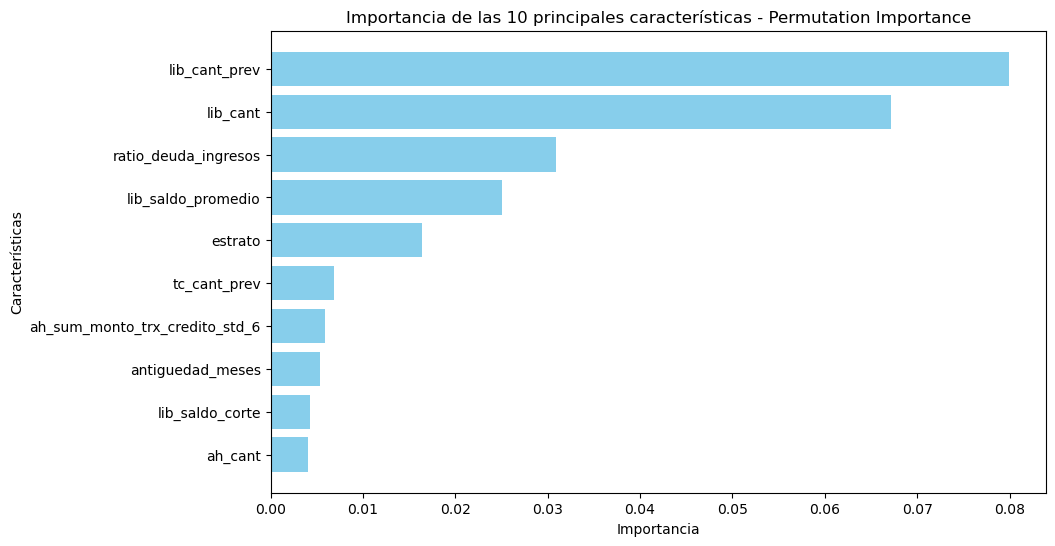

In [14]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extraer X_train y y_train desde el diccionario info_save_select
X_train = info_save_select['modelo_produccion']['X_train']
y_train = info_save_select['modelo_produccion']['y_train']
# Extraer el modelo desde el diccionario
best_model = info_save_select['modelo_produccion']['best_model']

# y_train_pred = best_model.predict(X_train)
# Calcular la importancia de las características por permutación
result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)

# Extraer las importancias
feature_importances = result.importances_mean

# Supongamos que scal_marzo es un DataFrame y contiene los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las 10 principales características - Permutation Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()


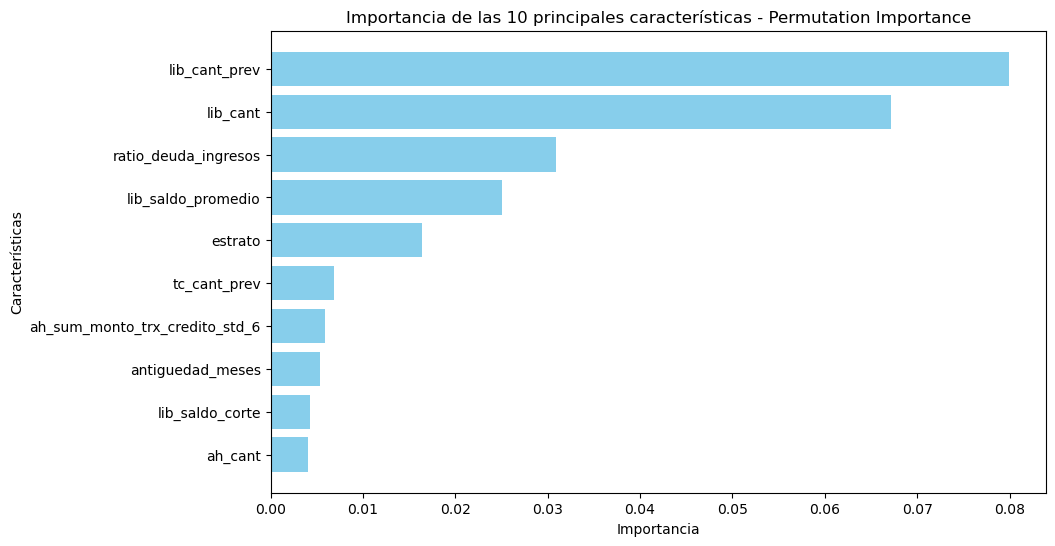

In [13]:
# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las 10 principales características - Permutation Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()

In [15]:
import shap
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

def calcular_shap_values(info_save_select):
    """
    Función para calcular los SHAP values de un modelo basado en el tipo de modelo.
    
    Parámetros:
    -----------
    info_save_select: dict
        Diccionario que contiene la información del modelo, los datos de entrenamiento, y otros datos relevantes.
        Debe tener las claves 'modelo_produccion' -> 'best_model', 'x_train' y 'y_train'.
    
    **params: dict
        Parámetros adicionales opcionales.
        
    Retorna:
    --------
    shap_values: array
        Los valores SHAP calculados.
    """
    
    # Extraer X_train y y_train desde el diccionario info_save_select
    X_train = info_save_select['modelo_produccion']['X_train']
    y_train = info_save_select['modelo_produccion']['y_train']
    
    # Extraer el modelo desde el diccionario
    best_model = info_save_select['modelo_produccion']['best_model']
    
    # Inicialización de variables
    explainer = None
    shap_values = None
    
    # Verificar si el modelo es una red neuronal MLP
    if isinstance(best_model, MLPClassifier):
        print("El modelo es un MLP. Utilizando Kernel SHAP o Deep SHAP.")
        
        # Para redes neuronales, usamos KernelExplainer (más genérico)
        explainer = shap.KernelExplainer(best_model.predict_proba, X_train)
        shap_values = explainer.shap_values(X_train)
    
    # Verificar si el modelo es XGBoost o RandomForest
    elif isinstance(best_model, xgboost.XGBClassifier) or isinstance(best_model, RandomForestClassifier):
        print("El modelo es un XGBoost o RandomForest. Utilizando TreeExplainer.")
        
        # Para modelos basados en árboles, TreeExplainer es la opción más eficiente
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_train)
    
    else:
        raise ValueError("El modelo no es compatible con el cálculo de SHAP values.")

    # Retornar los valores SHAP calculados
    return shap_values


In [21]:
info_save_select = ms.calc_metrics_before_backtesting(info_save,info_save2,params)

[09/25/24 00:11:34] INFO     Iniciando el calculo de las metricas...                                   ]8;id=614220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=30382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#562\562]8;;\

                    INFO     Models: best_model_name                                                   ]8;id=913901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=255639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_model_name                                                ]8;id=794976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=65847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[09/25/24 00:11:45] INFO     Models: best_unbiased_model                                               ]8;id=611746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=531269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_unbiased_model                                            ]8;id=238420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=638984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.5542       Run1      MLP_0   
           true_sum n_top test            3670       Run1      MLP_0   
           backtest       test          2.3302       Run1      MLP_0   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[09/25/24 00:11:50] INFO     Models: best_fitting_model                                                ]8;id=394417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=935040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_fitting_model                                             ]8;id=543060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=236815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test           4.513       Run9  random_forest_8   
           true_sum n_top test            3636       Run9  random_forest_8   
           backtest       test          2.3086       Run9  random_forest_8   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[09/25/24 00:11:55] INFO     Estrategy: modelo_produccion                                              ]8;id=359431;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=660996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

In [22]:
from typing import Dict, Any, Tuple

import pandas as pd
import numpy as np
from IPython.display import display
import logging
import gc
import traceback

# algoritmos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# optimizador
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold

# optimizador
from bayes_opt import BayesianOptimization

# metricas
from sklearn.metrics import f1_score,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics._classification import _prf_divide,_nanaverage,multilabel_confusion_matrix
from sklearn.metrics._classification import _check_zero_division,_check_set_wise_labels




logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# funcion auxiliar para extraer datos por si se requiere fitear:
def extract_data(info_save_temp):
    X_balance = info_save_temp["modelo_produccion"]["X_balance"]
    y_balance = info_save_temp["modelo_produccion"]["y_balance"]
    X_i2 = info_save_temp["modelo_produccion"]["X_train"]
    y_i2 = info_save_temp["modelo_produccion"]["y_train"]

    # Convertir X_train y y_train a arrays de NumPy
    X_train = X_balance.values
    y_train = y_balance.values.ravel()
    
    # Convertir X_train y y_train sin balancear a arrays de NumPy
    X_i = X_i2.values
    y_i = y_i2.values.ravel()
    return X_train,y_train,X_i,y_i

### Aux: optimizaciones con cambio de metricas

# xgboots

def optimize_train_xgboost(info_save_prod, nombre,scorer,params):
    """
    Train an XGBoost classifier using cross-validation and grid search with early stopping.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.

        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """
    logger.info(f"INICIANDO LA OPT. BAYESEIANA CON AJUSTE SOBRE EL MEJOR MODELO: XGBOOTS ...")    
        
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    seed = params["random_state"]
    # Extract cv_params from the params dictionary
    #cv_params = params[nombre]['cv_params']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    #param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    #param_grid = {key: [value] for key, value in param_grid.items()}
    # logger.info(cv_params)
    # logger.info(param_grid)
    
    # Initialize the XGBClassifier with early stopping rounds
    # model = XGBClassifier(
    #     use_label_encoder=False,
    #     eval_metric='logloss',
    #     n_jobs = cv_params['n_jobs'],
    #     random_state = seed,
    #     early_stopping_rounds=cv_params.get('early_stopping_rounds', 10)
    # )

    # Implement stratified k-fold cross-validation
    # skf = StratifiedKFold(n_splits=cv_params['n_splits'], shuffle=True, random_state=seed)
    # grid_search = GridSearchCV(
    #     model, param_grid,
    #     cv=skf,
    #     scoring=scorer,
    #     n_jobs=cv_params['n_jobs']
    # )
    
    # # Fit the model
    # if params["Iterar_con_balance"] == True:
    #     grid_search.fit(X_train, y_train, eval_set=[(X_i, y_i)], verbose=False)
    # else:
    #     grid_search.fit(X_i, y_i, eval_set=[(X_i, y_i)], verbose=False)
    # best_model = grid_search.best_estimator_
    # extrayendo los datos
    X_train,y_train,X_i,y_i = extract_data(info_save_prod) # Entrenamiento: balanceo, sin balanceo

    exploration_space = params["xgboost_classifier"]["exploration_space"]
    n_iter = params["xgboost_classifier"]["number_of_iterations"]
    init_points = params["xgboost_classifier"]["init_points"]
    cv_config = params["cv_config"]

    # evaluador de metricas
    def xgboost_evaluate(max_depth, n_estimators, learning_rate, min_child_weight, subsample, colsample_bytree, gamma):
        model = XGBClassifier(
            max_depth=int(max_depth),
            n_estimators=int(n_estimators),
            learning_rate=learning_rate,
            min_child_weight=int(min_child_weight),
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            random_state=seed
        )
    
        cv = RepeatedStratifiedKFold(**cv_config)
        scores = cross_val_score(model, X_train,y_train, cv=cv, scoring=scorer)
        # notese que es la data balanceada
        return np.mean(scores)
    
    optimizer = BayesianOptimization(
        f=xgboost_evaluate, pbounds=exploration_space, random_state=seed, verbose=2)
    
    optimizer.maximize(n_iter=n_iter, init_points=init_points)
    best_params = optimizer.max["params"]
    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_params
    info_save_prod["modelo_produccion"]["grid_search"] = optimizer
    gc.collect()
    return info_save_prod

###random forest 
def train_random_forest_with_cv(info_save_prod, nombre,scorer,params):
    """
    Train a Random Forest classifier using cross-validation and randomized search with Kedro parameters.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.
        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """

    logger.info(f"INICIANDO AJUSTE DE ENTRENAMIENTO DEL MEJOR MODELO SOBRE RANDOM FOREST ...")    
    seed = params["random_state"]
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    # Extract cv_params from the params dictionary
    cv_params = params[nombre]['cv_params']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    param_grid = {key: [value] for key, value in param_grid.items()}

    # extrayendo los datos
    X_train,y_train,X_i,y_i = extract_data(info_save_prod) # entrenamiento: Balanceo y sin balanceo

    logger.info(cv_params)
    logger.info(param_grid)
    
    # Initialize the RandomForestClassifier
    model = RandomForestClassifier(random_state=seed, n_jobs = cv_params['n_jobs'], verbose = 1)

    # Implement stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=cv_params['n_splits'], shuffle=True, random_state=seed)

    random_search = RandomizedSearchCV(
        model, 
        param_grid,
        n_iter=cv_params.get('n_iter', 100),
        cv=skf,
        scoring=scorer,
        n_jobs=cv_params['n_jobs'])

    if params["Iterar_con_balance"] == True:
        grid_search.fit(X_train,y_train)
    else:
        grid_search.fit(X_i,y_i)
        
    best_model = grid_search.best_estimator_

    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_model
    info_save_prod["modelo_produccion"]["grid_search"] = random_search

    gc.collect()
    return info_save_prod
###red neuronal
def red_neuronal(info_save_prod, nombre,scorer,params):

    """
    Train a MLP classifier using cross-validation and randomized search with Kedro parameters.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.
        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """
    logger.info(f"INICIANDO AJUSTE DE ENTRENAMIENTO DEL MEJOR MODELO SOBRE MLP CLASSIFIER ...")    
    seed = params["random_state"]
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    # Extract cv_params from the params dictionary
    cv_params = params[nombre]['cv_params']
    max_iter = params[nombre]['max_iter']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    param_grid = {key: [value] for key, value in param_grid.items()}

    # extrayendo los datos (balanceados, sin balancear
    X_train,y_train,X_i,y_i = extract_data(info_save_prod)

    logger.info(cv_params)
    logger.info(param_grid)
    
    # Initialize the MLP
    model = MLPClassifier(max_iter=max_iter,random_state = seed)


    # Implement stratified k-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=cv_params["n_splits"], 
                           n_jobs=cv_params["n_jobs"], 
                           verbose=1,
                          scoring = scorer)

    if params["Iterar_con_balance"] == True:
        grid_search.fit(X_train,y_train)
    else:
        grid_search.fit(X_i,y_i)

    best_model = grid_search.best_estimator_

    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_model
    info_save_prod["modelo_produccion"]["grid_search"] = grid_search

    gc.collect()
    return info_save_prod

# 0.0 Funcion auxiliar  para hacer optimizacion bayesiana...

# 0.1 Funcion auxiliar para generar la data para hacer ensambles
def procesamiento_data_ensamble(info_save,params):
    combine_models_select = [i.upper() for i in params["Ensamble"]["Algoritmos"]]
    # orden de las columnas
    nodos_select = [] 
    inputs_ensamble_train = pd.DataFrame()
    inputs_ensamble_test = pd.DataFrame()
    output_ensamble_train = pd.DataFrame()
    output_ensamble_test = pd.DataFrame()
    for nodo in range(info_save["nodo_run"]):
        # buscando los nombres de los nodos como los defini en el catalogo
        if info_save[nodo]['name_model'].upper() in combine_models_select: 
            nodos_select.append(nodo)
            # inputs del modelo en el nodo
            X_train = info_save[nodo]['X_train'].values
            X_test = info_save[nodo]['X_test'].values
            # output deseado de cada nodo
            y_train = info_save[nodo]['y_train'].values
            y_test = info_save[nodo]['y_test'].values
            # inputs del ensamble
            #y_hat_train = info_save[nodo]['best_model'].predict(X_train)
            y_hat_train_probs = info_save[nodo]['best_model'].predict_proba(X_train)[:,1]
            y_hat_train_probs = pd.DataFrame(y_hat_train_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_train = pd.concat([inputs_ensamble_train,y_hat_train_probs],axis = 1)

            #y_hat_test = info_save[nodo]['best_model'].predict(X_test)
            y_hat_test_probs = info_save[nodo]['best_model'].predict_proba(X_test)[:,1]
            y_hat_test_probs = pd.DataFrame(y_hat_test_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_test = pd.concat([inputs_ensamble_test,y_hat_train_probs],axis = 1)

            # output
            output_ensamble_train = pd.concat([output_ensamble_train,y_train], axis = 1)
            output_ensamble_test = pd.concat([output_ensamble_test,y_test], axis = 1)
    info_save['modelo_produccion']["nodos_select"] = nodos_select
    info_save['modelo_produccion']["X_train"] = inputs_ensamble_train
    info_save['modelo_produccion']["X_test"] = inputs_ensamble_test
    # TRAINING
    Y_TRAIN = output_ensamble_train.T.drop_duplicates().T
    Y_TEST = output_ensamble_train.T.drop_duplicates().T
    if (Y_TRAIN.shape[1] == 1) & (Y_TEST.shape[1] == 1):
        if (Y_TRAIN.isnull().sum().iloc[0]+Y_TEST.isnull().sum().iloc[0]) == 0:
            info_save['modelo_produccion']["y_train"] = Y_TRAIN
            info_save['modelo_produccion']["y_test"] = Y_TEST
        else:
            raise ValueError("En el ensamble no se logro concatenar los pronosticos Nulos >0.")
    else:
        raise ValueError("En el ensamble no se logro concatenar los pronosticos.")
    return info_save
# 0.1.1 Funcion auxiliar para entrenar un ensamble

########### 1. Nodo inicial ejecucion del modelo seleccionado o superoptimizacion
def generate_modelo_produccion(info_save,params):
    combine_models = params["Ensamble"]["want"]
    info_save2 = {}
    if combine_models == True:
        logger.info("Iniciando el Ensamblado de modelos...")
        # creadno las variables entrada y salida
        info_save2['modelo_produccion'] = {'nodos_select':None,'X_train':None,'X_test':None}

        info_save2['modelo_produccion']['y_train'] = None
        info_save2['modelo_produccion']['y_test'] = None
        info_save2['modelo_produccion']['type'] = "Ensamble"
        ## actualizo info_save
        info_save2 = procesamiento_data_ensamble(info_save,params)
        # entrenando el modelo
        pass
    else: 
        hiperoptimizacion = params['optimizacion_bayesiana']['want']
        if params['use_key']['want'] == False:
            key_model = params['use_key']['estrategia']
            logger.info(f"Modelo optimo segun la estrategia: {key_model}")
            # identificar el modelo que se selecciono
            llave = info_save['select_model'].loc["model_name",key_model].iloc[0]
            nodo_best = int(llave.split(",")[1].split("_")[-1])
        else:
            llave = params['use_key']['llave'][0]
            logger.info(f"Modelo optimo sin estrategia.")
            nodo_best = int(llave.split(",")[1].split("_")[-1])
        # proceso 
        logger.info(f"Llave del modelo: {llave}")

        if llave == info_save[nodo_best]['name_model']+","+info_save[nodo_best]['model_name']:
            logger.info("Modelo Identificado....")
            logger.info(f"Nodo: {nodo_best}. Llave {llave}")
            
            if hiperoptimizacion == True:
                logger.info("Iniciando la Optimizacion Bayesiana...")
                # optimizar modelo
                info_save2['modelo_produccion'] = info_save[nodo_best]
                info_save2['modelo_produccion']['type'] = "Opt_Bayesiana_adj"
                info_save2['modelo_produccion']["nodos_select"] = nodo_best # No es lista
                # nombre en el catalogo models
                iden_name = "_".join(info_save2['modelo_produccion']['model_name'].split("_")[:-1])
                logger.info(f"Algoritmo: {iden_name}")
                # funcion objetivo
                objetivo_metodo = params['optimizacion_bayesiana']['scorer']
                if  objetivo_metodo== 'backtest_scorer':
                    logger.info(f"Funcion Objetivo: 'backtesting_top_probabilities'")
                    obj_func = make_scorer(backtesting_top_probabilities,greater_is_better=True,needs_proba=True)
                elif objetivo_metodo== 'f1_n_top':
                    logger.info(f"Funcion Objetivo: 'custom_f1_score'")
                    obj_func = make_scorer(custom_f1_score, greater_is_better=True,needs_proba=True)
                else:
                    obj_func = params[iden_name]['cv_params']['scoring']
                    logger.info(f"Funcion Objetivo de los parametros de models:{obj_func}")

                # identificando modelo
                if iden_name == "random_forest":
                    info_save2 = train_random_forest_with_cv(info_save2,iden_name,obj_func,params)#falta
                elif iden_name == "xgboost":
                    info_save2 = optimize_train_xgboost(info_save2,iden_name,obj_func,params)
                elif iden_name == "MLP":
                    info_save2 = red_neuronal(info_save2, iden_name,obj_func,params) # falta
                else:
                    raise ValueError("No identifica la llave...")

            else:
                logger.info("Seleccionamos el modelo proveniente de models...")
                # quedarse con el modelo correcto y parametrizado en el otro artefacto nuevo
                info_save2['modelo_produccion']  = info_save[nodo_best]
                info_save2['modelo_produccion']['type'] = "Models"
                info_save2['modelo_produccion']["nodos_select"] = nodo_best # No es lista
    gc.collect()
    return info_save2

############### Nodo 2: Generar metricas de desempeño de datos similares a los vistos en backtesting

# 2.1 funciones auxiliares para generar dichas metricas

# funcion auxiliar para filtrar los mas probables
def want_res(y_probs, n_top):
    # Obtener las observaciones con las mayores probabilidades combinadas
    # ordenar de menor a mayor
    top_indices = np.argsort(y_probs)
    # quedarme con los de maxima probabilidad
    top_indices = top_indices[-n_top:]  
    return top_indices
    
# funcion auxiliar para calcular las metricas de sklear ajustadas por las mas probables y optimizar en el ensamble
def precision_recall_fscore_support_fabrica(
    y_true,
    y_probs,
    n_top,
    metric_calcs,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=("f-score"),#("precision", "recall", "f-score"),
    sample_weight=None,
    zero_division="warn",
):

    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, n_top)
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices]

    # Filtrar las predicicones seleccionadas
    y_call = np.array([1.0]*len(top_indices))
    #y_call = y_preds[top_indices]
    _check_zero_division(zero_division)
    labels = _check_set_wise_labels(y_top, y_call, average, labels, pos_label)
    
    # Calculate tp_sum, pred_sum, true_sum ###
    samplewise = average == "samples"
    MCM = multilabel_confusion_matrix(
        y_top,
        y_call,
        sample_weight=sample_weight,
        labels=labels,
        samplewise=samplewise,
    )
    #MCM[0,:,:] # MATRIZ DE CONFUSION PARA LABELS[0] --> RESULTADO [(TN,FP) , (FN, TP)]
    tp_sum = MCM[:, 1, 1]
    pred_sum = tp_sum + MCM[:, 0, 1]
    true_sum = tp_sum + MCM[:, 1, 0]

    if average == "micro":
        tp_sum = np.array([tp_sum.sum()])
        pred_sum = np.array([pred_sum.sum()])
        true_sum = np.array([true_sum.sum()])

    # Finally, we have all our sufficient statistics. Divide! #
    beta2 = beta**2
    # Divide, and on zero-division, set scores and/or warn according to
    # zero_division:
    precision = _prf_divide(
        tp_sum, pred_sum, "precision", "predicted", average, warn_for, zero_division
    )
    recall = _prf_divide(
        tp_sum, true_sum, "recall", "true", average, warn_for, zero_division
    )

    if np.isposinf(beta):
        f_score = recall
    elif beta == 0:
        f_score = precision
    else:
        # The score is defined as:
        # score = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
        # Therefore, we can express the score in terms of confusion matrix entries as:
        # score = (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)
        denom = beta2 * true_sum + pred_sum
        f_score = _prf_divide(
            (1 + beta2) * tp_sum,
            denom,
            "f-score",
            "true nor predicted",
            average,
            warn_for,
            zero_division,
        )

    # Average the results
    if average == "weighted":
        weights = true_sum
    elif average == "samples":
        weights = sample_weight
    else:
        weights = None

    if average is not None:
        assert average != "binary" or len(precision) == 1
        precision = _nanaverage(precision, weights=weights)
        recall = _nanaverage(recall, weights=weights)
        f_score = _nanaverage(f_score, weights=weights)
        true_sum = None  # return no support
    if metric_calcs == "precision":
        return precision
    elif metric_calcs == "recall":
        return recall
    elif metric_calcs == "f_score":
        return f_score
    elif metric_calcs == "true_sum":
        return true_sum
    else:
        return [precision, recall, f_score, true_sum]

### funciones auxiliar del ensamble para optimizar/validar metricas:
def custom_f1_score(y_true, y_probs,top_n = 40000, labels = [1] ,metric_calcs= "f_score"):
    
    array_value = precision_recall_fscore_support_fabrica(
                        y_true,
                        y_probs,
                        n_top = top_n,
                        labels = labels, #[0,1]
                        metric_calcs = metric_calcs #f_score,recall,precision
               ) 
    return array_value[0] # metrica unia deseada

def backtesting_top_probabilities(y_true,y_probs, top_n = 40000):
    def want_res(y_probs, n_top):
        # Obtener las observaciones con las mayores probabilidades combinadas
        # ordenar de menor a mayor
        top_indices = np.argsort(y_probs)
        # quedarme con los de maxima probabilidad
        top_indices = top_indices[-n_top:]  
        return top_indices
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, top_n)
    #top_indices_str = [str(int(index)) for index in top_indices]
    
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices] # tomo las etiquetas reales que seleccione de las predicciones
    #y_top = (y_top == 1).flatten() # dejo en True las TruePositive
    y_top = np.array(list((y_top == 1).flatten()))
    true_positive_indices = np.where(y_top)[0] # extraigo la posicion de los TruePositive

    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(true_positive_indices)
    # Step 3: Get the hashvalues in the top_n sorted df
    #top_hashvalues = set(top_indices)
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    #common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    #percentage_in_top = (len(common_hashvalues) / len(test_hashvalues))
    percentage_in_top = len(test_hashvalues)/np.min([top_n,y_top.shape[0]])
    return percentage_in_top

## Nodo 2: Calculo de las metricas de desempeño comparables al backtesting:

# def calc_metrics_before_backtesting(info_save,info_save2, params):
#     logger.info(f"Iniciando el calculo de las metricas...")
#     top_n = params['n_obs_filter']
#     metrics_backtest = pd.DataFrame()
#     for col in info_save["select_model"].columns.tolist()+["modelo_produccion"]:
#         if col == "modelo_produccion":
#             # debe buscar en el proyecto generado de select_model
#             nodo_col = info_save2[col]["nodos_select"]
#             if isinstance(nodo_col, (int, float)) and info_save2[col]['type'] == "Models":
#                 # es un modelo preseleccionado en modelos
#                 llave = info_save2[col]['name_model']+","+info_save2[col]['model_name']
#             elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Ensamble":
#                 pass
#             elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Opt_Bayesiana":
#                 pass
#             else:
#                 raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´´")
#             info_save_loop = info_save2['modelo_produccion'].copy()
#         else:
#             # debe buscar en el proyecto generado de models
#             logger.info(f"Models: {col}")
#             llave = info_save["select_model"].loc["model_name", col]
#             nodo_col = int(llave.split(",")[1].split("_")[-1])
#             info_save_loop = info_save[nodo_col].copy()

#         if llave == info_save_loop['name_model']+","+info_save_loop['model_name']:
#             logger.info(f"Estrategy: {col}")
#             for dataset_x,dataset_y in [["X_train","y_train"],["X_test","y_test"]]:
#                 probs=info_save_loop['best_model'].predict_proba(info_save_loop[dataset_x].values)
#                 probs = probs[:,1]
#                 y_true = info_save_loop[dataset_y].values
#                 backtest_metric = np.round(backtesting_top_probabilities(y_true,probs, top_n)*100,4)
#                 labels = [1,0]
#                 precision, recall, f_score, true_sum = precision_recall_fscore_support_fabrica(
#                                                       y_true,
#                                                       probs,
#                                                       n_top = top_n,
#                                                       labels = labels, #[0,1]
#                                                       metric_calcs =  'all'#f_score,recall,precision
#                                                            )
#                 index_name = ['Precision n_top','recall n_top','f1-score n_top','true_sum n_top']
#                 temp2 = pd.DataFrame(['backtest',backtest_metric,'1',dataset_y[2:]])
#                 temp2.index = ['metric_name','value','class_name','dataset_name']
#                 temp2 = temp2.T
#                 for t,index in enumerate([precision,recall,f_score,true_sum]):
#                     if t == 3:
#                         temp = pd.DataFrame(index, index = [index_name[t]]*len(labels), columns = ["value"])
#                     else:
#                         temp = pd.DataFrame(np.round(index*100,4), index = [index_name[t]]*len(labels), columns = ["value"])
#                     temp.index.name = 'metric_name'
#                     temp.reset_index(inplace = True)
#                     temp['class_name'] = labels
#                     temp["dataset_name"] = dataset_y[2:]
#                     temp2 = pd.concat([temp2,temp], axis = 0)
#                 temp2["name_model"] = info_save[nodo_col]['name_model']
#                 temp2["model_name"] = info_save[nodo_col]['model_name']
#                 temp2["select_model"] = col
#                 metrics_backtest = pd.concat([metrics_backtest,temp2], axis = 0)

#             metrics_backtest.sort_index(ascending=False, inplace = True)
#             check_df = temp2.set_index(['class_name','metric_name','dataset_name'])
#             printed = check_df[np.in1d(check_df.index.get_level_values(0), [1])]
#             printed2= printed[np.in1d(printed.index.get_level_values(1),['f1-score n_top','true_sum n_top'])]

#             printed1= check_df[np.in1d(check_df.index.get_level_values(1),['backtest'])]            
#             printed = pd.concat([printed2,printed1],axis = 0)
#             display(printed)
#         else:
#             raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´")
#     metrics_backtest.set_index(['class_name','metric_name','dataset_name'], inplace = True)
#     info_save2["select_model2"] = metrics_backtest
#     ### aqui va la imaagen de Serg:
#     # img =
#     if info_save2[col]['type'] == "Models":
#         del info_save2['modelo_produccion']['X_balance']
#         del info_save2['modelo_produccion']['y_balance']
#         del info_save2['modelo_produccion']['X_train']
#         del info_save2['modelo_produccion']['y_train']
#         del info_save2['modelo_produccion']['X_test']
#         del info_save2['modelo_produccion']['y_test']
#     llave = info_save2['modelo_produccion']['name_model']+","+info_save2['modelo_produccion']['model_name']
#     info_save2['all_results_select_model'] = info_save['all_results'][info_save['all_results']['model_name'] == llave]
#     return info_save2 #, img

# nodo de sergio
## def
### blac bla bla
## return imagen y retornar el info_save2

In [18]:
def want_res(y_probs, n_top):
    # Obtener las observaciones con las mayores probabilidades combinadas
    # ordenar de menor a mayor
    top_indices = np.argsort(y_probs)
    # quedarme con los de maxima probabilidad
    top_indices = top_indices[-n_top:]  
    return top_indices

In [16]:
def precision_recall_fscore_support_fabrica(
    y_true,
    y_probs,
    n_top,
    metric_calcs,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=("f-score"),#("precision", "recall", "f-score"),
    sample_weight=None,
    zero_division="warn",
):

    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, n_top)
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices]

    # Filtrar las predicicones seleccionadas
    y_call = np.array([1.0]*len(top_indices))
    #y_call = y_preds[top_indices]
    _check_zero_division(zero_division)
    labels = _check_set_wise_labels(y_top, y_call, average, labels, pos_label)
    
    # Calculate tp_sum, pred_sum, true_sum ###
    samplewise = average == "samples"
    MCM = multilabel_confusion_matrix(
        y_top,
        y_call,
        sample_weight=sample_weight,
        labels=labels,
        samplewise=samplewise,
    )
    #MCM[0,:,:] # MATRIZ DE CONFUSION PARA LABELS[0] --> RESULTADO [(TN,FP) , (FN, TP)]
    tp_sum = MCM[:, 1, 1]
    pred_sum = tp_sum + MCM[:, 0, 1]
    true_sum = tp_sum + MCM[:, 1, 0]

    if average == "micro":
        tp_sum = np.array([tp_sum.sum()])
        pred_sum = np.array([pred_sum.sum()])
        true_sum = np.array([true_sum.sum()])

    # Finally, we have all our sufficient statistics. Divide! #
    beta2 = beta**2
    # Divide, and on zero-division, set scores and/or warn according to
    # zero_division:
    precision = _prf_divide(
        tp_sum, pred_sum, "precision", "predicted", average, warn_for, zero_division
    )
    recall = _prf_divide(
        tp_sum, true_sum, "recall", "true", average, warn_for, zero_division
    )

    if np.isposinf(beta):
        f_score = recall
    elif beta == 0:
        f_score = precision
    else:
        # The score is defined as:
        # score = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
        # Therefore, we can express the score in terms of confusion matrix entries as:
        # score = (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)
        denom = beta2 * true_sum + pred_sum
        f_score = _prf_divide(
            (1 + beta2) * tp_sum,
            denom,
            "f-score",
            "true nor predicted",
            average,
            warn_for,
            zero_division,
        )

    # Average the results
    if average == "weighted":
        weights = true_sum
    elif average == "samples":
        weights = sample_weight
    else:
        weights = None

    if average is not None:
        assert average != "binary" or len(precision) == 1
        precision = _nanaverage(precision, weights=weights)
        recall = _nanaverage(recall, weights=weights)
        f_score = _nanaverage(f_score, weights=weights)
        true_sum = None  # return no support
    if metric_calcs == "precision":
        return precision
    elif metric_calcs == "recall":
        return recall
    elif metric_calcs == "f_score":
        return f_score
    elif metric_calcs == "true_sum":
        return true_sum
    else:
        return [precision, recall, f_score, true_sum]


In [14]:
def backtesting_top_probabilities(y_true,y_probs, top_n = 40000):
    def want_res(y_probs, n_top):
        # Obtener las observaciones con las mayores probabilidades combinadas
        # ordenar de menor a mayor
        top_indices = np.argsort(y_probs)
        # quedarme con los de maxima probabilidad
        top_indices = top_indices[-n_top:]  
        return top_indices
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, top_n)
    #top_indices_str = [str(int(index)) for index in top_indices]
    
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices] # tomo las etiquetas reales que seleccione de las predicciones
    #y_top = (y_top == 1).flatten() # dejo en True las TruePositive
    y_top = np.array(list((y_top == 1).flatten()))
    true_positive_indices = np.where(y_top)[0] # extraigo la posicion de los TruePositive

    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(true_positive_indices)
    # Step 3: Get the hashvalues in the top_n sorted df
    #top_hashvalues = set(top_indices)
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    #common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    #percentage_in_top = (len(common_hashvalues) / len(test_hashvalues))
    percentage_in_top = len(test_hashvalues)/np.min([top_n,y_top.shape[0]])
    return percentage_in_top

In [1]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.raw.nodes as raw
import data_bbog_integration_fabrica_personas.pipelines.primary.nodes as primary
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.model_input.nodes as mi
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms
import data_bbog_integration_fabrica_personas.pipelines.model_output.nodes as mo
import pandas as pd
import polars as pl
import numpy as np
import logging
import matplotlib.pyplot as plt

In [2]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [3]:
%load_ext kedro.ipython

[10/09/24 15:31:58] INFO     Resolved project path as:                                              ]8;id=860550;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=434767;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/09/24 15:31:58] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=211565;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=510455;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=364117;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=431411;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=763477;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=410991;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=685886;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=90082;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[10/09/24 15:31:59] INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=818282;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=774944;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=908550;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=183210;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [4]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=69805;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=21173;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

## empezamos model_select:

info_save.keys()

import pickle
import boto3
from io import BytesIO

# Configuración de S3
s3_client = boto3.client('s3')
bucket_name = 'data-bbog-dev-sandbox-entity'
#file_key = 'casos-uso/fabrica-personas/06-models/tdc/masivo/best_model_grid_search_MLP.pickle'
file_key = 'casos-uso/fabrica-personas/FID/06-models/info_save_all.pickle'
# Descargar el archivo pickle desde S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)
pickle_file = BytesIO(response['Body'].read())

# Cargar el objeto pickle
f = pickle.load(pickle_file)

print('Objeto cargado con éxito')
f ##3 modelo actual en s3

scaler = catalog.load("scaler_transform")

info_save_all2 = f.copy()

info_save_all2.keys()

list(range(0,12,1))

for row in list(range(0,12,1)):
    info_save_all2[row]['Scaler'] = scaler

info_save_all2 # modelo con el que voy a sustituir el anterior

# Guardar el objeto modificado en un BytesIO para subirlo a S3
with BytesIO() as updated_pickle_file:
    #pickle.dump(grid_search, updated_pickle_file)
    pickle.dump(info_save_all2, updated_pickle_file)

    updated_pickle_file.seek(0)  # Volver al inicio del archivo en memoria

    # Subir el archivo actualizado a S3
    s3_client.put_object(Bucket=bucket_name, Key=file_key, Body=updated_pickle_file.read())

print('Objeto actualizado y guardado en S3 con éxito')


In [ ]:
info_save = catalog.load("info_save_all")

In [ ]:
info_save.keys()

In [ ]:
combine_models = params["Ensamble"]["want"]
combine_models

In [ ]:
params["Ensamble"]['weights']

In [ ]:
info_save[0].keys()

In [ ]:
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
from data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes import *

In [ ]:
params["Ensamble"]["want"] = True# True
combine_models = params["Ensamble"]["want"]
combine_models

In [ ]:
params["Ensamble"]['weights']

In [ ]:
info_save_temp = ms.generate_modelo_produccion(info_save, params)

[10/02/24 05:28:24] INFO     Iniciando el Ensamblado de modelos...                                     ]8;id=521067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=194815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#502\502]8;;\

                    INFO     train                                                                     ]8;id=342919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=50454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#477\477]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=61121;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=419432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[10/02/24 05:28:27] INFO     Nodo 1, Run2                                                              ]8;id=314947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=268419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[10/02/24 05:28:28] INFO     Nodo 2, Run3                                                              ]8;id=792747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=653238;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[10/02/24 05:28:33] INFO     Nodo 3, Run4                                                              ]8;id=501656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=980799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[10/02/24 05:28:43] INFO     Nodo 5, Run6                                                              ]8;id=600441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=410448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[10/02/24 05:28:44] INFO     Nodo 6, Run7                                                              ]8;id=710030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=314619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[10/02/24 05:28:46] INFO     Nodo 7, Run8                                                              ]8;id=197514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=542737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    3.7s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    9.5s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:   16.9s
[Parallel(n_jobs=32)]: Done 900 out of 900 | elapsed:   20.3s finished


[10/02/24 05:29:07] INFO     Nodo 10, Run11                                                            ]8;id=976729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=16550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[10/02/24 05:29:10] INFO     Nodo 11, Run12                                                            ]8;id=747449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=391204;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    3.0s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    8.2s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:   14.8s
[Parallel(n_jobs=32)]: Done 900 out of 900 | elapsed:   17.8s finished


[10/02/24 05:29:31] INFO     test                                                                      ]8;id=382726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=912451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#477\477]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=651146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=161239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[10/02/24 05:29:32] INFO     Nodo 1, Run2                                                              ]8;id=494377;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=306140;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

                    INFO     Nodo 2, Run3                                                              ]8;id=779939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=465495;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[10/02/24 05:29:33] INFO     Nodo 3, Run4                                                              ]8;id=96152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=836167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[10/02/24 05:29:36] INFO     Nodo 5, Run6                                                              ]8;id=756815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=597492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

                    INFO     Nodo 6, Run7                                                              ]8;id=577764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=116251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

                    INFO     Nodo 7, Run8                                                              ]8;id=945369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=29162;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#442\442]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    1.7s


In [6]:
info_save_select = ms.calc_metrics_before_backtesting(info_save, info_save_temp, params)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 info_save_select = calc_metrics_before_backtesting(info_save, info_save_temp, params)        │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'calc_metrics_before_backtesting' is not defined

### Optimizar el sistema de votaciones

In [22]:
info_save_select['Votaciones'].keys()

dict_keys(['train', 'test'])

In [23]:
info_save_select['modelo_produccion']['weights']

[2, 1, 2, 1, 1, 2, 1, 1, 0]

In [25]:
info_save_select['select_model2'][info_save_select['select_model2']['select_model'] == 'modelo_produccion'].sort_index()

value  \
class_name metric_name     dataset_name            
0          Precision n_top test              0.0   
                           train             0.0   
           f1-score n_top  test              0.0   
                           train             0.0   
           recall n_top    test              0.0   
                           train             0.0   
           true_sum n_top  test            16659   
                           train           66271   
1          Precision n_top test          16.4879   
                           train         16.9484   
           f1-score n_top  test          28.3083   
                           train         28.9845   
           recall n_top    test            100.0   
                           train           100.0   
           true_sum n_top  test             3289   
                           train           13524   
           backtest        test          16.4879   
                           train         16.9484   

                                                            name_model  \
class_name metric_name     dataset_name                                  
0          Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
1          Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           backtest        test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   

                                        model_name       select_model  
class_name metric_name     dataset_name                                
0          Precision n_top test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
1          Precision n_top test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           backtest        test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion

In [73]:
info_save_select['select_model2'][info_save_select['select_model2']['select_model'] == 'modelo_produccion'].sort_index()

value  \
class_name metric_name     dataset_name            
0          Precision n_top test              0.0   
                           train             0.0   
           f1-score n_top  test              0.0   
                           train             0.0   
           recall n_top    test              0.0   
                           train             0.0   
           true_sum n_top  test            16690   
                           train           66632   
1          Precision n_top test          16.3325   
                           train          16.496   
           f1-score n_top  test          28.0789   
                           train         28.3203   
           recall n_top    test            100.0   
                           train           100.0   
           true_sum n_top  test             3258   
                           train           13163   
           backtest        test          16.3325   
                           train          16.496   

                                                            name_model  \
class_name metric_name     dataset_name                                  
0          Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
1          Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           backtest        test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   

                                        model_name       select_model  
class_name metric_name     dataset_name                                
0          Precision n_top test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
1          Precision n_top test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           backtest        test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion

In [74]:
info_save_select['select_model2'][info_save_select['select_model2']['select_model'] == 'best_model_name'].sort_index()

value name_model model_name  \
class_name metric_name     dataset_name                                  
0          Precision n_top test              0.0       Run1      MLP_0   
                           train             0.0       Run1      MLP_0   
           f1-score n_top  test              0.0       Run1      MLP_0   
                           train             0.0       Run1      MLP_0   
           recall n_top    test              0.0       Run1      MLP_0   
                           train             0.0       Run1      MLP_0   
           true_sum n_top  test            16649       Run1      MLP_0   
                           train           66414       Run1      MLP_0   
1          Precision n_top test           16.538       Run1      MLP_0   
                           train         16.7692       Run1      MLP_0   
           f1-score n_top  test          28.3822       Run1      MLP_0   
                           train          28.722       Run1      MLP_0   
           recall n_top    test            100.0       Run1      MLP_0   
                           train           100.0       Run1      MLP_0   
           true_sum n_top  test             3299       Run1      MLP_0   
                           train           13381       Run1      MLP_0   
           backtest        test           16.538       Run1      MLP_0   
                           train         16.7692       Run1      MLP_0   

                                            select_model  
class_name metric_name     dataset_name                   
0          Precision n_top test          best_model_name  
                           train         best_model_name  
           f1-score n_top  test          best_model_name  
                           train         best_model_name  
           recall n_top    test          best_model_name  
                           train         best_model_name  
           true_sum n_top  test          best_model_name  
                           train         best_model_name  
1          Precision n_top test          best_model_name  
                           train         best_model_name  
           f1-score n_top  test          best_model_name  
                           train         best_model_name  
           recall n_top    test          best_model_name  
                           train         best_model_name  
           true_sum n_top  test          best_model_name  
                           train         best_model_name  
           backtest        test          best_model_name  
                           train         best_model_name

In [ ]:
info_save_select = catalog.load("info_save_select")

[10/02/24 13:14:35] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=549195;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=5276;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [11]:
info_save_select['select_model2'][info_save_select['select_model2']['select_model'] == 'modelo_produccion']

value  \
class_name metric_name     dataset_name            
0          Precision n_top train             0.0   
           recall n_top    train             0.0   
           f1-score n_top  train             0.0   
           true_sum n_top  train           66302   
           Precision n_top test              0.0   
           recall n_top    test              0.0   
           f1-score n_top  test              0.0   
           true_sum n_top  test            16669   
1          Precision n_top test          16.4377   
           recall n_top    test            100.0   
           f1-score n_top  test          28.2344   
           true_sum n_top  test             3279   
           recall n_top    train           100.0   
           f1-score n_top  train         28.9276   
           true_sum n_top  train           13493   
           backtest        test          16.4377   
                           train         16.9096   
           Precision n_top train         16.9096   

                                                            name_model  \
class_name metric_name     dataset_name                                  
0          Precision n_top train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
1          Precision n_top test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           recall n_top    train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           f1-score n_top  train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           true_sum n_top  train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           backtest        test          [0, 1, 2, 3, 5, 6, 7, 10, 11]   
                           train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   
           Precision n_top train         [0, 1, 2, 3, 5, 6, 7, 10, 11]   

                                        model_name       select_model  
class_name metric_name     dataset_name                                
0          Precision n_top train          Ensamble  modelo_produccion  
           recall n_top    train          Ensamble  modelo_produccion  
           f1-score n_top  train          Ensamble  modelo_produccion  
           true_sum n_top  train          Ensamble  modelo_produccion  
           Precision n_top test           Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
1          Precision n_top test           Ensamble  modelo_produccion  
           recall n_top    test           Ensamble  modelo_produccion  
           f1-score n_top  test           Ensamble  modelo_produccion  
           true_sum n_top  test           Ensamble  modelo_produccion  
           recall n_top    train          Ensamble  modelo_produccion  
           f1-score n_top  train          Ensamble  modelo_produccion  
           true_sum n_top  train          Ensamble  modelo_produccion  
           backtest        test           Ensamble  modelo_produccion  
                           train          Ensamble  modelo_produccion  
           Precision n_top train          Ensamble  modelo_produccion

In [27]:
train = info_save_select['Votaciones']['train']
train2 = train.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_train = ~train.index.isin(train2.index.tolist())
drops = train.index[index_train]
#train.index = list(range(train.shape[0]))
train.shape

(6307957, 10)

In [ ]:
test = info_save_select['Votaciones']['test']
test2 = test.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_test = ~test.index.isin(test2.index.tolist())
drops2 = test.index[index_test]
#test.index = list(range(test.shape[0]))
test.shape

In [23]:
import itertools
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

In [24]:
from scipy.sparse import csr_matrix

In [25]:
import gc
# Ejecutar la recolección de basura
gc.collect()

61107

In [29]:
best_probs = 0.01265
best_probs = 0.013
def calcular_metricas(itter,best_probs = best_probs):
    res = results[itter]
    total_count = res.shape[0]
    selected = res.nlargest(int(total_count * best_probs)).index
    return itter, y_true['y'][selected].sum()  # o la métrica que necesites

In [ ]:
# Obtener el número de núcleos disponibles
timing = time.time()
num_nucleos = cpu_count()-2 # Puedes ajustar este número según sea necesario
msj = ['Train Data','Test Data']
df_model_unic = pd.DataFrame()
nulls = [drops,drops2]
for t,df_select in enumerate([train,test]):
    y_true = df_select[['y']]
    dropping = nulls[t]
    df_select = df_select.drop('y', axis = 1).drop(dropping, axis = 0)

    if t == 0:
        n = df_select.shape[1]
        # Lista de elementos
        modelos = list(range(0,min(n,3),1)) # el algoritmo se ponderara son con 3 discriminaciones
        # Obtener todas las combinaciones de 2 elementos
        combinaciones = list(itertools.product(modelos, repeat = n))
        combinaciones = pd.DataFrame(combinaciones, columns = df_select.columns.tolist())
        weights = combinaciones.div(combinaciones.sum(axis=1), axis=0).dropna(how = 'all')
        modelos_unicos = []
        for i in range(n):
            filt = combinaciones[combinaciones[combinaciones.columns[i]] == 1]
            filt = filt.drop(combinaciones.columns[i], axis = 1)
            filt = filt.loc[(filt == 0).all(axis=1)]
            modelos_unicos.append(filt.index[0])
        weights_unicos = weights.loc[modelos_unicos]
        weights = weights.drop_duplicates()
    else:
        weights = weights.loc[best_iter_w.index.tolist()+modelos_unicos]
        #results_train = results.copy()
    logger.info(f"Numero de iteraciones: {weights.shape[0]}. {msj[t]}")
    #results = df_select @ weights.T # observaciones x iteraciones
    results = df_select.astype(np.float32).values @ weights.astype(np.float32).T.values
    results = pd.DataFrame(results, index = df_select.index, columns = weights.T.columns)
    nulos_temp =pd.DataFrame(np.zeros((dropping.shape[0],weights.shape[0])),index = dropping, columns = results.columns)
    results = pd.concat([results,nulos_temp], axis = 0)
    results = results.loc[y_true.index]
    # Usar Pool para paralelizar
    if __name__ == '__main__':
        with Pool(processes=num_nucleos) as pool:  # Especificar el número de núcleos
            resultados = pool.map(calcular_metricas, results.columns)
    
        # Convertir los resultados a un DataFrame
        epochs = pd.DataFrame(resultados, columns=['Iteracion', 'Valor'])
        epochs.set_index('Iteracion', inplace=True)

    maxi_true = epochs['Valor'].max()
    best_iter_w = epochs[epochs['Valor'] == maxi_true]
    trues = y_true['y'].sum()
    tot = int(y_true.shape[0]*best_probs)
    logger.info(f"TP: {maxi_true}. True: {trues}. Tasa de Exito: {np.round(maxi_true/tot*100,2)}%. Usando {best_probs} deciles para {msj[t]}")
    if best_iter_w.shape[0] == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}")
        break
    if t == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}")
minutess = (time.time() - timing) /60
hrs = math.floor(minutess / 60)
minutes = minutess - hrs * 60
logger.info(f"Hrs: {hrs}. Min {minutes}")

[10/02/24 13:37:34] INFO     Numero de iteraciones: 19171. Train Data                              ]8;id=143158;file:///tmp/ipykernel_17147/1256598365.py\1256598365.py]8;;\:]8;id=337859;file:///tmp/ipykernel_17147/1256598365.py#31\31]8;;\

In [ ]:
calcular_metricas(modelos_unicos[0],0.01265)

In [32]:
epochs.loc[modelos_unicos]

,Valor
Iteracion,
6561,86.0
2187,86.0
729,81.0
243,87.0
81,87.0
27,90.0
9,72.0
3,84.0
1,72.0


<Axes: ylabel='Iteracion'>

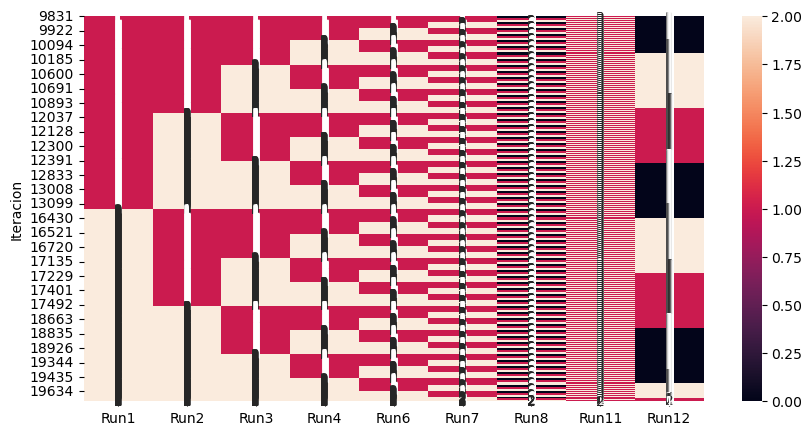

In [33]:
plt.figure(figsize = (10,5))
sns.heatmap(combinaciones.loc[best_iter_w.index],annot=True)

In [ ]:
best_deciles = 0.4
for itter in results.columns:
    res = results[itter]
    # Obtener el número total de elementos
    total_count = res.shape[0]
    # Seleccionar el 40% superior
    selected = res.nlargest(int(total_count * best_deciles)).index
    # Calcular el producto punto directamente
    epochs.loc[itter, 'Iteracion'] = y_true['y'][selected].sum()

In [18]:
epochs

,Iteracion
0,13138.0
1,13138.0
2,13138.0
3,13138.0
4,13138.0
...,...
11434,NaN
11435,NaN
11436,NaN
11437,NaN


In [11]:
info_save2.keys()

dict_keys(['modelo_produccion', 0, 1, 2, 3, 5, 6, 7, 10, 11])

In [12]:
info_save2[0].keys()

dict_keys(['Muestreo_tipo', 'X_train', 'y_train', 'Scaler', 'name_model', 'model_name', 'best_model', 'grid_search'])

In [13]:
info_save2["modelo_produccion"].keys()

dict_keys(['nodos_select', 'X_train', 'X_test', 'y_train', 'y_test', 'type'])

### SHAP VALUES

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

In [15]:
from sklearn.metrics import f1_score,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics._classification import _prf_divide,_nanaverage,multilabel_confusion_matrix
from sklearn.metrics._classification import _check_zero_division,_check_set_wise_labels

In [9]:
info_save2 = ms.generate_modelo_produccion(info_save,params);

[09/30/24 18:50:50] INFO     Modelo optimo segun la estrategia: ['best_model_name']                    ]8;id=263040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=486643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#368\368]8;;\

                    INFO     Llave del modelo: Run1,MLP_0                                              ]8;id=260357;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=729314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#377\377]8;;\

                    INFO     Modelo Identificado....                                                   ]8;id=235223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=109695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#380\380]8;;\

                    INFO     Nodo: 0. Llave Run1,MLP_0                                                 ]8;id=869828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774720;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#381\381]8;;\

                    INFO     Seleccionamos el modelo proveniente de models...                          ]8;id=458413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=164707;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#415\415]8;;\

[09/30/24 18:52:31] INFO     Iniciando el calculo de las metricas...                                   ]8;id=844166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=71826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#588\588]8;;\

                    INFO     Models: best_model_name                                                   ]8;id=455530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=62771;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#607\607]8;;\

                    INFO     Estrategy: best_model_name                                                ]8;id=822883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=772811;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#613\613]8;;\

[09/30/24 18:52:33] INFO     TOP N: 79795                                                              ]8;id=557359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=989673;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

[09/30/24 18:52:35] INFO     TOP N: 19948                                                              ]8;id=345991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=900262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                  
1          f1-score n_top test          28.3822       Run1      MLP_0   
           true_sum n_top test             3299       Run1      MLP_0   
           backtest       test           16.538       Run1      MLP_0   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

                    INFO     Models: best_unbiased_model                                               ]8;id=86649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=18405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#607\607]8;;\

                    INFO     Estrategy: best_unbiased_model                                            ]8;id=166872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=758043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#613\613]8;;\

[09/30/24 18:52:37] INFO     TOP N: 79795                                                              ]8;id=342726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=355597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

[09/30/24 18:52:39] INFO     TOP N: 19948                                                              ]8;id=344613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=2043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                  
1          f1-score n_top test          28.3822       Run1      MLP_0   
           true_sum n_top test             3299       Run1      MLP_0   
           backtest       test           16.538       Run1      MLP_0   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

                    INFO     Models: best_fitting_model                                                ]8;id=484628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=39675;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#607\607]8;;\

                    INFO     Estrategy: best_fitting_model                                             ]8;id=628694;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=11505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#613\613]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    3.1s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    7.9s
[Parallel(n_jobs=32)]: Done 450 out of 450 | elapsed:    9.0s finished


[09/30/24 18:52:48] INFO     TOP N: 79795                                                              ]8;id=594526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=64581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 450 out of 450 | elapsed:    2.0s finished


[09/30/24 18:52:51] INFO     TOP N: 19948                                                              ]8;id=949966;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=203716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

value name_model       model_name  \
class_name metric_name    dataset_name                                        
1          f1-score n_top test          26.7651       Run5  random_forest_4   
           true_sum n_top test             3082       Run5  random_forest_4   
           backtest       test          15.4502       Run5  random_forest_4   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[09/30/24 18:52:52] INFO     Estrategy: modelo_produccion                                              ]8;id=124061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=20156;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#613\613]8;;\

[09/30/24 18:52:54] INFO     TOP N: 79795                                                              ]8;id=763033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=239100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

[09/30/24 18:52:56] INFO     TOP N: 19948                                                              ]8;id=518550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=906341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#623\623]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                  
1          f1-score n_top test          28.3822       Run1      MLP_0   
           true_sum n_top test             3299       Run1      MLP_0   
           backtest       test           16.538       Run1      MLP_0   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

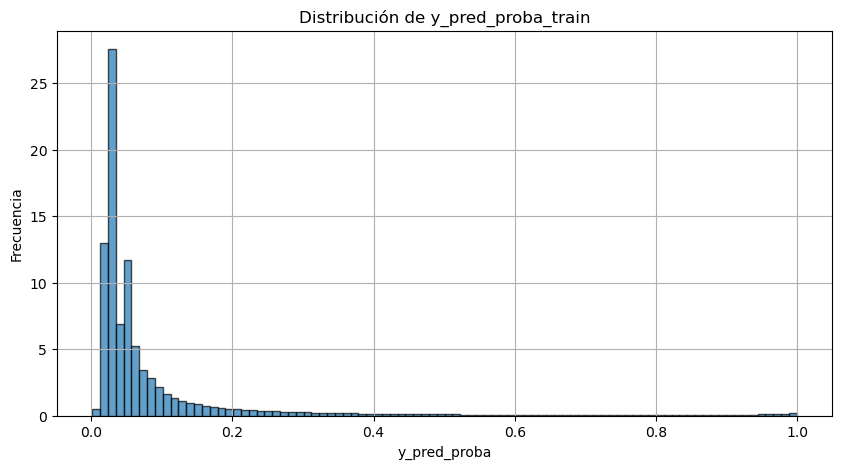

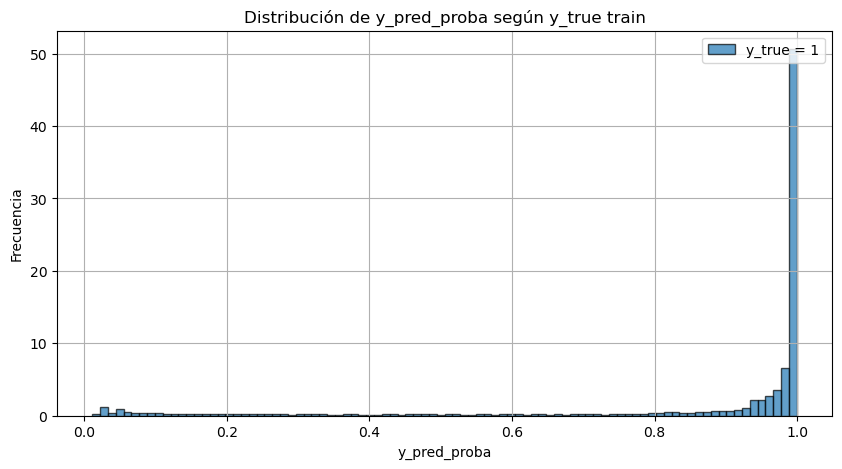

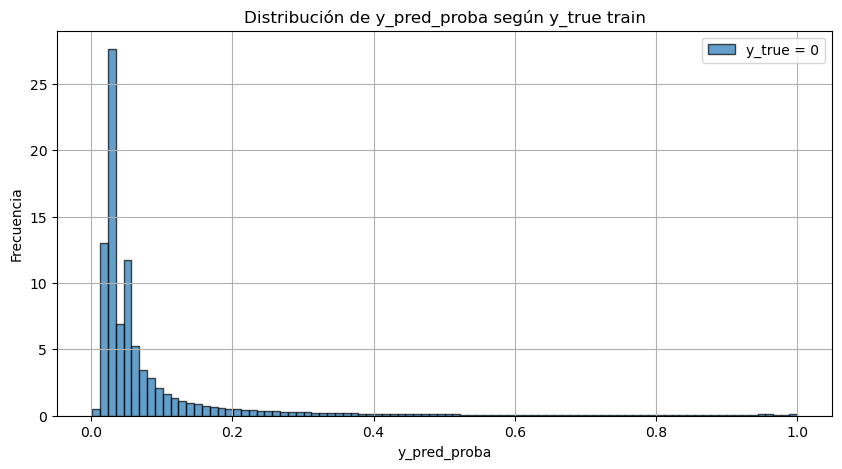

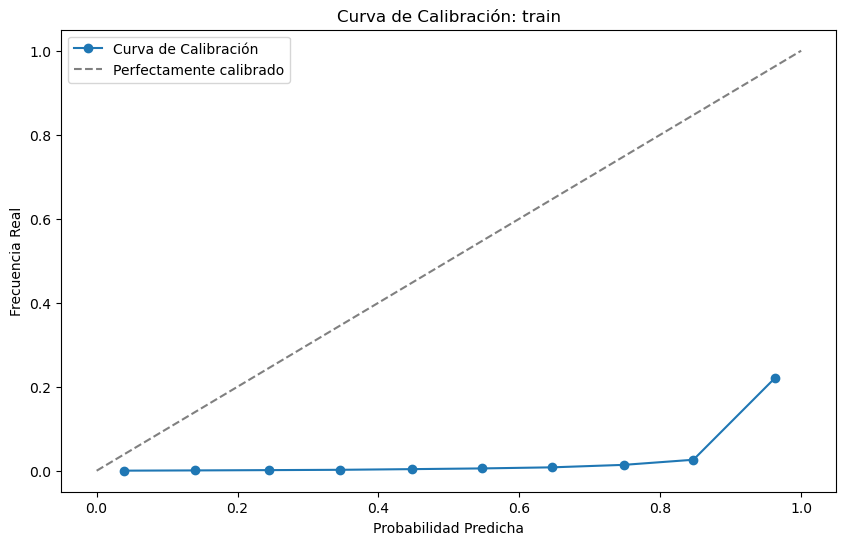

[09/30/24 18:53:04] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=835503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=21787;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#461\461]8;;\

                    INFO     Agrupando datos por decil de apertura para calcular estadísticas          ]8;id=907776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=375406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#465\465]8;;\
                             básicas...                                                                            

                    INFO     Calculando el total de aperturas reales por decil...                      ]8;id=542983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=561412;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#472\472]8;;\

                    INFO     Calculando el total de aperturas predichas por decil...                   ]8;id=636287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=334390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#477\477]8;;\

                    INFO     Fusionando las estadísticas de aperturas reales con las estadísticas      ]8;id=188821;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=934843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#480\480]8;;\
                             generales por decil...                                                                

                    INFO     Calculando la tasa de aperturas por decil...                              ]8;id=716103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=70977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#484\484]8;;\

                    INFO     Ordenando los datos por decil en orden descendente...                     ]8;id=613314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=796227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#487\487]8;;\

                    INFO     Calculando la distribución acumulada de aperturas observadas...           ]8;id=56109;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=1391;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#491\491]8;;\

                    INFO     Calculando la distribución acumulada de probabilidades esperadas...       ]8;id=949448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=312506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#495\495]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=561320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=63988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#499\499]8;;\

                    INFO     Restableciendo el índice del DataFrame...                                 ]8;id=745569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=27184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#502\502]8;;\

                    INFO     Calculando el total de aperturas reales por decil...                      ]8;id=428889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=847141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#505\505]8;;\

[09/30/24 18:53:05] INFO     Calculando el total de aperturas predichas por decil...                   ]8;id=730635;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=312261;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#510\510]8;;\

                    INFO     Fusionando las estadísticas de aperturas reales con las estadísticas      ]8;id=958668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=914065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#513\513]8;;\
                             generales por decil...                                                                

                    INFO     Reordenando las columnas del DataFrame...                                 ]8;id=930504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=824541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#520\520]8;;\

                    INFO     Deciles donde el ks aumenta:  [89, 88, 87]                                ]8;id=653888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=501269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#525\525]8;;\

'ks_train'

,prob_min,prob_max,tasa_aperturas
0,85.52,99.93,18.78


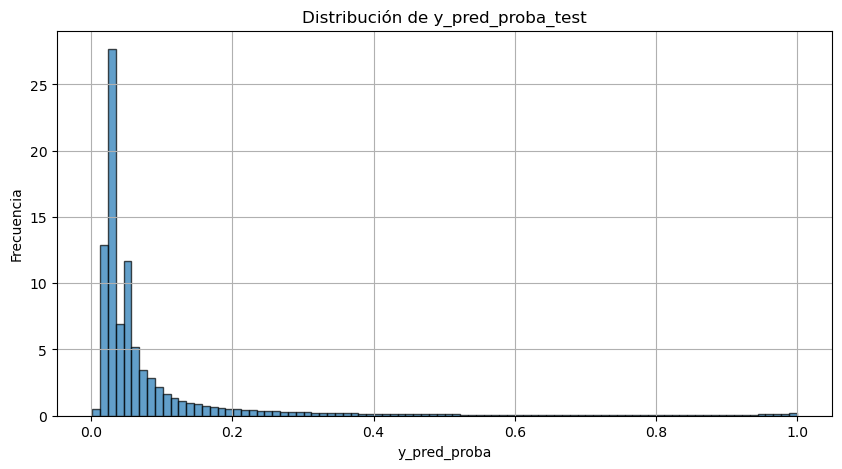

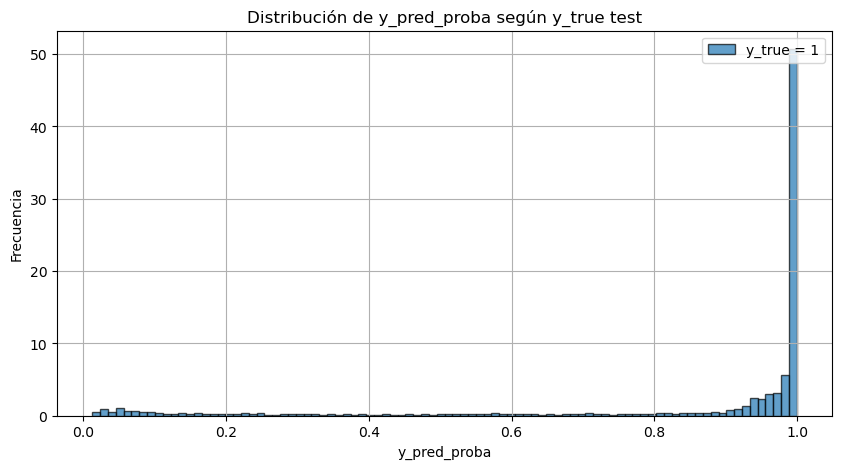

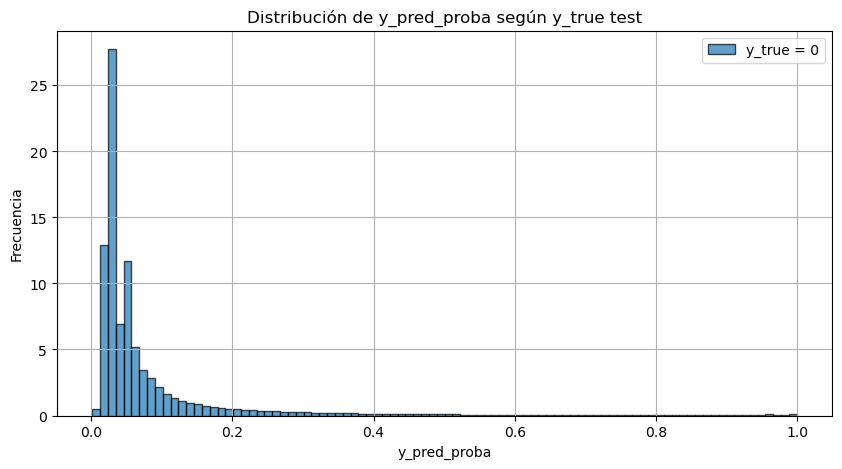

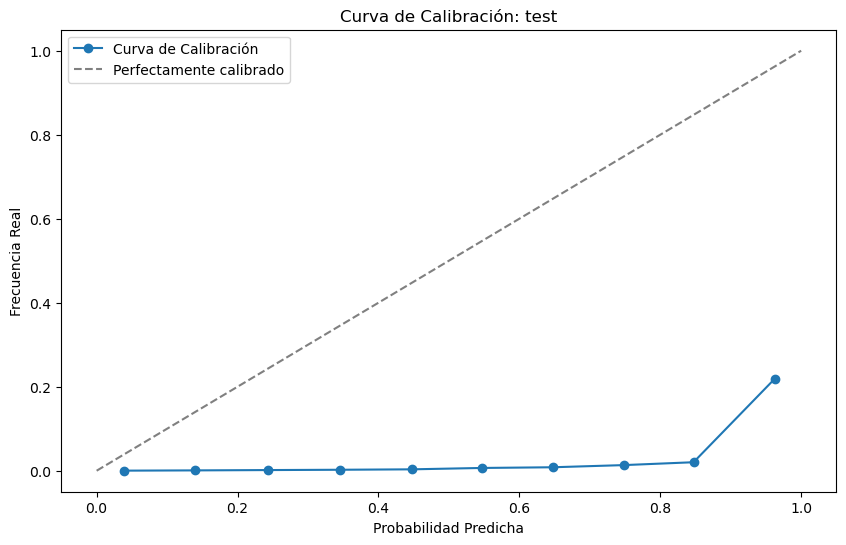

[09/30/24 18:53:07] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=83441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=967375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#461\461]8;;\

                    INFO     Agrupando datos por decil de apertura para calcular estadísticas          ]8;id=50349;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=861298;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#465\465]8;;\
                             básicas...                                                                            

                    INFO     Calculando el total de aperturas reales por decil...                      ]8;id=621333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=700283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#472\472]8;;\

                    INFO     Calculando el total de aperturas predichas por decil...                   ]8;id=347886;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=316305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#477\477]8;;\

                    INFO     Fusionando las estadísticas de aperturas reales con las estadísticas      ]8;id=689463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=186512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#480\480]8;;\
                             generales por decil...                                                                

                    INFO     Calculando la tasa de aperturas por decil...                              ]8;id=335719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=199043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#484\484]8;;\

                    INFO     Ordenando los datos por decil en orden descendente...                     ]8;id=51843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=842260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#487\487]8;;\

                    INFO     Calculando la distribución acumulada de aperturas observadas...           ]8;id=335902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=154593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#491\491]8;;\

                    INFO     Calculando la distribución acumulada de probabilidades esperadas...       ]8;id=238399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=539857;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#495\495]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=60205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=101100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#499\499]8;;\

                    INFO     Restableciendo el índice del DataFrame...                                 ]8;id=220910;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=814861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#502\502]8;;\

                    INFO     Calculando el total de aperturas reales por decil...                      ]8;id=750472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=134945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#505\505]8;;\

                    INFO     Calculando el total de aperturas predichas por decil...                   ]8;id=386991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=66471;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#510\510]8;;\

                    INFO     Fusionando las estadísticas de aperturas reales con las estadísticas      ]8;id=451582;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=109276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#513\513]8;;\
                             generales por decil...                                                                

                    INFO     Reordenando las columnas del DataFrame...                                 ]8;id=735294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=8012;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#520\520]8;;\

                    INFO     Deciles donde el ks aumenta:  [89, 88, 87]                                ]8;id=532579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=323329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#525\525]8;;\

'ks_test'

,prob_min,prob_max,tasa_aperturas
0,85.59,99.93,18.59
1,61.87,85.59,1.26
2,47.90,61.87,0.63
3,38.63,47.90,0.29


In [11]:
info_save_select = ms.calc_metrics_before_backtesting(info_save,info_save2,params)

In [25]:
info_save_select.keys()

dict_keys(['modelo_produccion', 'select_model2', 'all_results_select_model'])

In [9]:
info_save_select['modelo_produccion']


{
    'Muestreo_tipo': {
        'Type': 'Undersampling-Oversampling',
        'sampling_strategy1': 0.45,
        'sampling_strategy2': 0.6,
        'Use_auto': False
    },
    'X_train':           lib_cant  ah_sum_monto_trx_debito_std_3  \
20577615 -0.365360                       0.349629   
8879494  -0.365360                      -0.046434   
3177563  -0.365360                       0.495706   
18141463 -0.365360                       0.122057   
10756167 -0.365360                      -0.227665   
...            ...                            ...   
9049276   2.691698                      -0.227665   
17199317 -0.365360                       0.420792   
20274848 -0.365360                      -0.227665   
10209407  2.691698                      -0.227665   
6852563  -0.365360                      -0.211438   

          ah_sum_monto_trx_debito_std_6  lib_cant_prev  \
20577615                       0.180489      -0.364480   
8879494                       -0.061217      -0.364480  

In [10]:
info_save_select['modelo_produccion']['X_train']

,lib_cant,ah_sum_monto_trx_debito_std_3,ah_sum_monto_trx_debito_std_6,lib_cant_prev,ah_sum_monto_trx_credito_std_3,num_prod_activos,delta_ah_sum_monto_trx_credito,antiguedad_meses,estrato,ah_cant_prev,...,lib_saldo_corte,lib_sum_cuota_pactada,veh_cant,otras_ord_cant_prev,ah_sum_monto_trx_debito_mean_3,ah_sum_monto_trx_credito_std_6,ah_sum_monto_trx_credito_mean_2,num_activos_prev,edad_anios,lib_saldo_promedio
20577615,-0.365360,0.349629,0.180489,-0.364480,0.242607,1.242395,0.037800,0.589726,0.176156,-0.644358,...,-0.276495,-0.180742,-0.126405,-0.911650,0.826261,0.220442,0.781508,-0.632746,0.908308,-0.276163
8879494,-0.365360,-0.046434,-0.061217,-0.364480,-0.056393,1.242395,-0.018031,-1.161936,-1.191150,-0.644358,...,-0.276495,-0.180742,-0.126405,-0.911650,-0.251078,-0.067123,-0.228890,-0.632746,-1.530254,-0.276163
3177563,-0.365360,0.495706,0.357208,-0.364480,0.401702,-0.628025,-0.842133,1.094479,0.176156,1.393462,...,-0.276495,-0.180742,-0.126405,-0.911650,0.420351,0.276714,-0.080519,1.237011,0.176739,-0.276163
18141463,-0.365360,0.122057,0.216809,-0.364480,0.027588,-0.628025,0.292185,-0.468464,0.859809,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,1.126038,0.018217,1.086336,-0.632746,-0.879971,-0.276163
10756167,-0.365360,-0.227665,-0.241641,-0.364480,-0.208899,-0.628025,-0.018031,-1.067230,-1.191150,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,-0.473544,-0.276163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049276,2.691698,-0.227665,-0.241641,2.699342,-0.208899,-0.628025,-0.018031,2.096354,0.176156,-0.644358,...,2.151210,0.886791,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,2.290159,2.164487
17199317,-0.365360,0.420792,0.252245,-0.364480,0.119271,-0.628025,0.397773,-0.096577,-0.507497,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,0.142582,0.034244,0.423559,-0.632746,-0.798685,-0.276163
20274848,-0.365360,-0.227665,-0.241641,-0.364480,-0.208899,-0.628025,-0.018031,-0.198453,0.859809,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,-0.636115,-0.276163
10209407,2.691698,-0.227665,-0.241641,2.699342,-0.208899,-0.628025,-0.018031,1.576452,1.543462,-0.644358,...,2.244751,3.014826,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,0.339310,2.264782


In [11]:
info_save_select['modelo_produccion']['y_train']

,lib_target_ap_group3
20577615,0
8879494,0
3177563,0
18141463,0
10756167,0
...,...
9049276,0
17199317,0
20274848,0
10209407,0


In [ ]:
shap=calcular_shap_values(info_save_select)

El modelo es un XGBoost o RandomForest. Utilizando TreeExplainer.


In [15]:
from sklearn.inspection import permutation_importance
from io import BytesIO

def calcular_importancia(info_save_select):
    """
    Función para calcular la importancia de características por permutación
    y retornar la imagen del gráfico como un objeto BytesIO.
    
    Parámetros:
    -----------
    info_save_select: dict
        Diccionario que contiene la información del modelo, los datos de entrenamiento, 
        y otros datos relevantes. Debe incluir las claves 'X_train', 'y_train' y 'best_model'.
    
    Retorna:
    --------
    img_bytes: BytesIO
        Objeto BytesIO que contiene la imagen del gráfico.
    """
    
    # Extraer X_train, y_train y el modelo desde el diccionario info_save_select
    X_train = info_save_select['modelo_produccion']['X_train']
    y_train = info_save_select['modelo_produccion']['y_train']
    best_model = info_save_select['modelo_produccion']['best_model']
    
    # Calcular la importancia de las características por permutación
    result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)

    # Extraer las importancias
    feature_importances = result.importances_mean

    # Extraer los nombres de las características desde X_train
    feature_names = X_train.columns

    # Crear un DataFrame con las importancias
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # Ordenar por importancia
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Crear la imagen del gráfico en memoria
    img_bytes = BytesIO()
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.title('Importancia de las 10 principales características - Permutation Importance')
    plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
    
    # Guardar la imagen en el objeto BytesIO
    plt.savefig(img_bytes, format='png')
    plt.close()  # Cerrar la figura para liberar memoria
    img_bytes.seek(0)  # Mover el puntero del objeto BytesIO al inicio
    
    return img_bytes

In [10]:
# Extraer X_train y y_train desde el diccionario info_save_select
X_train = info_save_select['modelo_produccion']['X_train']
y_train = info_save_select['modelo_produccion']['y_train']

# Extraer el modelo desde el diccionario
best_model = info_save_select['modelo_produccion']['best_model']

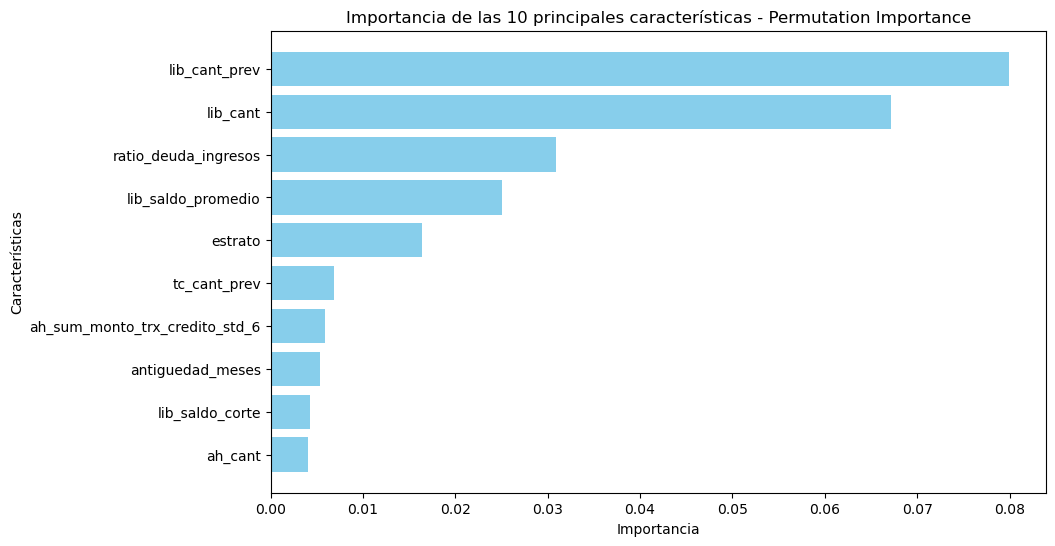

In [14]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extraer X_train y y_train desde el diccionario info_save_select
X_train = info_save_select['modelo_produccion']['X_train']
y_train = info_save_select['modelo_produccion']['y_train']
# Extraer el modelo desde el diccionario
best_model = info_save_select['modelo_produccion']['best_model']

# y_train_pred = best_model.predict(X_train)
# Calcular la importancia de las características por permutación
result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)

# Extraer las importancias
feature_importances = result.importances_mean

# Supongamos que scal_marzo es un DataFrame y contiene los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las 10 principales características - Permutation Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()


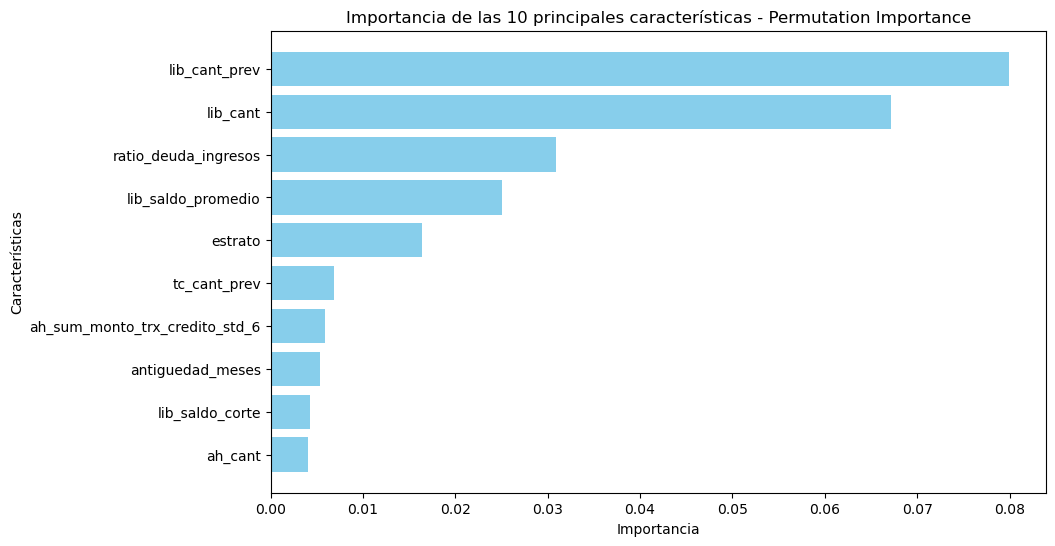

In [13]:
# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las 10 principales características - Permutation Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()

In [15]:
import shap
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

def calcular_shap_values(info_save_select):
    """
    Función para calcular los SHAP values de un modelo basado en el tipo de modelo.
    
    Parámetros:
    -----------
    info_save_select: dict
        Diccionario que contiene la información del modelo, los datos de entrenamiento, y otros datos relevantes.
        Debe tener las claves 'modelo_produccion' -> 'best_model', 'x_train' y 'y_train'.
    
    **params: dict
        Parámetros adicionales opcionales.
        
    Retorna:
    --------
    shap_values: array
        Los valores SHAP calculados.
    """
    
    # Extraer X_train y y_train desde el diccionario info_save_select
    X_train = info_save_select['modelo_produccion']['X_train']
    y_train = info_save_select['modelo_produccion']['y_train']
    
    # Extraer el modelo desde el diccionario
    best_model = info_save_select['modelo_produccion']['best_model']
    
    # Inicialización de variables
    explainer = None
    shap_values = None
    
    # Verificar si el modelo es una red neuronal MLP
    if isinstance(best_model, MLPClassifier):
        print("El modelo es un MLP. Utilizando Kernel SHAP o Deep SHAP.")
        
        # Para redes neuronales, usamos KernelExplainer (más genérico)
        explainer = shap.KernelExplainer(best_model.predict_proba, X_train)
        shap_values = explainer.shap_values(X_train)
    
    # Verificar si el modelo es XGBoost o RandomForest
    elif isinstance(best_model, xgboost.XGBClassifier) or isinstance(best_model, RandomForestClassifier):
        print("El modelo es un XGBoost o RandomForest. Utilizando TreeExplainer.")
        
        # Para modelos basados en árboles, TreeExplainer es la opción más eficiente
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_train)
    
    else:
        raise ValueError("El modelo no es compatible con el cálculo de SHAP values.")

    # Retornar los valores SHAP calculados
    return shap_values


In [21]:
info_save_select = ms.calc_metrics_before_backtesting(info_save,info_save2,params)

[09/25/24 00:11:34] INFO     Iniciando el calculo de las metricas...                                   ]8;id=614220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=30382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#562\562]8;;\

                    INFO     Models: best_model_name                                                   ]8;id=913901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=255639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_model_name                                                ]8;id=794976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=65847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[09/25/24 00:11:45] INFO     Models: best_unbiased_model                                               ]8;id=611746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=531269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_unbiased_model                                            ]8;id=238420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=638984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.5542       Run1      MLP_0   
           true_sum n_top test            3670       Run1      MLP_0   
           backtest       test          2.3302       Run1      MLP_0   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[09/25/24 00:11:50] INFO     Models: best_fitting_model                                                ]8;id=394417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=935040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_fitting_model                                             ]8;id=543060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=236815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test           4.513       Run9  random_forest_8   
           true_sum n_top test            3636       Run9  random_forest_8   
           backtest       test          2.3086       Run9  random_forest_8   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[09/25/24 00:11:55] INFO     Estrategy: modelo_produccion                                              ]8;id=359431;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=660996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

In [22]:
from typing import Dict, Any, Tuple

import pandas as pd
import numpy as np
from IPython.display import display
import logging
import gc
import traceback

# algoritmos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# optimizador
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold

# optimizador
from bayes_opt import BayesianOptimization

# metricas
from sklearn.metrics import f1_score,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics._classification import _prf_divide,_nanaverage,multilabel_confusion_matrix
from sklearn.metrics._classification import _check_zero_division,_check_set_wise_labels




logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# funcion auxiliar para extraer datos por si se requiere fitear:
def extract_data(info_save_temp):
    X_balance = info_save_temp["modelo_produccion"]["X_balance"]
    y_balance = info_save_temp["modelo_produccion"]["y_balance"]
    X_i2 = info_save_temp["modelo_produccion"]["X_train"]
    y_i2 = info_save_temp["modelo_produccion"]["y_train"]

    # Convertir X_train y y_train a arrays de NumPy
    X_train = X_balance.values
    y_train = y_balance.values.ravel()
    
    # Convertir X_train y y_train sin balancear a arrays de NumPy
    X_i = X_i2.values
    y_i = y_i2.values.ravel()
    return X_train,y_train,X_i,y_i

### Aux: optimizaciones con cambio de metricas

# xgboots

def optimize_train_xgboost(info_save_prod, nombre,scorer,params):
    """
    Train an XGBoost classifier using cross-validation and grid search with early stopping.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.

        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """
    logger.info(f"INICIANDO LA OPT. BAYESEIANA CON AJUSTE SOBRE EL MEJOR MODELO: XGBOOTS ...")    
        
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    seed = params["random_state"]
    # Extract cv_params from the params dictionary
    #cv_params = params[nombre]['cv_params']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    #param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    #param_grid = {key: [value] for key, value in param_grid.items()}
    # logger.info(cv_params)
    # logger.info(param_grid)
    
    # Initialize the XGBClassifier with early stopping rounds
    # model = XGBClassifier(
    #     use_label_encoder=False,
    #     eval_metric='logloss',
    #     n_jobs = cv_params['n_jobs'],
    #     random_state = seed,
    #     early_stopping_rounds=cv_params.get('early_stopping_rounds', 10)
    # )

    # Implement stratified k-fold cross-validation
    # skf = StratifiedKFold(n_splits=cv_params['n_splits'], shuffle=True, random_state=seed)
    # grid_search = GridSearchCV(
    #     model, param_grid,
    #     cv=skf,
    #     scoring=scorer,
    #     n_jobs=cv_params['n_jobs']
    # )
    
    # # Fit the model
    # if params["Iterar_con_balance"] == True:
    #     grid_search.fit(X_train, y_train, eval_set=[(X_i, y_i)], verbose=False)
    # else:
    #     grid_search.fit(X_i, y_i, eval_set=[(X_i, y_i)], verbose=False)
    # best_model = grid_search.best_estimator_
    # extrayendo los datos
    X_train,y_train,X_i,y_i = extract_data(info_save_prod) # Entrenamiento: balanceo, sin balanceo

    exploration_space = params["xgboost_classifier"]["exploration_space"]
    n_iter = params["xgboost_classifier"]["number_of_iterations"]
    init_points = params["xgboost_classifier"]["init_points"]
    cv_config = params["cv_config"]

    # evaluador de metricas
    def xgboost_evaluate(max_depth, n_estimators, learning_rate, min_child_weight, subsample, colsample_bytree, gamma):
        model = XGBClassifier(
            max_depth=int(max_depth),
            n_estimators=int(n_estimators),
            learning_rate=learning_rate,
            min_child_weight=int(min_child_weight),
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            random_state=seed
        )
    
        cv = RepeatedStratifiedKFold(**cv_config)
        scores = cross_val_score(model, X_train,y_train, cv=cv, scoring=scorer)
        # notese que es la data balanceada
        return np.mean(scores)
    
    optimizer = BayesianOptimization(
        f=xgboost_evaluate, pbounds=exploration_space, random_state=seed, verbose=2)
    
    optimizer.maximize(n_iter=n_iter, init_points=init_points)
    best_params = optimizer.max["params"]
    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_params
    info_save_prod["modelo_produccion"]["grid_search"] = optimizer
    gc.collect()
    return info_save_prod

###random forest 
def train_random_forest_with_cv(info_save_prod, nombre,scorer,params):
    """
    Train a Random Forest classifier using cross-validation and randomized search with Kedro parameters.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.
        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """

    logger.info(f"INICIANDO AJUSTE DE ENTRENAMIENTO DEL MEJOR MODELO SOBRE RANDOM FOREST ...")    
    seed = params["random_state"]
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    # Extract cv_params from the params dictionary
    cv_params = params[nombre]['cv_params']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    param_grid = {key: [value] for key, value in param_grid.items()}

    # extrayendo los datos
    X_train,y_train,X_i,y_i = extract_data(info_save_prod) # entrenamiento: Balanceo y sin balanceo

    logger.info(cv_params)
    logger.info(param_grid)
    
    # Initialize the RandomForestClassifier
    model = RandomForestClassifier(random_state=seed, n_jobs = cv_params['n_jobs'], verbose = 1)

    # Implement stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=cv_params['n_splits'], shuffle=True, random_state=seed)

    random_search = RandomizedSearchCV(
        model, 
        param_grid,
        n_iter=cv_params.get('n_iter', 100),
        cv=skf,
        scoring=scorer,
        n_jobs=cv_params['n_jobs'])

    if params["Iterar_con_balance"] == True:
        grid_search.fit(X_train,y_train)
    else:
        grid_search.fit(X_i,y_i)
        
    best_model = grid_search.best_estimator_

    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_model
    info_save_prod["modelo_produccion"]["grid_search"] = random_search

    gc.collect()
    return info_save_prod
###red neuronal
def red_neuronal(info_save_prod, nombre,scorer,params):

    """
    Train a MLP classifier using cross-validation and randomized search with Kedro parameters.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.
        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """
    logger.info(f"INICIANDO AJUSTE DE ENTRENAMIENTO DEL MEJOR MODELO SOBRE MLP CLASSIFIER ...")    
    seed = params["random_state"]
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    # Extract cv_params from the params dictionary
    cv_params = params[nombre]['cv_params']
    max_iter = params[nombre]['max_iter']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    param_grid = {key: [value] for key, value in param_grid.items()}

    # extrayendo los datos (balanceados, sin balancear
    X_train,y_train,X_i,y_i = extract_data(info_save_prod)

    logger.info(cv_params)
    logger.info(param_grid)
    
    # Initialize the MLP
    model = MLPClassifier(max_iter=max_iter,random_state = seed)


    # Implement stratified k-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=cv_params["n_splits"], 
                           n_jobs=cv_params["n_jobs"], 
                           verbose=1,
                          scoring = scorer)

    if params["Iterar_con_balance"] == True:
        grid_search.fit(X_train,y_train)
    else:
        grid_search.fit(X_i,y_i)

    best_model = grid_search.best_estimator_

    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_model
    info_save_prod["modelo_produccion"]["grid_search"] = grid_search

    gc.collect()
    return info_save_prod

# 0.0 Funcion auxiliar  para hacer optimizacion bayesiana...

# 0.1 Funcion auxiliar para generar la data para hacer ensambles
def procesamiento_data_ensamble(info_save,params):
    combine_models_select = [i.upper() for i in params["Ensamble"]["Algoritmos"]]
    # orden de las columnas
    nodos_select = [] 
    inputs_ensamble_train = pd.DataFrame()
    inputs_ensamble_test = pd.DataFrame()
    output_ensamble_train = pd.DataFrame()
    output_ensamble_test = pd.DataFrame()
    for nodo in range(info_save["nodo_run"]):
        # buscando los nombres de los nodos como los defini en el catalogo
        if info_save[nodo]['name_model'].upper() in combine_models_select: 
            nodos_select.append(nodo)
            # inputs del modelo en el nodo
            X_train = info_save[nodo]['X_train'].values
            X_test = info_save[nodo]['X_test'].values
            # output deseado de cada nodo
            y_train = info_save[nodo]['y_train'].values
            y_test = info_save[nodo]['y_test'].values
            # inputs del ensamble
            #y_hat_train = info_save[nodo]['best_model'].predict(X_train)
            y_hat_train_probs = info_save[nodo]['best_model'].predict_proba(X_train)[:,1]
            y_hat_train_probs = pd.DataFrame(y_hat_train_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_train = pd.concat([inputs_ensamble_train,y_hat_train_probs],axis = 1)

            #y_hat_test = info_save[nodo]['best_model'].predict(X_test)
            y_hat_test_probs = info_save[nodo]['best_model'].predict_proba(X_test)[:,1]
            y_hat_test_probs = pd.DataFrame(y_hat_test_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_test = pd.concat([inputs_ensamble_test,y_hat_train_probs],axis = 1)

            # output
            output_ensamble_train = pd.concat([output_ensamble_train,y_train], axis = 1)
            output_ensamble_test = pd.concat([output_ensamble_test,y_test], axis = 1)
    info_save['modelo_produccion']["nodos_select"] = nodos_select
    info_save['modelo_produccion']["X_train"] = inputs_ensamble_train
    info_save['modelo_produccion']["X_test"] = inputs_ensamble_test
    # TRAINING
    Y_TRAIN = output_ensamble_train.T.drop_duplicates().T
    Y_TEST = output_ensamble_train.T.drop_duplicates().T
    if (Y_TRAIN.shape[1] == 1) & (Y_TEST.shape[1] == 1):
        if (Y_TRAIN.isnull().sum().iloc[0]+Y_TEST.isnull().sum().iloc[0]) == 0:
            info_save['modelo_produccion']["y_train"] = Y_TRAIN
            info_save['modelo_produccion']["y_test"] = Y_TEST
        else:
            raise ValueError("En el ensamble no se logro concatenar los pronosticos Nulos >0.")
    else:
        raise ValueError("En el ensamble no se logro concatenar los pronosticos.")
    return info_save
# 0.1.1 Funcion auxiliar para entrenar un ensamble

########### 1. Nodo inicial ejecucion del modelo seleccionado o superoptimizacion
def generate_modelo_produccion(info_save,params):
    combine_models = params["Ensamble"]["want"]
    info_save2 = {}
    if combine_models == True:
        logger.info("Iniciando el Ensamblado de modelos...")
        # creadno las variables entrada y salida
        info_save2['modelo_produccion'] = {'nodos_select':None,'X_train':None,'X_test':None}

        info_save2['modelo_produccion']['y_train'] = None
        info_save2['modelo_produccion']['y_test'] = None
        info_save2['modelo_produccion']['type'] = "Ensamble"
        ## actualizo info_save
        info_save2 = procesamiento_data_ensamble(info_save,params)
        # entrenando el modelo
        pass
    else: 
        hiperoptimizacion = params['optimizacion_bayesiana']['want']
        if params['use_key']['want'] == False:
            key_model = params['use_key']['estrategia']
            logger.info(f"Modelo optimo segun la estrategia: {key_model}")
            # identificar el modelo que se selecciono
            llave = info_save['select_model'].loc["model_name",key_model].iloc[0]
            nodo_best = int(llave.split(",")[1].split("_")[-1])
        else:
            llave = params['use_key']['llave'][0]
            logger.info(f"Modelo optimo sin estrategia.")
            nodo_best = int(llave.split(",")[1].split("_")[-1])
        # proceso 
        logger.info(f"Llave del modelo: {llave}")

        if llave == info_save[nodo_best]['name_model']+","+info_save[nodo_best]['model_name']:
            logger.info("Modelo Identificado....")
            logger.info(f"Nodo: {nodo_best}. Llave {llave}")
            
            if hiperoptimizacion == True:
                logger.info("Iniciando la Optimizacion Bayesiana...")
                # optimizar modelo
                info_save2['modelo_produccion'] = info_save[nodo_best]
                info_save2['modelo_produccion']['type'] = "Opt_Bayesiana_adj"
                info_save2['modelo_produccion']["nodos_select"] = nodo_best # No es lista
                # nombre en el catalogo models
                iden_name = "_".join(info_save2['modelo_produccion']['model_name'].split("_")[:-1])
                logger.info(f"Algoritmo: {iden_name}")
                # funcion objetivo
                objetivo_metodo = params['optimizacion_bayesiana']['scorer']
                if  objetivo_metodo== 'backtest_scorer':
                    logger.info(f"Funcion Objetivo: 'backtesting_top_probabilities'")
                    obj_func = make_scorer(backtesting_top_probabilities,greater_is_better=True,needs_proba=True)
                elif objetivo_metodo== 'f1_n_top':
                    logger.info(f"Funcion Objetivo: 'custom_f1_score'")
                    obj_func = make_scorer(custom_f1_score, greater_is_better=True,needs_proba=True)
                else:
                    obj_func = params[iden_name]['cv_params']['scoring']
                    logger.info(f"Funcion Objetivo de los parametros de models:{obj_func}")

                # identificando modelo
                if iden_name == "random_forest":
                    info_save2 = train_random_forest_with_cv(info_save2,iden_name,obj_func,params)#falta
                elif iden_name == "xgboost":
                    info_save2 = optimize_train_xgboost(info_save2,iden_name,obj_func,params)
                elif iden_name == "MLP":
                    info_save2 = red_neuronal(info_save2, iden_name,obj_func,params) # falta
                else:
                    raise ValueError("No identifica la llave...")

            else:
                logger.info("Seleccionamos el modelo proveniente de models...")
                # quedarse con el modelo correcto y parametrizado en el otro artefacto nuevo
                info_save2['modelo_produccion']  = info_save[nodo_best]
                info_save2['modelo_produccion']['type'] = "Models"
                info_save2['modelo_produccion']["nodos_select"] = nodo_best # No es lista
    gc.collect()
    return info_save2

############### Nodo 2: Generar metricas de desempeño de datos similares a los vistos en backtesting

# 2.1 funciones auxiliares para generar dichas metricas

# funcion auxiliar para filtrar los mas probables
def want_res(y_probs, n_top):
    # Obtener las observaciones con las mayores probabilidades combinadas
    # ordenar de menor a mayor
    top_indices = np.argsort(y_probs)
    # quedarme con los de maxima probabilidad
    top_indices = top_indices[-n_top:]  
    return top_indices
    
# funcion auxiliar para calcular las metricas de sklear ajustadas por las mas probables y optimizar en el ensamble
def precision_recall_fscore_support_fabrica(
    y_true,
    y_probs,
    n_top,
    metric_calcs,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=("f-score"),#("precision", "recall", "f-score"),
    sample_weight=None,
    zero_division="warn",
):

    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, n_top)
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices]

    # Filtrar las predicicones seleccionadas
    y_call = np.array([1.0]*len(top_indices))
    #y_call = y_preds[top_indices]
    _check_zero_division(zero_division)
    labels = _check_set_wise_labels(y_top, y_call, average, labels, pos_label)
    
    # Calculate tp_sum, pred_sum, true_sum ###
    samplewise = average == "samples"
    MCM = multilabel_confusion_matrix(
        y_top,
        y_call,
        sample_weight=sample_weight,
        labels=labels,
        samplewise=samplewise,
    )
    #MCM[0,:,:] # MATRIZ DE CONFUSION PARA LABELS[0] --> RESULTADO [(TN,FP) , (FN, TP)]
    tp_sum = MCM[:, 1, 1]
    pred_sum = tp_sum + MCM[:, 0, 1]
    true_sum = tp_sum + MCM[:, 1, 0]

    if average == "micro":
        tp_sum = np.array([tp_sum.sum()])
        pred_sum = np.array([pred_sum.sum()])
        true_sum = np.array([true_sum.sum()])

    # Finally, we have all our sufficient statistics. Divide! #
    beta2 = beta**2
    # Divide, and on zero-division, set scores and/or warn according to
    # zero_division:
    precision = _prf_divide(
        tp_sum, pred_sum, "precision", "predicted", average, warn_for, zero_division
    )
    recall = _prf_divide(
        tp_sum, true_sum, "recall", "true", average, warn_for, zero_division
    )

    if np.isposinf(beta):
        f_score = recall
    elif beta == 0:
        f_score = precision
    else:
        # The score is defined as:
        # score = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
        # Therefore, we can express the score in terms of confusion matrix entries as:
        # score = (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)
        denom = beta2 * true_sum + pred_sum
        f_score = _prf_divide(
            (1 + beta2) * tp_sum,
            denom,
            "f-score",
            "true nor predicted",
            average,
            warn_for,
            zero_division,
        )

    # Average the results
    if average == "weighted":
        weights = true_sum
    elif average == "samples":
        weights = sample_weight
    else:
        weights = None

    if average is not None:
        assert average != "binary" or len(precision) == 1
        precision = _nanaverage(precision, weights=weights)
        recall = _nanaverage(recall, weights=weights)
        f_score = _nanaverage(f_score, weights=weights)
        true_sum = None  # return no support
    if metric_calcs == "precision":
        return precision
    elif metric_calcs == "recall":
        return recall
    elif metric_calcs == "f_score":
        return f_score
    elif metric_calcs == "true_sum":
        return true_sum
    else:
        return [precision, recall, f_score, true_sum]

### funciones auxiliar del ensamble para optimizar/validar metricas:
def custom_f1_score(y_true, y_probs,top_n = 40000, labels = [1] ,metric_calcs= "f_score"):
    
    array_value = precision_recall_fscore_support_fabrica(
                        y_true,
                        y_probs,
                        n_top = top_n,
                        labels = labels, #[0,1]
                        metric_calcs = metric_calcs #f_score,recall,precision
               ) 
    return array_value[0] # metrica unia deseada

def backtesting_top_probabilities(y_true,y_probs, top_n = 40000):
    def want_res(y_probs, n_top):
        # Obtener las observaciones con las mayores probabilidades combinadas
        # ordenar de menor a mayor
        top_indices = np.argsort(y_probs)
        # quedarme con los de maxima probabilidad
        top_indices = top_indices[-n_top:]  
        return top_indices
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, top_n)
    #top_indices_str = [str(int(index)) for index in top_indices]
    
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices] # tomo las etiquetas reales que seleccione de las predicciones
    #y_top = (y_top == 1).flatten() # dejo en True las TruePositive
    y_top = np.array(list((y_top == 1).flatten()))
    true_positive_indices = np.where(y_top)[0] # extraigo la posicion de los TruePositive

    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(true_positive_indices)
    # Step 3: Get the hashvalues in the top_n sorted df
    #top_hashvalues = set(top_indices)
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    #common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    #percentage_in_top = (len(common_hashvalues) / len(test_hashvalues))
    percentage_in_top = len(test_hashvalues)/np.min([top_n,y_top.shape[0]])
    return percentage_in_top

## Nodo 2: Calculo de las metricas de desempeño comparables al backtesting:

# def calc_metrics_before_backtesting(info_save,info_save2, params):
#     logger.info(f"Iniciando el calculo de las metricas...")
#     top_n = params['n_obs_filter']
#     metrics_backtest = pd.DataFrame()
#     for col in info_save["select_model"].columns.tolist()+["modelo_produccion"]:
#         if col == "modelo_produccion":
#             # debe buscar en el proyecto generado de select_model
#             nodo_col = info_save2[col]["nodos_select"]
#             if isinstance(nodo_col, (int, float)) and info_save2[col]['type'] == "Models":
#                 # es un modelo preseleccionado en modelos
#                 llave = info_save2[col]['name_model']+","+info_save2[col]['model_name']
#             elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Ensamble":
#                 pass
#             elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Opt_Bayesiana":
#                 pass
#             else:
#                 raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´´")
#             info_save_loop = info_save2['modelo_produccion'].copy()
#         else:
#             # debe buscar en el proyecto generado de models
#             logger.info(f"Models: {col}")
#             llave = info_save["select_model"].loc["model_name", col]
#             nodo_col = int(llave.split(",")[1].split("_")[-1])
#             info_save_loop = info_save[nodo_col].copy()

#         if llave == info_save_loop['name_model']+","+info_save_loop['model_name']:
#             logger.info(f"Estrategy: {col}")
#             for dataset_x,dataset_y in [["X_train","y_train"],["X_test","y_test"]]:
#                 probs=info_save_loop['best_model'].predict_proba(info_save_loop[dataset_x].values)
#                 probs = probs[:,1]
#                 y_true = info_save_loop[dataset_y].values
#                 backtest_metric = np.round(backtesting_top_probabilities(y_true,probs, top_n)*100,4)
#                 labels = [1,0]
#                 precision, recall, f_score, true_sum = precision_recall_fscore_support_fabrica(
#                                                       y_true,
#                                                       probs,
#                                                       n_top = top_n,
#                                                       labels = labels, #[0,1]
#                                                       metric_calcs =  'all'#f_score,recall,precision
#                                                            )
#                 index_name = ['Precision n_top','recall n_top','f1-score n_top','true_sum n_top']
#                 temp2 = pd.DataFrame(['backtest',backtest_metric,'1',dataset_y[2:]])
#                 temp2.index = ['metric_name','value','class_name','dataset_name']
#                 temp2 = temp2.T
#                 for t,index in enumerate([precision,recall,f_score,true_sum]):
#                     if t == 3:
#                         temp = pd.DataFrame(index, index = [index_name[t]]*len(labels), columns = ["value"])
#                     else:
#                         temp = pd.DataFrame(np.round(index*100,4), index = [index_name[t]]*len(labels), columns = ["value"])
#                     temp.index.name = 'metric_name'
#                     temp.reset_index(inplace = True)
#                     temp['class_name'] = labels
#                     temp["dataset_name"] = dataset_y[2:]
#                     temp2 = pd.concat([temp2,temp], axis = 0)
#                 temp2["name_model"] = info_save[nodo_col]['name_model']
#                 temp2["model_name"] = info_save[nodo_col]['model_name']
#                 temp2["select_model"] = col
#                 metrics_backtest = pd.concat([metrics_backtest,temp2], axis = 0)

#             metrics_backtest.sort_index(ascending=False, inplace = True)
#             check_df = temp2.set_index(['class_name','metric_name','dataset_name'])
#             printed = check_df[np.in1d(check_df.index.get_level_values(0), [1])]
#             printed2= printed[np.in1d(printed.index.get_level_values(1),['f1-score n_top','true_sum n_top'])]

#             printed1= check_df[np.in1d(check_df.index.get_level_values(1),['backtest'])]            
#             printed = pd.concat([printed2,printed1],axis = 0)
#             display(printed)
#         else:
#             raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´")
#     metrics_backtest.set_index(['class_name','metric_name','dataset_name'], inplace = True)
#     info_save2["select_model2"] = metrics_backtest
#     ### aqui va la imaagen de Serg:
#     # img =
#     if info_save2[col]['type'] == "Models":
#         del info_save2['modelo_produccion']['X_balance']
#         del info_save2['modelo_produccion']['y_balance']
#         del info_save2['modelo_produccion']['X_train']
#         del info_save2['modelo_produccion']['y_train']
#         del info_save2['modelo_produccion']['X_test']
#         del info_save2['modelo_produccion']['y_test']
#     llave = info_save2['modelo_produccion']['name_model']+","+info_save2['modelo_produccion']['model_name']
#     info_save2['all_results_select_model'] = info_save['all_results'][info_save['all_results']['model_name'] == llave]
#     return info_save2 #, img

# nodo de sergio
## def
### blac bla bla
## return imagen y retornar el info_save2

In [18]:
def want_res(y_probs, n_top):
    # Obtener las observaciones con las mayores probabilidades combinadas
    # ordenar de menor a mayor
    top_indices = np.argsort(y_probs)
    # quedarme con los de maxima probabilidad
    top_indices = top_indices[-n_top:]  
    return top_indices

In [16]:
def precision_recall_fscore_support_fabrica(
    y_true,
    y_probs,
    n_top,
    metric_calcs,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=("f-score"),#("precision", "recall", "f-score"),
    sample_weight=None,
    zero_division="warn",
):

    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, n_top)
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices]

    # Filtrar las predicicones seleccionadas
    y_call = np.array([1.0]*len(top_indices))
    #y_call = y_preds[top_indices]
    _check_zero_division(zero_division)
    labels = _check_set_wise_labels(y_top, y_call, average, labels, pos_label)
    
    # Calculate tp_sum, pred_sum, true_sum ###
    samplewise = average == "samples"
    MCM = multilabel_confusion_matrix(
        y_top,
        y_call,
        sample_weight=sample_weight,
        labels=labels,
        samplewise=samplewise,
    )
    #MCM[0,:,:] # MATRIZ DE CONFUSION PARA LABELS[0] --> RESULTADO [(TN,FP) , (FN, TP)]
    tp_sum = MCM[:, 1, 1]
    pred_sum = tp_sum + MCM[:, 0, 1]
    true_sum = tp_sum + MCM[:, 1, 0]

    if average == "micro":
        tp_sum = np.array([tp_sum.sum()])
        pred_sum = np.array([pred_sum.sum()])
        true_sum = np.array([true_sum.sum()])

    # Finally, we have all our sufficient statistics. Divide! #
    beta2 = beta**2
    # Divide, and on zero-division, set scores and/or warn according to
    # zero_division:
    precision = _prf_divide(
        tp_sum, pred_sum, "precision", "predicted", average, warn_for, zero_division
    )
    recall = _prf_divide(
        tp_sum, true_sum, "recall", "true", average, warn_for, zero_division
    )

    if np.isposinf(beta):
        f_score = recall
    elif beta == 0:
        f_score = precision
    else:
        # The score is defined as:
        # score = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
        # Therefore, we can express the score in terms of confusion matrix entries as:
        # score = (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)
        denom = beta2 * true_sum + pred_sum
        f_score = _prf_divide(
            (1 + beta2) * tp_sum,
            denom,
            "f-score",
            "true nor predicted",
            average,
            warn_for,
            zero_division,
        )

    # Average the results
    if average == "weighted":
        weights = true_sum
    elif average == "samples":
        weights = sample_weight
    else:
        weights = None

    if average is not None:
        assert average != "binary" or len(precision) == 1
        precision = _nanaverage(precision, weights=weights)
        recall = _nanaverage(recall, weights=weights)
        f_score = _nanaverage(f_score, weights=weights)
        true_sum = None  # return no support
    if metric_calcs == "precision":
        return precision
    elif metric_calcs == "recall":
        return recall
    elif metric_calcs == "f_score":
        return f_score
    elif metric_calcs == "true_sum":
        return true_sum
    else:
        return [precision, recall, f_score, true_sum]


In [14]:
def backtesting_top_probabilities(y_true,y_probs, top_n = 40000):
    def want_res(y_probs, n_top):
        # Obtener las observaciones con las mayores probabilidades combinadas
        # ordenar de menor a mayor
        top_indices = np.argsort(y_probs)
        # quedarme con los de maxima probabilidad
        top_indices = top_indices[-n_top:]  
        return top_indices
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, top_n)
    #top_indices_str = [str(int(index)) for index in top_indices]
    
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices] # tomo las etiquetas reales que seleccione de las predicciones
    #y_top = (y_top == 1).flatten() # dejo en True las TruePositive
    y_top = np.array(list((y_top == 1).flatten()))
    true_positive_indices = np.where(y_top)[0] # extraigo la posicion de los TruePositive

    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(true_positive_indices)
    # Step 3: Get the hashvalues in the top_n sorted df
    #top_hashvalues = set(top_indices)
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    #common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    #percentage_in_top = (len(common_hashvalues) / len(test_hashvalues))
    percentage_in_top = len(test_hashvalues)/np.min([top_n,y_top.shape[0]])
    return percentage_in_top

In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
from typing import Tuple,Dict,Any
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar el IterativeImputer
from sklearn.impute import IterativeImputer

In [2]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [3]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.raw.nodes as raw
import data_bbog_integration_fabrica_personas.pipelines.primary.nodes as primary
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.model_input.nodes as mi
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms
import data_bbog_integration_fabrica_personas.pipelines.model_output.nodes as mo

In [4]:
%load_ext kedro.ipython

[09/27/24 13:49:29] INFO     Resolved project path as:                                              ]8;id=539458;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=351645;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/27/24 13:49:29] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=542947;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=615238;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=873086;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=390033;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=768133;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=583132;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[09/27/24 13:49:30] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=361427;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=735937;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=898173;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=854759;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=890138;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=666261;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [5]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=162590;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=303806;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

## empezamos model_select:

# Especifica la ruta del archivo donde deseas guardar el modelo
ruta_guardar =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/experimentacion.pkl'

import pickle

# Cargar el Modelo desde un Archivo .pkl
with open(ruta_guardar, 'rb') as f:
    info_save = pickle.load(f)

info_save.keys()

In [6]:
info_save = catalog.load("info_save_all")

[09/27/24 13:49:35] INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=244040;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=817294;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [7]:
info_save.keys()

dict_keys(['nodo_run', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'all_results', 'best_model_metrics_dataset', 'select_model'])

In [8]:
combine_models = params["Ensamble"]["want"]
combine_models

False

def procesamiento_data_ensamble(info_save,params):
    combine_models_select = [i.upper() for i in params["Ensamble"]["Algoritmos"]]
        # creadno las variables entrada y salida
    info_save['modelo_produccion'] = {'nodos_select':None,'X_train':None,'X_test':None}
    
    info_save['modelo_produccion']['y_train'] = None
    info_save['modelo_produccion']['y_test'] = None
    info_save['modelo_produccion']['type'] = "Ensamble"
    # orden de las columnas
    nodos_select = [] 
    inputs_ensamble_train = pd.DataFrame()
    inputs_ensamble_test = pd.DataFrame()
    output_ensamble_train = pd.DataFrame()
    output_ensamble_test = pd.DataFrame()
    for nodo in range(info_save["nodo_run"]):
        # buscando los nombres de los nodos como los defini en el catalogo
        if info_save[nodo]['name_model'].upper() in combine_models_select: 
            logger.info(f"Nodo {nodo}, { info_save[nodo]['name_model']}")
            nodos_select.append(nodo)
            # inputs del modelo en el nodo
            X_train = info_save[nodo]['X_train'].values
            X_test = info_save[nodo]['X_test'].values
            # output deseado de cada nodo
            y_train = info_save[nodo]['y_train']
            y_test = info_save[nodo]['y_test']
            # inputs del ensamble
            #y_hat_train = info_save[nodo]['best_model'].predict(X_train)
            y_hat_train_probs = info_save[nodo]['best_model'].predict_proba(X_train)[:,1]
            y_hat_train_probs = pd.DataFrame(y_hat_train_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_train = pd.concat([inputs_ensamble_train,y_hat_train_probs],axis = 1)

            #y_hat_test = info_save[nodo]['best_model'].predict(X_test)
            y_hat_test_probs = info_save[nodo]['best_model'].predict_proba(X_test)[:,1]
            y_hat_test_probs = pd.DataFrame(y_hat_test_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_test = pd.concat([inputs_ensamble_test,y_hat_train_probs],axis = 1)

            # output
            output_ensamble_train = pd.concat([output_ensamble_train,y_train], axis = 1)
            output_ensamble_test = pd.concat([output_ensamble_test,y_test], axis = 1)
    logger.info(f"Ok Forecast")
    info_save['modelo_produccion']["nodos_select"] = nodos_select
    info_save['modelo_produccion']["X_train"] = inputs_ensamble_train
    info_save['modelo_produccion']["X_test"] = inputs_ensamble_test
    # TRAINING
    if (output_ensamble_train.isnull().sum().sum() == 0) & (len(output_ensamble_train.columns.unique().tolist())):
        Y_TRAIN = output_ensamble_train.iloc[:,0].to_frame()
    if (output_ensamble_test.isnull().sum().sum() == 0) & (len(output_ensamble_test.columns.unique().tolist())):
        Y_TEST = output_ensamble_test.iloc[:,0].to_frame()
    info_save['modelo_produccion']["y_train"] = Y_TRAIN
    info_save['modelo_produccion']["y_test"] = Y_TEST
    info_save2 = {}
    info_save2['modelo_produccion'] = info_save['modelo_produccion']
    for i in info_save2["modelo_produccion"]['nodos_select']:
        dicc = info_save[i].copy()
        info_save2[i] = clean_dataset(dicc)
    return info_save2

In [12]:
info_save[0].keys()

dict_keys(['Muestreo_tipo', 'X_balance', 'y_balance', 'X_train', 'y_train', 'X_test', 'y_test', 'Scaler', 'name_model', 'model_name', 'best_model', 'grid_search'])

In [13]:
info_save2 = ms.procesamiento_data_ensamble_for_train(info_save,params)

[09/27/24 13:50:43] INFO     Iniciando el Ensamblado de modelos...                                  ]8;id=139573;file:///tmp/ipykernel_228/3385534007.py\3385534007.py]8;;\:]8;id=249357;file:///tmp/ipykernel_228/3385534007.py#1\1]8;;\

                    INFO     train                                                                 ]8;id=553569;file:///tmp/ipykernel_228/2271720833.py\2271720833.py]8;;\:]8;id=770074;file:///tmp/ipykernel_228/2271720833.py#26\26]8;;\

                    INFO     Nodo 0, Run1                                                           ]8;id=507235;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=159330;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:50:46] INFO     Nodo 1, Run2                                                           ]8;id=374560;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=636192;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:50:47] INFO     Nodo 2, Run3                                                           ]8;id=526824;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=364700;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:50:51] INFO     Nodo 3, Run4                                                           ]8;id=567496;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=477257;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:00] INFO     Nodo 5, Run6                                                           ]8;id=745454;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=557955;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

                    INFO     Nodo 6, Run7                                                           ]8;id=55681;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=142016;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:03] INFO     Nodo 7, Run8                                                           ]8;id=886143;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=551561;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    3.0s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    7.7s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:   14.2s
[Parallel(n_jobs=32)]: Done 900 out of 900 | elapsed:   17.2s finished


[09/27/24 13:51:20] INFO     Nodo 10, Run11                                                         ]8;id=696882;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=99263;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:24] INFO     Nodo 11, Run12                                                         ]8;id=920891;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=116447;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    2.9s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    7.6s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:   14.1s
[Parallel(n_jobs=32)]: Done 900 out of 900 | elapsed:   17.1s finished


[09/27/24 13:51:44] INFO     test                                                                  ]8;id=759427;file:///tmp/ipykernel_228/2271720833.py\2271720833.py]8;;\:]8;id=239283;file:///tmp/ipykernel_228/2271720833.py#26\26]8;;\

                    INFO     Nodo 0, Run1                                                           ]8;id=589728;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=70367;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

                    INFO     Nodo 1, Run2                                                           ]8;id=183819;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=94099;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:45] INFO     Nodo 2, Run3                                                           ]8;id=35263;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=423211;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:46] INFO     Nodo 3, Run4                                                           ]8;id=158139;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=368092;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:48] INFO     Nodo 5, Run6                                                           ]8;id=63856;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=572107;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

                    INFO     Nodo 6, Run7                                                           ]8;id=748755;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=407538;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:49] INFO     Nodo 7, Run8                                                           ]8;id=774574;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=2376;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:    3.0s
[Parallel(n_jobs=32)]: Done 900 out of 900 | elapsed:    3.7s finished


[09/27/24 13:51:52] INFO     Nodo 10, Run11                                                         ]8;id=226091;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=662554;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[09/27/24 13:51:53] INFO     Nodo 11, Run12                                                         ]8;id=672864;file:///tmp/ipykernel_228/1913561074.py\1913561074.py]8;;\:]8;id=92348;file:///tmp/ipykernel_228/1913561074.py#4\4]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:    3.2s
[Parallel(n_jobs=32)]: Done 900 out of 900 | elapsed:    3.9s finished


[09/27/24 13:52:06] INFO     Ok Forecast                                                           ]8;id=940510;file:///tmp/ipykernel_228/2271720833.py\2271720833.py]8;;\:]8;id=156917;file:///tmp/ipykernel_228/2271720833.py#42\42]8;;\

In [14]:
info_save2.keys()

dict_keys(['modelo_produccion', 0, 1, 2, 3, 5, 6, 7, 10, 11])

In [15]:
info_save2[0].keys()

dict_keys(['Muestreo_tipo', 'X_train', 'y_train', 'Scaler', 'name_model', 'model_name', 'best_model', 'grid_search'])

In [16]:
info_save2["modelo_produccion"].keys()

dict_keys(['nodos_select', 'X_train', 'X_test', 'y_train', 'y_test', 'type'])

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

In [18]:
from sklearn.metrics import f1_score,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics._classification import _prf_divide,_nanaverage,multilabel_confusion_matrix
from sklearn.metrics._classification import _check_zero_division,_check_set_wise_labels

In [19]:
def precision_recall_fscore_support_fabrica(
    y_true,
    y_probs,
    n_top,
    metric_calcs,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=("f-score"),#("precision", "recall", "f-score"),
    sample_weight=None,
    zero_division="warn",
):

    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, n_top)
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices]

    # Filtrar las predicicones seleccionadas
    y_call = np.array([1.0]*len(top_indices))
    #y_call = y_preds[top_indices]
    _check_zero_division(zero_division)
    labels = _check_set_wise_labels(y_top, y_call, average, labels, pos_label)
    
    # Calculate tp_sum, pred_sum, true_sum ###
    samplewise = average == "samples"
    MCM = multilabel_confusion_matrix(
        y_top,
        y_call,
        sample_weight=sample_weight,
        labels=labels,
        samplewise=samplewise,
    )
    #MCM[0,:,:] # MATRIZ DE CONFUSION PARA LABELS[0] --> RESULTADO [(TN,FP) , (FN, TP)]
    tp_sum = MCM[:, 1, 1]
    pred_sum = tp_sum + MCM[:, 0, 1]
    true_sum = tp_sum + MCM[:, 1, 0]

    if average == "micro":
        tp_sum = np.array([tp_sum.sum()])
        pred_sum = np.array([pred_sum.sum()])
        true_sum = np.array([true_sum.sum()])

    # Finally, we have all our sufficient statistics. Divide! #
    beta2 = beta**2
    # Divide, and on zero-division, set scores and/or warn according to
    # zero_division:
    precision = _prf_divide(
        tp_sum, pred_sum, "precision", "predicted", average, warn_for, zero_division
    )
    recall = _prf_divide(
        tp_sum, true_sum, "recall", "true", average, warn_for, zero_division
    )

    if np.isposinf(beta):
        f_score = recall
    elif beta == 0:
        f_score = precision
    else:
        # The score is defined as:
        # score = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
        # Therefore, we can express the score in terms of confusion matrix entries as:
        # score = (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)
        denom = beta2 * true_sum + pred_sum
        f_score = _prf_divide(
            (1 + beta2) * tp_sum,
            denom,
            "f-score",
            "true nor predicted",
            average,
            warn_for,
            zero_division,
        )

    # Average the results
    if average == "weighted":
        weights = true_sum
    elif average == "samples":
        weights = sample_weight
    else:
        weights = None

    if average is not None:
        assert average != "binary" or len(precision) == 1
        precision = _nanaverage(precision, weights=weights)
        recall = _nanaverage(recall, weights=weights)
        f_score = _nanaverage(f_score, weights=weights)
        true_sum = None  # return no support
    if metric_calcs == "precision":
        return precision
    elif metric_calcs == "recall":
        return recall
    elif metric_calcs == "f_score":
        return f_score
    elif metric_calcs == "true_sum":
        return true_sum
    else:
        return [precision, recall, f_score, true_sum]


In [25]:
### funciones auxiliar del ensamble para optimizar/validar metricas:
def custom_f1_score(y_true, y_probs):
    top_n = 0.15
    labels = [1] 
    metric_calcs= "f_score"
    if top_n <=1:
        top_n = len(y_probs)*top_n

    array_value = precision_recall_fscore_support_fabrica(
                        y_true,
                        y_probs,
                        n_top = top_n,
                        labels = labels, #[0,1]
                        metric_calcs = metric_calcs #f_score,recall,precision
               ) 
    return array_value[0] # metrica unia deseada

def backtesting_top_probabilities(y_true,y_probs):
    top_n = 0.15
    def want_res(y_probs, n_top):
        # Obtener las observaciones con las mayores probabilidades combinadas
        # ordenar de menor a mayor
        top_indices = np.argsort(y_probs)
        # quedarme con los de maxima probabilidad
        top_indices = top_indices[-n_top:]  
        return top_indices
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    # Obtener las observaciones con las mayores probabilidades combinadas
    if top_n <=1:
        top_n = len(y_probs)*top_n
    top_indices = want_res(y_probs, top_n)
    #top_indices_str = [str(int(index)) for index in top_indices]
    
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices] # tomo las etiquetas reales que seleccione de las predicciones
    #y_top = (y_top == 1).flatten() # dejo en True las TruePositive
    y_top = np.array(list((y_top == 1).flatten()))
    true_positive_indices = np.where(y_top)[0] # extraigo la posicion de los TruePositive

    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(true_positive_indices)
    # Step 3: Get the hashvalues in the top_n sorted df
    #top_hashvalues = set(top_indices)
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    #common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    #percentage_in_top = (len(common_hashvalues) / len(test_hashvalues))
    percentage_in_top = len(test_hashvalues)/np.min([top_n,y_top.shape[0]])
    return percentage_in_top


In [26]:
                # funcion objetivo
                objetivo_metodo = params['Ensamble']['scorer']
                if  objetivo_metodo== 'backtest_scorer':
                    logger.info(f"Funcion Objetivo: 'backtesting_top_probabilities'")
                    obj_func = make_scorer(backtesting_top_probabilities,greater_is_better=True,needs_proba=True)
                elif objetivo_metodo== 'f1_n_top':
                    logger.info(f"Funcion Objetivo: 'custom_f1_score'")
                    obj_func = make_scorer(custom_f1_score, greater_is_better=True,needs_proba=True)
                else:
                    obj_func = params[iden_name]['cv_params']['scoring']
                    logger.info(f"Funcion Objetivo de los parametros de models:{obj_func}")

[09/27/24 13:52:42] INFO     Funcion Objetivo: 'backtesting_top_probabilities'                      ]8;id=340658;file:///tmp/ipykernel_228/1798380736.py\1798380736.py]8;;\:]8;id=136079;file:///tmp/ipykernel_228/1798380736.py#4\4]8;;\

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=278772;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=107069;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_scorer.py:548: FutureWarning: The                            
                             `needs_threshold` and `needs_proba` parameter are deprecated in                       
                             version 1.4 and will be removed in 1.6. You can either let                            
                             `response_method` be `None` or set it to `predict` to preserve the                    
                             same behaviour.                                                                       
                               warnings.warn(                                                                      
                                                                                                                   

In [27]:
x_train = info_save2["modelo_produccion"]["X_train"].values 
y_train =info_save2["modelo_produccion"]["y_train"].values.ravel()

In [28]:
x_test = info_save2["modelo_produccion"]["X_test"].values 
y_test =info_save2["modelo_produccion"]["y_test"].values.ravel()

In [29]:
# Definir el modelo
model = MLPClassifier(max_iter=500,random_state = 23)  # Usa el 10% de los datos para validación

# Definir los parámetros a ajustar
param_dist = {
    #'validation_fraction': [0.1],
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'alpha': np.logspace(-4, 4, 10),
    'learning_rate_init': [0.001, 0.01, 0.1],
}


In [ ]:
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=100, scoring=obj_func, 
                                   cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train,y_train)

/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/tmp/ipykernel_228/3132424791.py", line 32, in backtesting_top_probabiliti

In [33]:
# Especifica la ruta del archivo donde deseas guardar el modelo
ruta_guardar =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model.pkl'
ruta_guardar1 =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model1.pkl'
ruta_guardar2 =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model2.pkl'
ruta_guarda3 =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model3.pkl'
ruta_guardar4 =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model4.pkl'
ruta_guardar5 =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model5.pkl'

In [34]:
import pickle
# Guarda el modelo en un archivo pickle
with open(ruta_guardar, 'wb') as archivo:
    pickle.dump(random_search, archivo)
print(f'Modelo guardado en {ruta_guardar}')

Modelo guardado en /home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model.pkl


In [35]:
# Definir el modelo
model1 = MLPClassifier(max_iter=500,random_state = 23, validation_fraction=0.1)  # Usa el 10% de los datos para validación
model1.fit(x_train,y_train)

MLPClassifier(max_iter=500, random_state=23)

In [36]:
# Guarda el modelo en un archivo pickle
with open(ruta_guardar1, 'wb') as archivo:
    pickle.dump(model1, archivo)
print(f'Modelo guardado en {ruta_guardar}')

Modelo guardado en /home/sagemaker-user/data-bbog-integration-fabrica-personas/data/model.pkl


In [ ]:
3

In [ ]:
# Configurar GridSearchCV
search_backtest = GridSearchCV(estimator=model, param_grid=param_dist, scoring=obj_func, cv=5,n_jobs =-1)
search_backtest.fit(x_train,y_train)

/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/tmp/ipykernel_228/3132424791.py", line 32, in backtesting_top_probabiliti

In [ ]:
3

In [ ]:
# Guarda el modelo en un archivo pickle
with open(ruta_guardar2, 'wb') as archivo:
    pickle.dump(search_backtest, archivo)
print(f'Modelo guardado en {ruta_guardar}')

In [ ]:
obj_func = make_scorer(custom_f1_score, greater_is_better=True,needs_proba=True)

In [ ]:
random_search3 = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=100, scoring=obj_func, 
                                   cv=5, random_state=42, n_jobs=-1)
random_search3.fit(x_train,y_train)

In [ ]:
# Guarda el modelo en un archivo pickle
with open(ruta_guarda3, 'wb') as archivo:
    pickle.dump(random_search3, archivo)
print(f'Modelo guardado en {ruta_guardar}')

In [ ]:
# Configurar GridSearchCV
search_backtest4 = GridSearchCV(estimator=model, param_grid=param_dist, scoring=obj_func, cv=5,n_jobs =-1)
search_backtest4.fit(x_train,y_train)

In [ ]:
# Guarda el modelo en un archivo pickle
with open(ruta_guardar4, 'wb') as archivo:
    pickle.dump(search_backtest4, archivo)
print(f'Modelo guardado en {ruta_guardar}')

In [ ]:
# Definir el modelo
modelito = MLPClassifier(max_iter=500, 
                      solver = 'adam',
                      hidden_layer_sizes = (10,),
                      random_state = 23)  # Usa el 10% de los datos para validación

def f1_at_threshold(modelito, X, y, threshold):
    y_proba = modelito.predict_proba(X)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    return f1_score(y, y_pred)

# Función que envuelve el modelo y permite optimizar el umbral
def f1_scorer(threshold):
    model.fit(X_train, y_train)
    return f1_at_threshold(modelito, X_test, y_test, threshold)

from skopt import BayesSearchCV
# Definir el espacio de búsqueda del umbral
threshold_space = [(0.0, 1.0)]

# Crear el BayesSearchCV
opt = BayesSearchCV(
    modelito,
    param_dist,
    n_iter=50,
    scoring=f1_scorer,
    search_spaces=threshold_space,
    random_state=42
)

# Realizar la búsqueda
opt.fit(X_train, y_train)

In [ ]:
best_model = opt.best_estimator_
best_threshold = opt.best_params_['threshold']

In [ ]:
# Guarda el modelo en un archivo pickle
with open(ruta_guardar5, 'wb') as archivo:
    pickle.dump(opt, archivo)
print(f'Modelo guardado en {ruta_guardar}')

In [65]:
# Cargar el Modelo desde un Archivo .pkl
with open(ruta_guardar, 'rb') as f:
    sdfdfsfd = pickle.load(f)

sdfdfsfd

RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=23),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50)],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1],
                                        'solver': ['adam']},
                   random_state=42,
                   scoring=make_scorer(backtesting_top_probabilities, response_method='predict_proba'))

In [9]:
info_save2 = ms.generate_modelo_produccion(info_save,params);

[09/26/24 17:25:51] INFO     Modelo optimo segun la estrategia: ['best_model_name']                    ]8;id=802206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=566404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#349\349]8;;\

                    INFO     Llave del modelo: Run1,MLP_0                                              ]8;id=67984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=339647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#358\358]8;;\

                    INFO     Modelo Identificado....                                                   ]8;id=67547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=147154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#361\361]8;;\

                    INFO     Nodo: 0. Llave Run1,MLP_0                                                 ]8;id=340304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=834655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#362\362]8;;\

                    INFO     Seleccionamos el modelo proveniente de models...                          ]8;id=615648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=749716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#396\396]8;;\

In [10]:
info_save_temp.keys()

dict_keys(['nodo_run', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [9]:
info_save_select = ms.calc_metrics_before_backtesting(info_save,info_save2,params)

                    INFO     Iniciando el calculo de las metricas...                                   ]8;id=993122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=733538;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#565\565]8;;\

                    INFO     Models: best_model_name                                                   ]8;id=711291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=232257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#584\584]8;;\

                    INFO     Estrategy: best_model_name                                                ]8;id=477003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=66987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#590\590]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[09/25/24 03:00:45] INFO     Models: best_unbiased_model                                               ]8;id=834762;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=489931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#584\584]8;;\

                    INFO     Estrategy: best_unbiased_model                                            ]8;id=692497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=532251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#590\590]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.5542       Run1      MLP_0   
           true_sum n_top test            3670       Run1      MLP_0   
           backtest       test          2.3302       Run1      MLP_0   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[09/25/24 03:00:50] INFO     Models: best_fitting_model                                                ]8;id=127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=599352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#584\584]8;;\

                    INFO     Estrategy: best_fitting_model                                             ]8;id=144985;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=498861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#590\590]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.5s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test           4.513       Run9  random_forest_8   
           true_sum n_top test            3636       Run9  random_forest_8   
           backtest       test          2.3086       Run9  random_forest_8   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[09/25/24 03:00:55] INFO     Estrategy: modelo_produccion                                              ]8;id=804837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=199547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#590\590]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

In [12]:
def calc_metrics_before_backtesting(info_save,info_save2, params):
    logger.info(f"Iniciando el calculo de las metricas...")
    top_n = params['n_obs_filter']
    metrics_backtest = pd.DataFrame()
    for col in info_save["select_model"].columns.tolist()+["modelo_produccion"]:
        if col == "modelo_produccion":
            # debe buscar en el proyecto generado de select_model
            nodo_col = info_save2[col]["nodos_select"]
            if isinstance(nodo_col, (int, float)) and info_save2[col]['type'] == "Models":
                # es un modelo preseleccionado en modelos
                llave = info_save2[col]['name_model']+","+info_save2[col]['model_name']
            elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Ensamble":
                pass
            elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Opt_Bayesiana":
                pass
            else:
                raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´´")
            info_save_loop = info_save2['modelo_produccion'].copy()
        else:
            # debe buscar en el proyecto generado de models
            logger.info(f"Models: {col}")
            llave = info_save["select_model"].loc["model_name", col]
            nodo_col = int(llave.split(",")[1].split("_")[-1])
            info_save_loop = info_save[nodo_col].copy()

        if llave == info_save_loop['name_model']+","+info_save_loop['model_name']:
            logger.info(f"Estrategy: {col}")
            for dataset_x,dataset_y in [["X_train","y_train"],["X_test","y_test"]]:
                probs=info_save_loop['best_model'].predict_proba(info_save_loop[dataset_x].values)
                probs = probs[:,1]
                y_true = info_save_loop[dataset_y].values
                backtest_metric = np.round(backtesting_top_probabilities(y_true,probs, top_n)*100,4)
                labels = [1,0]
                precision, recall, f_score, true_sum = precision_recall_fscore_support_fabrica(
                                                      y_true,
                                                      probs,
                                                      n_top = top_n,
                                                      labels = labels, #[0,1]
                                                      metric_calcs =  'all'#f_score,recall,precision
                                                           )
                index_name = ['Precision n_top','recall n_top','f1-score n_top','true_sum n_top']
                temp2 = pd.DataFrame(['backtest',backtest_metric,'1',dataset_y[2:]])
                temp2.index = ['metric_name','value','class_name','dataset_name']
                temp2 = temp2.T
                for t,index in enumerate([precision,recall,f_score,true_sum]):
                    if t == 3:
                        temp = pd.DataFrame(index, index = [index_name[t]]*len(labels), columns = ["value"])
                    else:
                        temp = pd.DataFrame(np.round(index*100,4), index = [index_name[t]]*len(labels), columns = ["value"])
                    temp.index.name = 'metric_name'
                    temp.reset_index(inplace = True)
                    temp['class_name'] = labels
                    temp["dataset_name"] = dataset_y[2:]
                    temp2 = pd.concat([temp2,temp], axis = 0)
                temp2["name_model"] = info_save[nodo_col]['name_model']
                temp2["model_name"] = info_save[nodo_col]['model_name']
                temp2["select_model"] = col
                metrics_backtest = pd.concat([metrics_backtest,temp2], axis = 0)

            metrics_backtest.sort_index(ascending=False, inplace = True)
            check_df = temp2.set_index(['class_name','metric_name','dataset_name'])
            printed = check_df[np.in1d(check_df.index.get_level_values(0), [1])]
            printed2= printed[np.in1d(printed.index.get_level_values(1),['f1-score n_top','true_sum n_top'])]

            printed1= check_df[np.in1d(check_df.index.get_level_values(1),['backtest'])]            
            printed = pd.concat([printed2,printed1],axis = 0)
            display(printed)
        else:
            raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´")
    metrics_backtest.set_index(['class_name','metric_name','dataset_name'], inplace = True)
    info_save2["select_model2"] = metrics_backtest
    ### aqui va la imaagen de Serg:
    # img =
    if info_save2[col]['type'] == "Models":
        del info_save2['modelo_produccion']['X_balance']
        del info_save2['modelo_produccion']['y_balance']
        # del info_save2['modelo_produccion']['X_train']
        # del info_save2['modelo_produccion']['y_train']
        del info_save2['modelo_produccion']['X_test']
        del info_save2['modelo_produccion']['y_test']
    llave = info_save2['modelo_produccion']['name_model']+","+info_save2['modelo_produccion']['model_name']
    info_save2['all_results_select_model'] = info_save['all_results'][info_save['all_results']['model_name'] == llave]
    return info_save2 #, img

In [25]:
info_save_select.keys()

dict_keys(['modelo_produccion', 'select_model2', 'all_results_select_model'])

In [9]:
info_save_select['modelo_produccion']


{
    'Muestreo_tipo': {
        'Type': 'Undersampling-Oversampling',
        'sampling_strategy1': 0.45,
        'sampling_strategy2': 0.6,
        'Use_auto': False
    },
    'X_train':           lib_cant  ah_sum_monto_trx_debito_std_3  \
20577615 -0.365360                       0.349629   
8879494  -0.365360                      -0.046434   
3177563  -0.365360                       0.495706   
18141463 -0.365360                       0.122057   
10756167 -0.365360                      -0.227665   
...            ...                            ...   
9049276   2.691698                      -0.227665   
17199317 -0.365360                       0.420792   
20274848 -0.365360                      -0.227665   
10209407  2.691698                      -0.227665   
6852563  -0.365360                      -0.211438   

          ah_sum_monto_trx_debito_std_6  lib_cant_prev  \
20577615                       0.180489      -0.364480   
8879494                       -0.061217      -0.364480  

In [10]:
info_save_select['modelo_produccion']['X_train']

,lib_cant,ah_sum_monto_trx_debito_std_3,ah_sum_monto_trx_debito_std_6,lib_cant_prev,ah_sum_monto_trx_credito_std_3,num_prod_activos,delta_ah_sum_monto_trx_credito,antiguedad_meses,estrato,ah_cant_prev,...,lib_saldo_corte,lib_sum_cuota_pactada,veh_cant,otras_ord_cant_prev,ah_sum_monto_trx_debito_mean_3,ah_sum_monto_trx_credito_std_6,ah_sum_monto_trx_credito_mean_2,num_activos_prev,edad_anios,lib_saldo_promedio
20577615,-0.365360,0.349629,0.180489,-0.364480,0.242607,1.242395,0.037800,0.589726,0.176156,-0.644358,...,-0.276495,-0.180742,-0.126405,-0.911650,0.826261,0.220442,0.781508,-0.632746,0.908308,-0.276163
8879494,-0.365360,-0.046434,-0.061217,-0.364480,-0.056393,1.242395,-0.018031,-1.161936,-1.191150,-0.644358,...,-0.276495,-0.180742,-0.126405,-0.911650,-0.251078,-0.067123,-0.228890,-0.632746,-1.530254,-0.276163
3177563,-0.365360,0.495706,0.357208,-0.364480,0.401702,-0.628025,-0.842133,1.094479,0.176156,1.393462,...,-0.276495,-0.180742,-0.126405,-0.911650,0.420351,0.276714,-0.080519,1.237011,0.176739,-0.276163
18141463,-0.365360,0.122057,0.216809,-0.364480,0.027588,-0.628025,0.292185,-0.468464,0.859809,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,1.126038,0.018217,1.086336,-0.632746,-0.879971,-0.276163
10756167,-0.365360,-0.227665,-0.241641,-0.364480,-0.208899,-0.628025,-0.018031,-1.067230,-1.191150,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,-0.473544,-0.276163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049276,2.691698,-0.227665,-0.241641,2.699342,-0.208899,-0.628025,-0.018031,2.096354,0.176156,-0.644358,...,2.151210,0.886791,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,2.290159,2.164487
17199317,-0.365360,0.420792,0.252245,-0.364480,0.119271,-0.628025,0.397773,-0.096577,-0.507497,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,0.142582,0.034244,0.423559,-0.632746,-0.798685,-0.276163
20274848,-0.365360,-0.227665,-0.241641,-0.364480,-0.208899,-0.628025,-0.018031,-0.198453,0.859809,-0.644358,...,-0.276495,-0.180742,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,-0.636115,-0.276163
10209407,2.691698,-0.227665,-0.241641,2.699342,-0.208899,-0.628025,-0.018031,1.576452,1.543462,-0.644358,...,2.244751,3.014826,-0.126405,0.852852,-0.372042,-0.217278,-0.333372,-0.632746,0.339310,2.264782


In [11]:
info_save_select['modelo_produccion']['y_train']

,lib_target_ap_group3
20577615,0
8879494,0
3177563,0
18141463,0
10756167,0
...,...
9049276,0
17199317,0
20274848,0
10209407,0


In [ ]:
shap=calcular_shap_values(info_save_select)

El modelo es un XGBoost o RandomForest. Utilizando TreeExplainer.


In [15]:
from sklearn.inspection import permutation_importance
from io import BytesIO

def calcular_importancia(info_save_select):
    """
    Función para calcular la importancia de características por permutación
    y retornar la imagen del gráfico como un objeto BytesIO.
    
    Parámetros:
    -----------
    info_save_select: dict
        Diccionario que contiene la información del modelo, los datos de entrenamiento, 
        y otros datos relevantes. Debe incluir las claves 'X_train', 'y_train' y 'best_model'.
    
    Retorna:
    --------
    img_bytes: BytesIO
        Objeto BytesIO que contiene la imagen del gráfico.
    """
    
    # Extraer X_train, y_train y el modelo desde el diccionario info_save_select
    X_train = info_save_select['modelo_produccion']['X_train']
    y_train = info_save_select['modelo_produccion']['y_train']
    best_model = info_save_select['modelo_produccion']['best_model']
    
    # Calcular la importancia de las características por permutación
    result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)

    # Extraer las importancias
    feature_importances = result.importances_mean

    # Extraer los nombres de las características desde X_train
    feature_names = X_train.columns

    # Crear un DataFrame con las importancias
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # Ordenar por importancia
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Crear la imagen del gráfico en memoria
    img_bytes = BytesIO()
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.title('Importancia de las 10 principales características - Permutation Importance')
    plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
    
    # Guardar la imagen en el objeto BytesIO
    plt.savefig(img_bytes, format='png')
    plt.close()  # Cerrar la figura para liberar memoria
    img_bytes.seek(0)  # Mover el puntero del objeto BytesIO al inicio
    
    return img_bytes

In [10]:
# Extraer X_train y y_train desde el diccionario info_save_select
X_train = info_save_select['modelo_produccion']['X_train']
y_train = info_save_select['modelo_produccion']['y_train']

# Extraer el modelo desde el diccionario
best_model = info_save_select['modelo_produccion']['best_model']

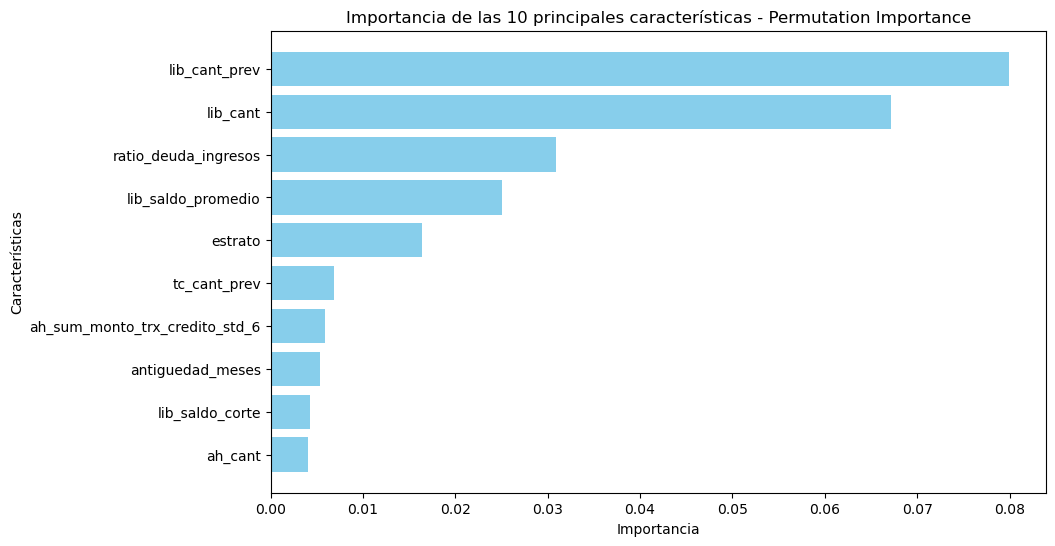

In [14]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extraer X_train y y_train desde el diccionario info_save_select
X_train = info_save_select['modelo_produccion']['X_train']
y_train = info_save_select['modelo_produccion']['y_train']
# Extraer el modelo desde el diccionario
best_model = info_save_select['modelo_produccion']['best_model']

# y_train_pred = best_model.predict(X_train)
# Calcular la importancia de las características por permutación
result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)

# Extraer las importancias
feature_importances = result.importances_mean

# Supongamos que scal_marzo es un DataFrame y contiene los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las 10 principales características - Permutation Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()


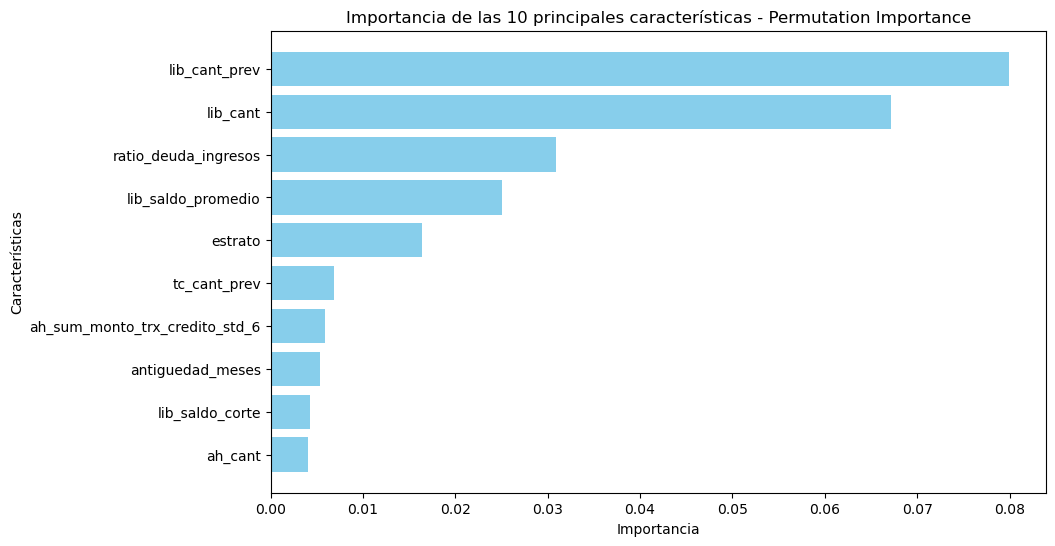

In [13]:
# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las 10 principales características - Permutation Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()

In [15]:
import shap
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

def calcular_shap_values(info_save_select):
    """
    Función para calcular los SHAP values de un modelo basado en el tipo de modelo.
    
    Parámetros:
    -----------
    info_save_select: dict
        Diccionario que contiene la información del modelo, los datos de entrenamiento, y otros datos relevantes.
        Debe tener las claves 'modelo_produccion' -> 'best_model', 'x_train' y 'y_train'.
    
    **params: dict
        Parámetros adicionales opcionales.
        
    Retorna:
    --------
    shap_values: array
        Los valores SHAP calculados.
    """
    
    # Extraer X_train y y_train desde el diccionario info_save_select
    X_train = info_save_select['modelo_produccion']['X_train']
    y_train = info_save_select['modelo_produccion']['y_train']
    
    # Extraer el modelo desde el diccionario
    best_model = info_save_select['modelo_produccion']['best_model']
    
    # Inicialización de variables
    explainer = None
    shap_values = None
    
    # Verificar si el modelo es una red neuronal MLP
    if isinstance(best_model, MLPClassifier):
        print("El modelo es un MLP. Utilizando Kernel SHAP o Deep SHAP.")
        
        # Para redes neuronales, usamos KernelExplainer (más genérico)
        explainer = shap.KernelExplainer(best_model.predict_proba, X_train)
        shap_values = explainer.shap_values(X_train)
    
    # Verificar si el modelo es XGBoost o RandomForest
    elif isinstance(best_model, xgboost.XGBClassifier) or isinstance(best_model, RandomForestClassifier):
        print("El modelo es un XGBoost o RandomForest. Utilizando TreeExplainer.")
        
        # Para modelos basados en árboles, TreeExplainer es la opción más eficiente
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_train)
    
    else:
        raise ValueError("El modelo no es compatible con el cálculo de SHAP values.")

    # Retornar los valores SHAP calculados
    return shap_values


In [21]:
info_save_select = ms.calc_metrics_before_backtesting(info_save,info_save2,params)

[09/25/24 00:11:34] INFO     Iniciando el calculo de las metricas...                                   ]8;id=614220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=30382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#562\562]8;;\

                    INFO     Models: best_model_name                                                   ]8;id=913901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=255639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_model_name                                                ]8;id=794976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=65847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[09/25/24 00:11:45] INFO     Models: best_unbiased_model                                               ]8;id=611746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=531269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_unbiased_model                                            ]8;id=238420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=638984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.5542       Run1      MLP_0   
           true_sum n_top test            3670       Run1      MLP_0   
           backtest       test          2.3302       Run1      MLP_0   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[09/25/24 00:11:50] INFO     Models: best_fitting_model                                                ]8;id=394417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=935040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#581\581]8;;\

                    INFO     Estrategy: best_fitting_model                                             ]8;id=543060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=236815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.5s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test           4.513       Run9  random_forest_8   
           true_sum n_top test            3636       Run9  random_forest_8   
           backtest       test          2.3086       Run9  random_forest_8   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[09/25/24 00:11:55] INFO     Estrategy: modelo_produccion                                              ]8;id=359431;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=660996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#587\587]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          4.7444       Run4  xgboost_3   
           true_sum n_top test            3827       Run4  xgboost_3   
           backtest       test          2.4298       Run4  xgboost_3   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

In [22]:
from typing import Dict, Any, Tuple

import pandas as pd
import numpy as np
from IPython.display import display
import logging
import gc
import traceback

# algoritmos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# optimizador
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedKFold

# optimizador
from bayes_opt import BayesianOptimization

# metricas
from sklearn.metrics import f1_score,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics._classification import _prf_divide,_nanaverage,multilabel_confusion_matrix
from sklearn.metrics._classification import _check_zero_division,_check_set_wise_labels




logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# funcion auxiliar para extraer datos por si se requiere fitear:
def extract_data(info_save_temp):
    X_balance = info_save_temp["modelo_produccion"]["X_balance"]
    y_balance = info_save_temp["modelo_produccion"]["y_balance"]
    X_i2 = info_save_temp["modelo_produccion"]["X_train"]
    y_i2 = info_save_temp["modelo_produccion"]["y_train"]

    # Convertir X_train y y_train a arrays de NumPy
    X_train = X_balance.values
    y_train = y_balance.values.ravel()
    
    # Convertir X_train y y_train sin balancear a arrays de NumPy
    X_i = X_i2.values
    y_i = y_i2.values.ravel()
    return X_train,y_train,X_i,y_i

### Aux: optimizaciones con cambio de metricas

# xgboots

def optimize_train_xgboost(info_save_prod, nombre,scorer,params):
    """
    Train an XGBoost classifier using cross-validation and grid search with early stopping.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.

        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """
    logger.info(f"INICIANDO LA OPT. BAYESEIANA CON AJUSTE SOBRE EL MEJOR MODELO: XGBOOTS ...")    
        
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    seed = params["random_state"]
    # Extract cv_params from the params dictionary
    #cv_params = params[nombre]['cv_params']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    #param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    #param_grid = {key: [value] for key, value in param_grid.items()}
    # logger.info(cv_params)
    # logger.info(param_grid)
    
    # Initialize the XGBClassifier with early stopping rounds
    # model = XGBClassifier(
    #     use_label_encoder=False,
    #     eval_metric='logloss',
    #     n_jobs = cv_params['n_jobs'],
    #     random_state = seed,
    #     early_stopping_rounds=cv_params.get('early_stopping_rounds', 10)
    # )

    # Implement stratified k-fold cross-validation
    # skf = StratifiedKFold(n_splits=cv_params['n_splits'], shuffle=True, random_state=seed)
    # grid_search = GridSearchCV(
    #     model, param_grid,
    #     cv=skf,
    #     scoring=scorer,
    #     n_jobs=cv_params['n_jobs']
    # )
    
    # # Fit the model
    # if params["Iterar_con_balance"] == True:
    #     grid_search.fit(X_train, y_train, eval_set=[(X_i, y_i)], verbose=False)
    # else:
    #     grid_search.fit(X_i, y_i, eval_set=[(X_i, y_i)], verbose=False)
    # best_model = grid_search.best_estimator_
    # extrayendo los datos
    X_train,y_train,X_i,y_i = extract_data(info_save_prod) # Entrenamiento: balanceo, sin balanceo

    exploration_space = params["xgboost_classifier"]["exploration_space"]
    n_iter = params["xgboost_classifier"]["number_of_iterations"]
    init_points = params["xgboost_classifier"]["init_points"]
    cv_config = params["cv_config"]

    # evaluador de metricas
    def xgboost_evaluate(max_depth, n_estimators, learning_rate, min_child_weight, subsample, colsample_bytree, gamma):
        model = XGBClassifier(
            max_depth=int(max_depth),
            n_estimators=int(n_estimators),
            learning_rate=learning_rate,
            min_child_weight=int(min_child_weight),
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            random_state=seed
        )
    
        cv = RepeatedStratifiedKFold(**cv_config)
        scores = cross_val_score(model, X_train,y_train, cv=cv, scoring=scorer)
        # notese que es la data balanceada
        return np.mean(scores)
    
    optimizer = BayesianOptimization(
        f=xgboost_evaluate, pbounds=exploration_space, random_state=seed, verbose=2)
    
    optimizer.maximize(n_iter=n_iter, init_points=init_points)
    best_params = optimizer.max["params"]
    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_params
    info_save_prod["modelo_produccion"]["grid_search"] = optimizer
    gc.collect()
    return info_save_prod

###random forest 
def train_random_forest_with_cv(info_save_prod, nombre,scorer,params):
    """
    Train a Random Forest classifier using cross-validation and randomized search with Kedro parameters.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.
        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """

    logger.info(f"INICIANDO AJUSTE DE ENTRENAMIENTO DEL MEJOR MODELO SOBRE RANDOM FOREST ...")    
    seed = params["random_state"]
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    # Extract cv_params from the params dictionary
    cv_params = params[nombre]['cv_params']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    param_grid = {key: [value] for key, value in param_grid.items()}

    # extrayendo los datos
    X_train,y_train,X_i,y_i = extract_data(info_save_prod) # entrenamiento: Balanceo y sin balanceo

    logger.info(cv_params)
    logger.info(param_grid)
    
    # Initialize the RandomForestClassifier
    model = RandomForestClassifier(random_state=seed, n_jobs = cv_params['n_jobs'], verbose = 1)

    # Implement stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=cv_params['n_splits'], shuffle=True, random_state=seed)

    random_search = RandomizedSearchCV(
        model, 
        param_grid,
        n_iter=cv_params.get('n_iter', 100),
        cv=skf,
        scoring=scorer,
        n_jobs=cv_params['n_jobs'])

    if params["Iterar_con_balance"] == True:
        grid_search.fit(X_train,y_train)
    else:
        grid_search.fit(X_i,y_i)
        
    best_model = grid_search.best_estimator_

    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_model
    info_save_prod["modelo_produccion"]["grid_search"] = random_search

    gc.collect()
    return info_save_prod
###red neuronal
def red_neuronal(info_save_prod, nombre,scorer,params):

    """
    Train a MLP classifier using cross-validation and randomized search with Kedro parameters.

    Args:
        info_save (Dict): Contiene todo la data de entrenamiento balanceada y sin balancear.
        params (Dict[str, Any]): Parameters from Kedro's params.yml file.

    Returns:
        Dict with model training
    """
    logger.info(f"INICIANDO AJUSTE DE ENTRENAMIENTO DEL MEJOR MODELO SOBRE MLP CLASSIFIER ...")    
    seed = params["random_state"]
    # etiquecata del catalogo models
    names_tag = info_save_prod['modelo_produccion']['name_model']
    # rename
    rename = info_save_prod['modelo_produccion']['model_name']+"_ADJ"
    info_save_prod['modelo_produccion']["model_name"] = rename
    logger.info(f"Ejecutando el modelo. Nombre: {rename}. NameTag: {names_tag}")

    # Extract cv_params from the params dictionary
    cv_params = params[nombre]['cv_params']
    max_iter = params[nombre]['max_iter']

    # extrayendo el mejor parametro y colocandolo en una grilla de 1 solo modelo (mejor)
    param_grid = info_save_prod['modelo_produccion']['grid_search'].best_params_
    param_grid = {key: [value] for key, value in param_grid.items()}

    # extrayendo los datos (balanceados, sin balancear
    X_train,y_train,X_i,y_i = extract_data(info_save_prod)

    logger.info(cv_params)
    logger.info(param_grid)
    
    # Initialize the MLP
    model = MLPClassifier(max_iter=max_iter,random_state = seed)


    # Implement stratified k-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=cv_params["n_splits"], 
                           n_jobs=cv_params["n_jobs"], 
                           verbose=1,
                          scoring = scorer)

    if params["Iterar_con_balance"] == True:
        grid_search.fit(X_train,y_train)
    else:
        grid_search.fit(X_i,y_i)

    best_model = grid_search.best_estimator_

    # guardando modelo
    info_save_prod["modelo_produccion"]["best_model"] = best_model
    info_save_prod["modelo_produccion"]["grid_search"] = grid_search

    gc.collect()
    return info_save_prod

# 0.0 Funcion auxiliar  para hacer optimizacion bayesiana...

# 0.1 Funcion auxiliar para generar la data para hacer ensambles
def procesamiento_data_ensamble(info_save,params):
    combine_models_select = [i.upper() for i in params["Ensamble"]["Algoritmos"]]
    # orden de las columnas
    nodos_select = [] 
    inputs_ensamble_train = pd.DataFrame()
    inputs_ensamble_test = pd.DataFrame()
    output_ensamble_train = pd.DataFrame()
    output_ensamble_test = pd.DataFrame()
    for nodo in range(info_save["nodo_run"]):
        # buscando los nombres de los nodos como los defini en el catalogo
        if info_save[nodo]['name_model'].upper() in combine_models_select: 
            nodos_select.append(nodo)
            # inputs del modelo en el nodo
            X_train = info_save[nodo]['X_train'].values
            X_test = info_save[nodo]['X_test'].values
            # output deseado de cada nodo
            y_train = info_save[nodo]['y_train'].values
            y_test = info_save[nodo]['y_test'].values
            # inputs del ensamble
            #y_hat_train = info_save[nodo]['best_model'].predict(X_train)
            y_hat_train_probs = info_save[nodo]['best_model'].predict_proba(X_train)[:,1]
            y_hat_train_probs = pd.DataFrame(y_hat_train_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_train = pd.concat([inputs_ensamble_train,y_hat_train_probs],axis = 1)

            #y_hat_test = info_save[nodo]['best_model'].predict(X_test)
            y_hat_test_probs = info_save[nodo]['best_model'].predict_proba(X_test)[:,1]
            y_hat_test_probs = pd.DataFrame(y_hat_test_probs, columns = [info_save[nodo]['name_model']])
            inputs_ensamble_test = pd.concat([inputs_ensamble_test,y_hat_train_probs],axis = 1)

            # output
            output_ensamble_train = pd.concat([output_ensamble_train,y_train], axis = 1)
            output_ensamble_test = pd.concat([output_ensamble_test,y_test], axis = 1)
    info_save['modelo_produccion']["nodos_select"] = nodos_select
    info_save['modelo_produccion']["X_train"] = inputs_ensamble_train
    info_save['modelo_produccion']["X_test"] = inputs_ensamble_test
    # TRAINING
    Y_TRAIN = output_ensamble_train.T.drop_duplicates().T
    Y_TEST = output_ensamble_train.T.drop_duplicates().T
    if (Y_TRAIN.shape[1] == 1) & (Y_TEST.shape[1] == 1):
        if (Y_TRAIN.isnull().sum().iloc[0]+Y_TEST.isnull().sum().iloc[0]) == 0:
            info_save['modelo_produccion']["y_train"] = Y_TRAIN
            info_save['modelo_produccion']["y_test"] = Y_TEST
        else:
            raise ValueError("En el ensamble no se logro concatenar los pronosticos Nulos >0.")
    else:
        raise ValueError("En el ensamble no se logro concatenar los pronosticos.")
    return info_save
# 0.1.1 Funcion auxiliar para entrenar un ensamble

########### 1. Nodo inicial ejecucion del modelo seleccionado o superoptimizacion
def generate_modelo_produccion(info_save,params):
    combine_models = params["Ensamble"]["want"]
    info_save2 = {}
    if combine_models == True:
        logger.info("Iniciando el Ensamblado de modelos...")
        # creadno las variables entrada y salida
        info_save2['modelo_produccion'] = {'nodos_select':None,'X_train':None,'X_test':None}

        info_save2['modelo_produccion']['y_train'] = None
        info_save2['modelo_produccion']['y_test'] = None
        info_save2['modelo_produccion']['type'] = "Ensamble"
        ## actualizo info_save
        info_save2 = procesamiento_data_ensamble(info_save,params)
        # entrenando el modelo
        pass
    else: 
        hiperoptimizacion = params['optimizacion_bayesiana']['want']
        if params['use_key']['want'] == False:
            key_model = params['use_key']['estrategia']
            logger.info(f"Modelo optimo segun la estrategia: {key_model}")
            # identificar el modelo que se selecciono
            llave = info_save['select_model'].loc["model_name",key_model].iloc[0]
            nodo_best = int(llave.split(",")[1].split("_")[-1])
        else:
            llave = params['use_key']['llave'][0]
            logger.info(f"Modelo optimo sin estrategia.")
            nodo_best = int(llave.split(",")[1].split("_")[-1])
        # proceso 
        logger.info(f"Llave del modelo: {llave}")

        if llave == info_save[nodo_best]['name_model']+","+info_save[nodo_best]['model_name']:
            logger.info("Modelo Identificado....")
            logger.info(f"Nodo: {nodo_best}. Llave {llave}")
            
            if hiperoptimizacion == True:
                logger.info("Iniciando la Optimizacion Bayesiana...")
                # optimizar modelo
                info_save2['modelo_produccion'] = info_save[nodo_best]
                info_save2['modelo_produccion']['type'] = "Opt_Bayesiana_adj"
                info_save2['modelo_produccion']["nodos_select"] = nodo_best # No es lista
                # nombre en el catalogo models
                iden_name = "_".join(info_save2['modelo_produccion']['model_name'].split("_")[:-1])
                logger.info(f"Algoritmo: {iden_name}")
                # funcion objetivo
                objetivo_metodo = params['optimizacion_bayesiana']['scorer']
                if  objetivo_metodo== 'backtest_scorer':
                    logger.info(f"Funcion Objetivo: 'backtesting_top_probabilities'")
                    obj_func = make_scorer(backtesting_top_probabilities,greater_is_better=True,needs_proba=True)
                elif objetivo_metodo== 'f1_n_top':
                    logger.info(f"Funcion Objetivo: 'custom_f1_score'")
                    obj_func = make_scorer(custom_f1_score, greater_is_better=True,needs_proba=True)
                else:
                    obj_func = params[iden_name]['cv_params']['scoring']
                    logger.info(f"Funcion Objetivo de los parametros de models:{obj_func}")

                # identificando modelo
                if iden_name == "random_forest":
                    info_save2 = train_random_forest_with_cv(info_save2,iden_name,obj_func,params)#falta
                elif iden_name == "xgboost":
                    info_save2 = optimize_train_xgboost(info_save2,iden_name,obj_func,params)
                elif iden_name == "MLP":
                    info_save2 = red_neuronal(info_save2, iden_name,obj_func,params) # falta
                else:
                    raise ValueError("No identifica la llave...")

            else:
                logger.info("Seleccionamos el modelo proveniente de models...")
                # quedarse con el modelo correcto y parametrizado en el otro artefacto nuevo
                info_save2['modelo_produccion']  = info_save[nodo_best]
                info_save2['modelo_produccion']['type'] = "Models"
                info_save2['modelo_produccion']["nodos_select"] = nodo_best # No es lista
    gc.collect()
    return info_save2

############### Nodo 2: Generar metricas de desempeño de datos similares a los vistos en backtesting

# 2.1 funciones auxiliares para generar dichas metricas

# funcion auxiliar para filtrar los mas probables
def want_res(y_probs, n_top):
    # Obtener las observaciones con las mayores probabilidades combinadas
    # ordenar de menor a mayor
    top_indices = np.argsort(y_probs)
    # quedarme con los de maxima probabilidad
    top_indices = top_indices[-n_top:]  
    return top_indices
    
# funcion auxiliar para calcular las metricas de sklear ajustadas por las mas probables y optimizar en el ensamble
def precision_recall_fscore_support_fabrica(
    y_true,
    y_probs,
    n_top,
    metric_calcs,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=("f-score"),#("precision", "recall", "f-score"),
    sample_weight=None,
    zero_division="warn",
):

    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, n_top)
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices]

    # Filtrar las predicicones seleccionadas
    y_call = np.array([1.0]*len(top_indices))
    #y_call = y_preds[top_indices]
    _check_zero_division(zero_division)
    labels = _check_set_wise_labels(y_top, y_call, average, labels, pos_label)
    
    # Calculate tp_sum, pred_sum, true_sum ###
    samplewise = average == "samples"
    MCM = multilabel_confusion_matrix(
        y_top,
        y_call,
        sample_weight=sample_weight,
        labels=labels,
        samplewise=samplewise,
    )
    #MCM[0,:,:] # MATRIZ DE CONFUSION PARA LABELS[0] --> RESULTADO [(TN,FP) , (FN, TP)]
    tp_sum = MCM[:, 1, 1]
    pred_sum = tp_sum + MCM[:, 0, 1]
    true_sum = tp_sum + MCM[:, 1, 0]

    if average == "micro":
        tp_sum = np.array([tp_sum.sum()])
        pred_sum = np.array([pred_sum.sum()])
        true_sum = np.array([true_sum.sum()])

    # Finally, we have all our sufficient statistics. Divide! #
    beta2 = beta**2
    # Divide, and on zero-division, set scores and/or warn according to
    # zero_division:
    precision = _prf_divide(
        tp_sum, pred_sum, "precision", "predicted", average, warn_for, zero_division
    )
    recall = _prf_divide(
        tp_sum, true_sum, "recall", "true", average, warn_for, zero_division
    )

    if np.isposinf(beta):
        f_score = recall
    elif beta == 0:
        f_score = precision
    else:
        # The score is defined as:
        # score = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
        # Therefore, we can express the score in terms of confusion matrix entries as:
        # score = (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)
        denom = beta2 * true_sum + pred_sum
        f_score = _prf_divide(
            (1 + beta2) * tp_sum,
            denom,
            "f-score",
            "true nor predicted",
            average,
            warn_for,
            zero_division,
        )

    # Average the results
    if average == "weighted":
        weights = true_sum
    elif average == "samples":
        weights = sample_weight
    else:
        weights = None

    if average is not None:
        assert average != "binary" or len(precision) == 1
        precision = _nanaverage(precision, weights=weights)
        recall = _nanaverage(recall, weights=weights)
        f_score = _nanaverage(f_score, weights=weights)
        true_sum = None  # return no support
    if metric_calcs == "precision":
        return precision
    elif metric_calcs == "recall":
        return recall
    elif metric_calcs == "f_score":
        return f_score
    elif metric_calcs == "true_sum":
        return true_sum
    else:
        return [precision, recall, f_score, true_sum]

### funciones auxiliar del ensamble para optimizar/validar metricas:
def custom_f1_score(y_true, y_probs,top_n = 40000, labels = [1] ,metric_calcs= "f_score"):
    
    array_value = precision_recall_fscore_support_fabrica(
                        y_true,
                        y_probs,
                        n_top = top_n,
                        labels = labels, #[0,1]
                        metric_calcs = metric_calcs #f_score,recall,precision
               ) 
    return array_value[0] # metrica unia deseada

def backtesting_top_probabilities(y_true,y_probs, top_n = 40000):
    def want_res(y_probs, n_top):
        # Obtener las observaciones con las mayores probabilidades combinadas
        # ordenar de menor a mayor
        top_indices = np.argsort(y_probs)
        # quedarme con los de maxima probabilidad
        top_indices = top_indices[-n_top:]  
        return top_indices
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, top_n)
    #top_indices_str = [str(int(index)) for index in top_indices]
    
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices] # tomo las etiquetas reales que seleccione de las predicciones
    #y_top = (y_top == 1).flatten() # dejo en True las TruePositive
    y_top = np.array(list((y_top == 1).flatten()))
    true_positive_indices = np.where(y_top)[0] # extraigo la posicion de los TruePositive

    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(true_positive_indices)
    # Step 3: Get the hashvalues in the top_n sorted df
    #top_hashvalues = set(top_indices)
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    #common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    #percentage_in_top = (len(common_hashvalues) / len(test_hashvalues))
    percentage_in_top = len(test_hashvalues)/np.min([top_n,y_top.shape[0]])
    return percentage_in_top

## Nodo 2: Calculo de las metricas de desempeño comparables al backtesting:

# def calc_metrics_before_backtesting(info_save,info_save2, params):
#     logger.info(f"Iniciando el calculo de las metricas...")
#     top_n = params['n_obs_filter']
#     metrics_backtest = pd.DataFrame()
#     for col in info_save["select_model"].columns.tolist()+["modelo_produccion"]:
#         if col == "modelo_produccion":
#             # debe buscar en el proyecto generado de select_model
#             nodo_col = info_save2[col]["nodos_select"]
#             if isinstance(nodo_col, (int, float)) and info_save2[col]['type'] == "Models":
#                 # es un modelo preseleccionado en modelos
#                 llave = info_save2[col]['name_model']+","+info_save2[col]['model_name']
#             elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Ensamble":
#                 pass
#             elif isinstance(nodo_col, list) and info_save2[col]['type'] == "Opt_Bayesiana":
#                 pass
#             else:
#                 raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´´")
#             info_save_loop = info_save2['modelo_produccion'].copy()
#         else:
#             # debe buscar en el proyecto generado de models
#             logger.info(f"Models: {col}")
#             llave = info_save["select_model"].loc["model_name", col]
#             nodo_col = int(llave.split(",")[1].split("_")[-1])
#             info_save_loop = info_save[nodo_col].copy()

#         if llave == info_save_loop['name_model']+","+info_save_loop['model_name']:
#             logger.info(f"Estrategy: {col}")
#             for dataset_x,dataset_y in [["X_train","y_train"],["X_test","y_test"]]:
#                 probs=info_save_loop['best_model'].predict_proba(info_save_loop[dataset_x].values)
#                 probs = probs[:,1]
#                 y_true = info_save_loop[dataset_y].values
#                 backtest_metric = np.round(backtesting_top_probabilities(y_true,probs, top_n)*100,4)
#                 labels = [1,0]
#                 precision, recall, f_score, true_sum = precision_recall_fscore_support_fabrica(
#                                                       y_true,
#                                                       probs,
#                                                       n_top = top_n,
#                                                       labels = labels, #[0,1]
#                                                       metric_calcs =  'all'#f_score,recall,precision
#                                                            )
#                 index_name = ['Precision n_top','recall n_top','f1-score n_top','true_sum n_top']
#                 temp2 = pd.DataFrame(['backtest',backtest_metric,'1',dataset_y[2:]])
#                 temp2.index = ['metric_name','value','class_name','dataset_name']
#                 temp2 = temp2.T
#                 for t,index in enumerate([precision,recall,f_score,true_sum]):
#                     if t == 3:
#                         temp = pd.DataFrame(index, index = [index_name[t]]*len(labels), columns = ["value"])
#                     else:
#                         temp = pd.DataFrame(np.round(index*100,4), index = [index_name[t]]*len(labels), columns = ["value"])
#                     temp.index.name = 'metric_name'
#                     temp.reset_index(inplace = True)
#                     temp['class_name'] = labels
#                     temp["dataset_name"] = dataset_y[2:]
#                     temp2 = pd.concat([temp2,temp], axis = 0)
#                 temp2["name_model"] = info_save[nodo_col]['name_model']
#                 temp2["model_name"] = info_save[nodo_col]['model_name']
#                 temp2["select_model"] = col
#                 metrics_backtest = pd.concat([metrics_backtest,temp2], axis = 0)

#             metrics_backtest.sort_index(ascending=False, inplace = True)
#             check_df = temp2.set_index(['class_name','metric_name','dataset_name'])
#             printed = check_df[np.in1d(check_df.index.get_level_values(0), [1])]
#             printed2= printed[np.in1d(printed.index.get_level_values(1),['f1-score n_top','true_sum n_top'])]

#             printed1= check_df[np.in1d(check_df.index.get_level_values(1),['backtest'])]            
#             printed = pd.concat([printed2,printed1],axis = 0)
#             display(printed)
#         else:
#             raise ValueError("¿Que esta pasando? Revisar cuando se parametrizo ´['modelo_produccion']['type']´")
#     metrics_backtest.set_index(['class_name','metric_name','dataset_name'], inplace = True)
#     info_save2["select_model2"] = metrics_backtest
#     ### aqui va la imaagen de Serg:
#     # img =
#     if info_save2[col]['type'] == "Models":
#         del info_save2['modelo_produccion']['X_balance']
#         del info_save2['modelo_produccion']['y_balance']
#         del info_save2['modelo_produccion']['X_train']
#         del info_save2['modelo_produccion']['y_train']
#         del info_save2['modelo_produccion']['X_test']
#         del info_save2['modelo_produccion']['y_test']
#     llave = info_save2['modelo_produccion']['name_model']+","+info_save2['modelo_produccion']['model_name']
#     info_save2['all_results_select_model'] = info_save['all_results'][info_save['all_results']['model_name'] == llave]
#     return info_save2 #, img

# nodo de sergio
## def
### blac bla bla
## return imagen y retornar el info_save2

In [18]:
def want_res(y_probs, n_top):
    # Obtener las observaciones con las mayores probabilidades combinadas
    # ordenar de menor a mayor
    top_indices = np.argsort(y_probs)
    # quedarme con los de maxima probabilidad
    top_indices = top_indices[-n_top:]  
    return top_indices

In [16]:
def precision_recall_fscore_support_fabrica(
    y_true,
    y_probs,
    n_top,
    metric_calcs,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=("f-score"),#("precision", "recall", "f-score"),
    sample_weight=None,
    zero_division="warn",
):

    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, n_top)
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices]

    # Filtrar las predicicones seleccionadas
    y_call = np.array([1.0]*len(top_indices))
    #y_call = y_preds[top_indices]
    _check_zero_division(zero_division)
    labels = _check_set_wise_labels(y_top, y_call, average, labels, pos_label)
    
    # Calculate tp_sum, pred_sum, true_sum ###
    samplewise = average == "samples"
    MCM = multilabel_confusion_matrix(
        y_top,
        y_call,
        sample_weight=sample_weight,
        labels=labels,
        samplewise=samplewise,
    )
    #MCM[0,:,:] # MATRIZ DE CONFUSION PARA LABELS[0] --> RESULTADO [(TN,FP) , (FN, TP)]
    tp_sum = MCM[:, 1, 1]
    pred_sum = tp_sum + MCM[:, 0, 1]
    true_sum = tp_sum + MCM[:, 1, 0]

    if average == "micro":
        tp_sum = np.array([tp_sum.sum()])
        pred_sum = np.array([pred_sum.sum()])
        true_sum = np.array([true_sum.sum()])

    # Finally, we have all our sufficient statistics. Divide! #
    beta2 = beta**2
    # Divide, and on zero-division, set scores and/or warn according to
    # zero_division:
    precision = _prf_divide(
        tp_sum, pred_sum, "precision", "predicted", average, warn_for, zero_division
    )
    recall = _prf_divide(
        tp_sum, true_sum, "recall", "true", average, warn_for, zero_division
    )

    if np.isposinf(beta):
        f_score = recall
    elif beta == 0:
        f_score = precision
    else:
        # The score is defined as:
        # score = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
        # Therefore, we can express the score in terms of confusion matrix entries as:
        # score = (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)
        denom = beta2 * true_sum + pred_sum
        f_score = _prf_divide(
            (1 + beta2) * tp_sum,
            denom,
            "f-score",
            "true nor predicted",
            average,
            warn_for,
            zero_division,
        )

    # Average the results
    if average == "weighted":
        weights = true_sum
    elif average == "samples":
        weights = sample_weight
    else:
        weights = None

    if average is not None:
        assert average != "binary" or len(precision) == 1
        precision = _nanaverage(precision, weights=weights)
        recall = _nanaverage(recall, weights=weights)
        f_score = _nanaverage(f_score, weights=weights)
        true_sum = None  # return no support
    if metric_calcs == "precision":
        return precision
    elif metric_calcs == "recall":
        return recall
    elif metric_calcs == "f_score":
        return f_score
    elif metric_calcs == "true_sum":
        return true_sum
    else:
        return [precision, recall, f_score, true_sum]


In [14]:
def backtesting_top_probabilities(y_true,y_probs, top_n = 40000):
    def want_res(y_probs, n_top):
        # Obtener las observaciones con las mayores probabilidades combinadas
        # ordenar de menor a mayor
        top_indices = np.argsort(y_probs)
        # quedarme con los de maxima probabilidad
        top_indices = top_indices[-n_top:]  
        return top_indices
 
    # Step 1: Sort df by 'pred_proba' from highest to lowest
    # Obtener las observaciones con las mayores probabilidades combinadas
    top_indices = want_res(y_probs, top_n)
    #top_indices_str = [str(int(index)) for index in top_indices]
    
    # Filtrar las etiquetas reales
    y_top = y_true[top_indices] # tomo las etiquetas reales que seleccione de las predicciones
    #y_top = (y_top == 1).flatten() # dejo en True las TruePositive
    y_top = np.array(list((y_top == 1).flatten()))
    true_positive_indices = np.where(y_top)[0] # extraigo la posicion de los TruePositive

    # Step 2: Get the unique hashvalues from df_test
    test_hashvalues = set(true_positive_indices)
    # Step 3: Get the hashvalues in the top_n sorted df
    #top_hashvalues = set(top_indices)
 
    # Step 4: Calculate the percentage of test_hashvalues present in top_hashvalues
    #common_hashvalues = test_hashvalues.intersection(top_hashvalues)
    #percentage_in_top = (len(common_hashvalues) / len(test_hashvalues))
    percentage_in_top = len(test_hashvalues)/np.min([top_n,y_top.shape[0]])
    return percentage_in_top